In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



from collections import Counter

In [333]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [334]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [335]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [336]:
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')

test['MSSubClass'] = test['MSSubClass'].astype('object')
test['OverallQual'] = test['OverallQual'].astype('object')
test['OverallCond'] = test['OverallCond'].astype('object')

In [337]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

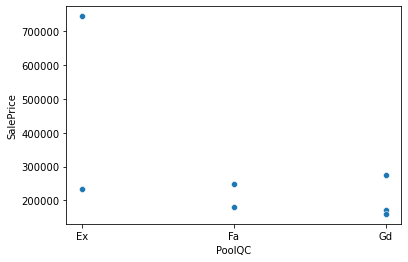

In [338]:
sns.scatterplot(train['PoolQC'],train['SalePrice'])

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

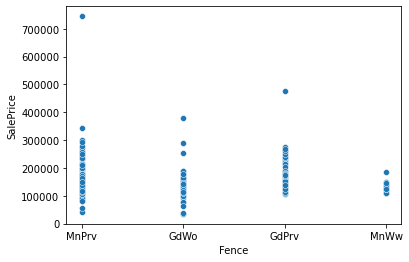

In [339]:
sns.scatterplot(train['Fence'],train['SalePrice'])

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

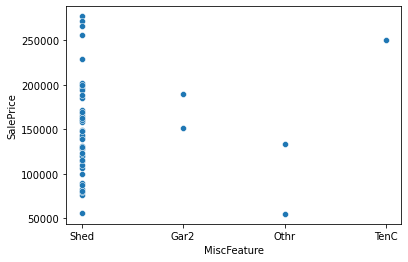

In [340]:
sns.scatterplot(train['MiscFeature'],train['SalePrice'])

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

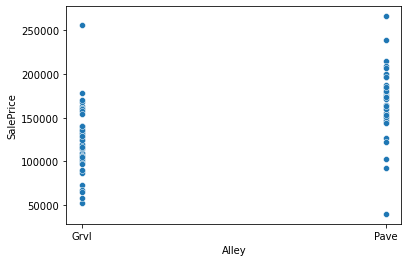

In [341]:
sns.scatterplot(train['Alley'],train['SalePrice'])

In [342]:
train.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1,inplace=True)
test.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1,inplace=True)

In [343]:
train.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story           7           5       2003          2003     Gable   
1     1Story           6           8       1976          1976     Gable   
2     2Story           7           5       2001          2002     Gable   
3     2Story           7           5       1915          1970     Gable   
4     2Story           8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd        

In [344]:
train[['MasVnrArea','PoolArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','BsmtFinSF2','SalePrice']].corr()

MasVnrArea  PoolArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
MasVnrArea       1.000000  0.011723    0.159718     0.125703      -0.110204   
PoolArea         0.011723  1.000000    0.073378     0.060762       0.054203   
WoodDeckSF       0.159718  0.073378    1.000000     0.058661      -0.125989   
OpenPorchSF      0.125703  0.060762    0.058661     1.000000      -0.093079   
EnclosedPorch   -0.110204  0.054203   -0.125989    -0.093079       1.000000   
3SsnPorch        0.018796 -0.007992   -0.032771    -0.005842      -0.037305   
ScreenPorch      0.061466  0.051307   -0.074181     0.074304      -0.082864   
MiscVal         -0.029815  0.029669   -0.009551    -0.018584       0.018361   
BsmtFinSF2      -0.072319  0.041709    0.067898     0.003093       0.036543   
SalePrice        0.477493  0.092404    0.324413     0.315856      -0.128578   

               3SsnPorch  ScreenPorch   MiscVal  BsmtFinSF2  SalePrice  
MasVnrArea      0.018796     0.061466 -0.029815   -0.072319   0.477493  
PoolArea       -0.007992     0.051307  0.029669    0.041709   0.092404  
WoodDeckSF     -0.032771    -0.074181 -0.009551    0.067898   0.324413  
OpenPorchSF    -0.005842     0.074304 -0.018584    0.003093   0.315856  
EnclosedPorch  -0.037305    -0.082864  0.018361    0.036543  -0.128578  
3SsnPorch       1.000000    -0.031436  0.000354   -0.029993   0.044584  
ScreenPorch    -0.031436     1.000000  0.031946    0.088871   0.111447  
MiscVal         0.000354     0.031946  1.000000    0.004940  -0.021190  
BsmtFinSF2     -0.029993     0.088871  0.004940    1.000000  -0.011378  
SalePrice       0.044584     0.111447 -0.021190   -0.011378   1.000000

In [345]:
train_numerical = train.select_dtypes(['int','float'])
train_categorical = train.select_dtypes(['object'])

test_numerical = test.select_dtypes(['int','float'])
test_categorical = test.select_dtypes(['object'])

In [346]:
test_numerical.shape

(1459, 34)

In [347]:
train_numerical.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [349]:
test_numerical.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0  1461         80.0    11622       1961          1961         0.0   
1  1462         81.0    14267       1958          1958       108.0   
2  1463         74.0    13830       1997          1998         0.0   
3  1464         78.0     9978       1998          1998        20.0   
4  1465         43.0     5005       1992          1992         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       468.0       144.0      270.0        882.0       896         0   
1       923.0         0.0      406.0       1329.0      1329         0   
2       791.0         0.0      137.0        928.0       928       701   
3       602.0         0.0      324.0        926.0       926       678   
4       263.0         0.0     1017.0       1280.0      1280         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        896           0.0           0.0         1         0   
1             0       1329           0.0           0.0         1         1   
2             0       1629           0.0           0.0         2         1   
3             0       1604           0.0           0.0         2         1   
4             0       1280           0.0           0.0         2         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             2             1             5           0       1961.0   
1             3             1             6           0       1958.0   
2             3             1             6           1       1997.0   
3             3             1             7           1       1998.0   
4             2             1             5           0       1992.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1.0       730.0         140            0              0          0   
1         1.0       312.0         393           36              0          0   
2         2.0       482.0         212           34              0          0   
3         2.0       470.0         360           36              0          0   
4         2.0       506.0           0           82              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0          120         0        0       6    2010  
1            0         0    12500       6    2010  
2            0         0        0       3    2010  
3            0         0        0       6    2010  
4          144         0        0       1    2010

### REMOVE NULL VALUES

In [353]:
train_numerical.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [355]:
test_numerical.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [352]:
train_numerical['GarageYrBlt'].fillna(0,inplace=True)
train_numerical['GarageCars'].fillna(0,inplace=True)
train_numerical['GarageArea'].fillna(0,inplace=True)
train_numerical['BsmtFinSF1'].fillna(0,inplace=True)
train_numerical['BsmtFinSF2'].fillna(0,inplace=True)
train_numerical['BsmtUnfSF'].fillna(0,inplace=True)
train_numerical['TotalBsmtSF'].fillna(0,inplace=True)
train_numerical['BsmtFullBath'].fillna(0,inplace=True)
train_numerical['BsmtHalfBath'].fillna(0,inplace=True)
train_numerical['MasVnrArea'].fillna(0,inplace=True)
train_numerical['LotFrontage'].fillna(train_numerical['LotFrontage'].mean(),inplace=True)

In [354]:
test_numerical['GarageYrBlt'].fillna(0,inplace=True)
test_numerical['GarageCars'].fillna(0,inplace=True)
test_numerical['GarageArea'].fillna(0,inplace=True)
test_numerical['BsmtFinSF1'].fillna(0,inplace=True)
test_numerical['BsmtFinSF2'].fillna(0,inplace=True)
test_numerical['BsmtUnfSF'].fillna(0,inplace=True)
test_numerical['TotalBsmtSF'].fillna(0,inplace=True)
test_numerical['BsmtFullBath'].fillna(0,inplace=True)
test_numerical['BsmtHalfBath'].fillna(0,inplace=True)
test_numerical['MasVnrArea'].fillna(0,inplace=True)
test_numerical['LotFrontage'].fillna(train_numerical['LotFrontage'].mean(),inplace=True)

In [252]:
for i in train_numerical.columns:
    train_numerical[i] = train_numerical[i].fillna(train_numerical[i].mean())
    
for i in test_numerical.columns:
    test_numerical[i] = test_numerical[i].fillna(train_numerical[i].mean())

In [356]:
train_numerical.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [357]:
train_numerical.shape

(1460, 35)

In [358]:
lst = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']

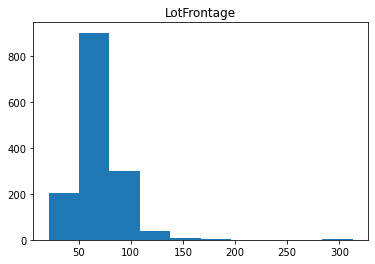

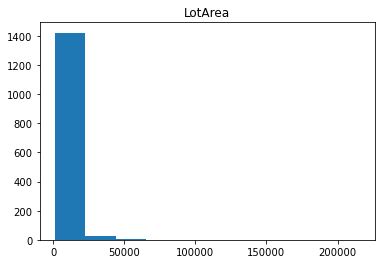

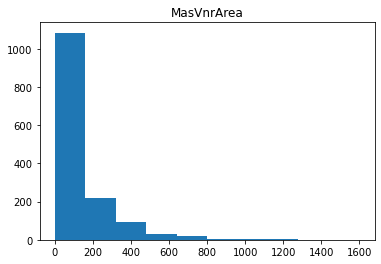

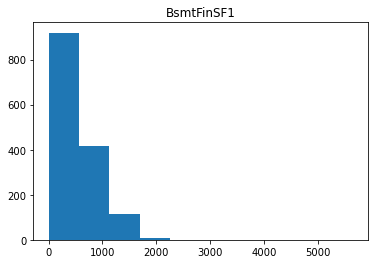

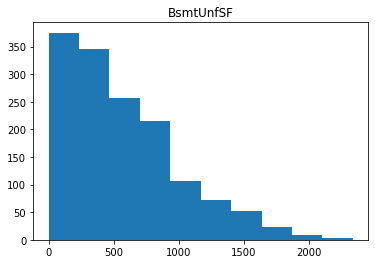

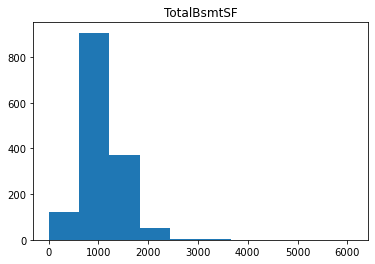

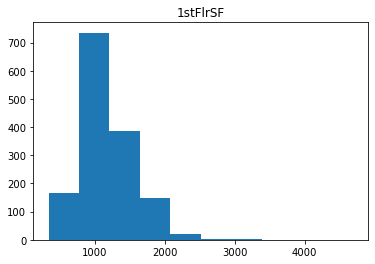

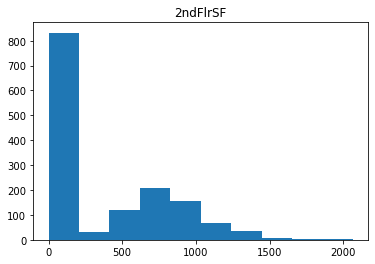

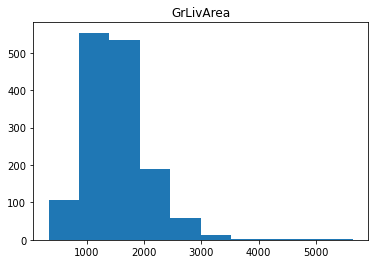

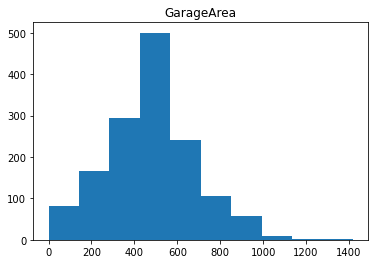

In [256]:
for i in lst:
    plt.hist(train_numerical[i])
    plt.title(i)
    plt.show()

In [257]:
# for i in lst:
#     temp = np.log(train_numerical[i])
#     plt.hist(temp)
#     plt.title(i)
#     plt.show()

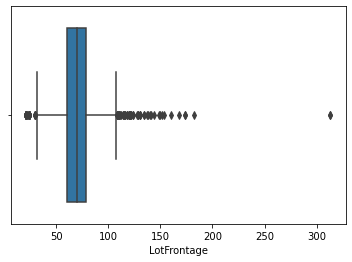

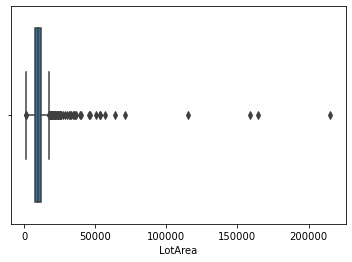

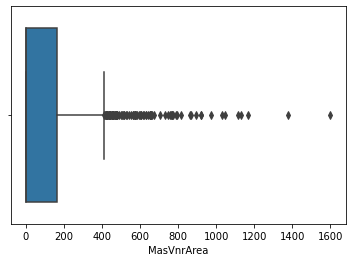

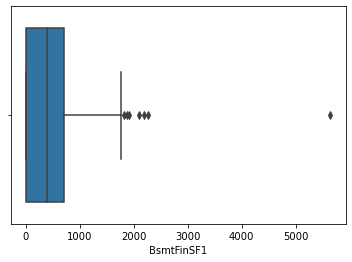

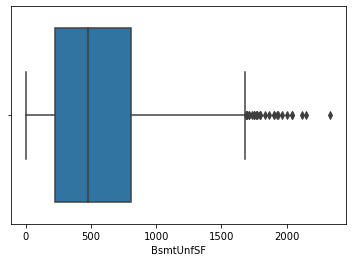

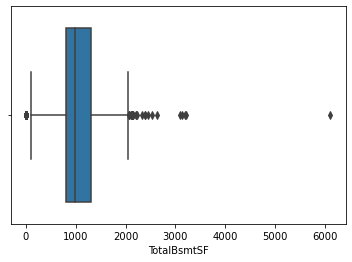

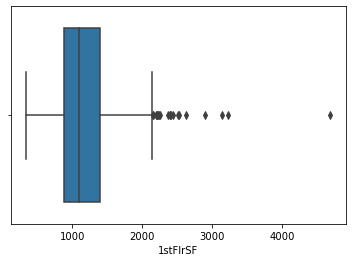

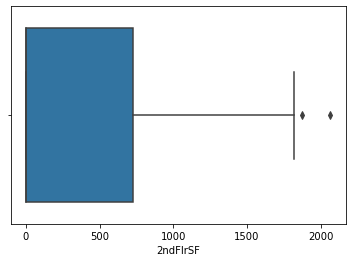

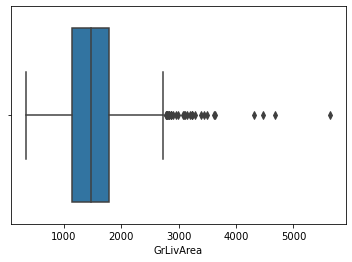

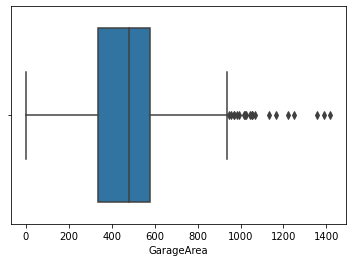

In [258]:
for i in lst:
    sns.boxplot(train_numerical[i])
    plt.show()

In [261]:
def treat_outlier(train,i):
    q1 = train.quantile(0.25)
    q3 = train.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_range = q1 - 1.7 * IQR
    upper_range = q3 + 1.7 * IQR
    
    print(i+"\t"+str((train<lower_range).sum()+(train>upper_range).sum()))
#     print(lower_range)
#     print(upper_range)
    
    train_low_index = train[train<lower_range].index
    train_high_index = train[train>upper_range].index
        
#     test_low_index = test[test<lower_range].index
#     test_high_index = test[test>upper_range].index
        
    train[train_low_index] = lower_range
    train[train_high_index] = upper_range
    
#     test[test_low_index] = lower_range
#     test[test_high_index] = upper_range
    
    return train

In [262]:
for i in lst:
    train_numerical[i] = treat_outlier(train_numerical[i],i)
    test_numerical[i] = treat_outlier(test_numerical[i],i)

LotFrontage	88
LotFrontage	122
LotArea	60
LotArea	49
MasVnrArea	78
MasVnrArea	89
BsmtFinSF1	4
BsmtFinSF1	6
BsmtUnfSF	13
BsmtUnfSF	13
TotalBsmtSF	16
TotalBsmtSF	17
1stFlrSF	13
1stFlrSF	20
2ndFlrSF	1
2ndFlrSF	2
GrLivArea	21
GrLivArea	25
GarageArea	16
GarageArea	17


In [359]:
train_numerical.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [360]:
corr_df = abs(train_numerical.corr()['SalePrice'])

In [361]:
corr_df.sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [362]:
train_numerical.drop(['PoolArea','MoSold','3SsnPorch','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2'],axis=1,inplace=True)
test_numerical.drop(['PoolArea','MoSold','3SsnPorch','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2'],axis=1,inplace=True)

In [363]:
train_numerical.shape

(1460, 27)

In [364]:
lst = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [365]:
from datetime import date
var_date = date.today()
display(var_date.year)

2021

In [366]:
for i in lst:
    train_numerical[i] = (var_date.year) - train_numerical[i]
    test_numerical[i] = (var_date.year) - test_numerical[i]

In [367]:
corr_matrix = train_numerical.corr()
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
corr_matrix = corr_matrix[corr_matrix >= 0.7]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']

In [368]:
corr_matrix

feature1      feature2  Correlation
0    GarageCars    GarageArea     0.882475
1    GarageArea    GarageCars     0.882475
2     GrLivArea  TotRmsAbvGrd     0.825489
3  TotRmsAbvGrd     GrLivArea     0.825489
4   TotalBsmtSF      1stFlrSF     0.819530
5      1stFlrSF   TotalBsmtSF     0.819530
6     SalePrice     GrLivArea     0.708624
7     GrLivArea     SalePrice     0.708624

In [369]:
# train_numerical['GarageArea_Garage_Cars'] = train_numerical['GarageArea']*train_numerical['GarageCars']
# train_numerical.drop(['GarageArea','GarageCars'],axis=1,inplace=True)

# train_numerical['TotalBsmtSF_1stFlrSF'] = train_numerical['TotalBsmtSF']*train_numerical['1stFlrSF']
# train_numerical.drop(['TotalBsmtSF','1stFlrSF'],axis=1,inplace=True)

# train_numerical['TotRmsAbvGrd_GrLivArea'] = train_numerical['TotRmsAbvGrd']*train_numerical['GrLivArea']
# train_numerical.drop(['TotRmsAbvGrd','GrLivArea'],axis=1,inplace=True)

# train_numerical['GarageYrBlt_YearBuilt'] = train_numerical['GarageYrBlt']*train_numerical['YearBuilt']
# train_numerical.drop(['GarageYrBlt','YearBuilt'],axis=1,inplace=True)

# test_numerical['GarageArea_Garage_Cars'] = test_numerical['GarageArea']*test_numerical['GarageCars']
# test_numerical.drop(['GarageArea','GarageCars'],axis=1,inplace=True)

# test_numerical['TotalBsmtSF_1stFlrSF'] = test_numerical['TotalBsmtSF']*test_numerical['1stFlrSF']
# test_numerical.drop(['TotalBsmtSF','1stFlrSF'],axis=1,inplace=True)

# test_numerical['TotRmsAbvGrd_GrLivArea'] = test_numerical['TotRmsAbvGrd']*test_numerical['GrLivArea']
# test_numerical.drop(['TotRmsAbvGrd','GrLivArea'],axis=1,inplace=True)

# test_numerical['GarageYrBlt_YearBuilt'] = test_numerical['GarageYrBlt']*test_numerical['YearBuilt']
# test_numerical.drop(['GarageYrBlt','YearBuilt'],axis=1,inplace=True)

In [370]:
train_numerical.drop('SalePrice',axis=1,inplace=True)

In [371]:
train_numerical.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450         18            18       196.0         706   
1         80.0     9600         45            45         0.0         978   
2         68.0    11250         20            19       162.0         486   
3         60.0     9550        106            51         0.0         216   
4         84.0    14260         21            21       350.0         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856       856       854       1710             1   
1        284         1262      1262         0       1262             0   
2        434          920       920       866       1786             1   
3        540          756       961       756       1717             1   
4        490         1145      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         18.0           2         548           0           61   
1         45.0           2         460         298            0   
2         20.0           2         608           0           42   
3         23.0           3         642           0           35   
4         21.0           3         836         192           84   

   EnclosedPorch  ScreenPorch  YrSold  
0              0            0      13  
1              0            0      14  
2              0            0      13  
3            272            0      15  
4              0            0      13

In [372]:
float_columns = train_numerical.select_dtypes(['float64']).columns
float_columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [373]:
train_numerical['LotFrontage'] = train_numerical['LotFrontage'].astype('int')
train_numerical['LotArea'] = train_numerical['LotArea'].astype('int')
train_numerical['MasVnrArea'] = train_numerical['MasVnrArea'].astype('int')
train_numerical['BsmtFinSF1'] = train_numerical['BsmtFinSF1'].astype('int')
train_numerical['BsmtUnfSF'] = train_numerical['BsmtUnfSF'].astype('int')
train_numerical['TotalBsmtSF'] = train_numerical['TotalBsmtSF'].astype('int')
train_numerical['1stFlrSF'] = train_numerical['1stFlrSF'].astype('int')
train_numerical['2ndFlrSF'] = train_numerical['2ndFlrSF'].astype('int')
train_numerical['GrLivArea'] = train_numerical['GrLivArea'].astype('int')
train_numerical['GarageYrBlt'] = train_numerical['GarageYrBlt'].astype('int')
train_numerical['GarageArea'] = train_numerical['GarageArea'].astype('int')

In [374]:
test_numerical['LotFrontage'] = test_numerical['LotFrontage'].astype('int')
test_numerical['LotArea'] = test_numerical['LotArea'].astype('int')
test_numerical['MasVnrArea'] = test_numerical['MasVnrArea'].astype('int')
test_numerical['BsmtFinSF1'] = test_numerical['BsmtFinSF1'].astype('int')
test_numerical['BsmtUnfSF'] = test_numerical['BsmtUnfSF'].astype('int')
test_numerical['TotalBsmtSF'] = test_numerical['TotalBsmtSF'].astype('int')
test_numerical['1stFlrSF'] = test_numerical['1stFlrSF'].astype('int')
test_numerical['2ndFlrSF'] = test_numerical['2ndFlrSF'].astype('int')
test_numerical['GrLivArea'] = test_numerical['GrLivArea'].astype('int')
test_numerical['GarageYrBlt'] = test_numerical['GarageYrBlt'].astype('int')
test_numerical['GarageArea'] = test_numerical['GarageArea'].astype('int')

In [375]:
train_numerical.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           65     8450         18            18         196         706   
1           80     9600         45            45           0         978   
2           68    11250         20            19         162         486   
3           60     9550        106            51           0         216   
4           84    14260         21            21         350         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856       856       854       1710             1   
1        284         1262      1262         0       1262             0   
2        434          920       920       866       1786             1   
3        540          756       961       756       1717             1   
4        490         1145      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           18           2         548           0           61   
1           45           2         460         298            0   
2           20           2         608           0           42   
3           23           3         642           0           35   
4           21           3         836         192           84   

   EnclosedPorch  ScreenPorch  YrSold  
0              0            0      13  
1              0            0      14  
2              0            0      13  
3            272            0      15  
4              0            0      13

In [376]:
train_numerical['LotFrontage'].dtype

dtype('int64')

In [377]:
# from sklearn.preprocessing import StandardScaler

# stand = StandardScaler()
# temp = stand.fit_transform(train_numerical)

# train_numerical = pd.DataFrame(temp,columns=train_numerical.columns)

In [378]:
train_numerical.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           65     8450         18            18         196         706   
1           80     9600         45            45           0         978   
2           68    11250         20            19         162         486   
3           60     9550        106            51           0         216   
4           84    14260         21            21         350         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856       856       854       1710             1   
1        284         1262      1262         0       1262             0   
2        434          920       920       866       1786             1   
3        540          756       961       756       1717             1   
4        490         1145      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           18           2         548           0           61   
1           45           2         460         298            0   
2           20           2         608           0           42   
3           23           3         642           0           35   
4           21           3         836         192           84   

   EnclosedPorch  ScreenPorch  YrSold  
0              0            0      13  
1              0            0      14  
2              0            0      13  
3            272            0      15  
4              0            0      13

In [379]:
# test_temp = stand.fit_transform(test_numerical)
# test_numerical = pd.DataFrame(test_temp,columns=test_numerical.columns)

In [380]:
y = train['SalePrice']

# CATEGORICAL DATA

In [381]:
train_categorical.shape

(1460, 42)

In [382]:
train_categorical.replace(['None','none','-','NONE'],"no",inplace=True)
test_categorical.replace(['None','none','-','NONE'],"no",inplace=True)

In [383]:
y.name

'SalePrice'

In [384]:
import scipy.stats as stats

In [385]:
annova_data = pd.DataFrame(columns=['feature1','p-value'])

In [386]:
categorical_features_to_drop = []

for i in train_categorical.columns:
    
    lst = list(train_categorical[i].value_counts().index)
    
    dataframe = pd.concat([train_categorical,y],axis=1)
    
    a = dataframe.groupby(by=i)
    
    var1 = [list(dataframe.iloc[a.indices[val]]['SalePrice']) for val in lst]
    
    f_score,p_value = stats.f_oneway(*var1)
    
    if(p_value<0.05):
        annova_data.loc[len(annova_data.index)] = [i,p_value]
    else:
        categorical_features_to_drop.append(i)

In [387]:
annova_data.sort_values(by='p-value')

feature1        p-value
10    OverallQual   0.000000e+00
5    Neighborhood  1.558600e-225
17      ExterQual  1.439551e-204
29    KitchenQual  3.032213e-192
20       BsmtQual  9.610615e-186
33   GarageFinish   1.199117e-93
19     Foundation   5.791895e-91
0      MSSubClass   8.662166e-79
26      HeatingQC   2.667062e-67
32     GarageType   1.247154e-66
16     MasVnrType   4.793331e-65
23   BsmtFinType1   1.807731e-63
38  SaleCondition   7.988268e-44
14    Exterior1st   2.586089e-43
15    Exterior2nd   4.842186e-43
22   BsmtExposure   1.022671e-42
37       SaleType   5.039767e-42
11    OverallCond   7.962289e-38
1        MSZoning   8.817634e-35
9      HouseStyle   3.376777e-25
2        LotShape   6.447524e-25
27     CentralAir   1.809506e-22
31    FireplaceQu   5.016300e-19
28     Electrical   1.663249e-18
36     PavedDrive   1.803569e-18
12      RoofStyle   3.653523e-17
8        BldgType   2.056736e-10
21       BsmtCond   5.136901e-09
3     LandContour   2.742217e-08
13       RoofMatl   7.231445e-08
6      Condition1   8.904549e-08
34     GarageQual   1.240803e-07
35     GarageCond   1.309714e-07
18      ExterCond   5.106681e-07
4       LotConfig   3.163167e-06
30     Functional   4.841697e-04
25        Heating   7.534721e-04
24   BsmtFinType2   1.941009e-02
7      Condition2   4.342566e-02

In [388]:
categorical_features_to_drop

['Street', 'Utilities', 'LandSlope']

In [389]:
train_categorical.drop(categorical_features_to_drop,axis=1,inplace=True)
test_categorical.drop(categorical_features_to_drop,axis=1,inplace=True)

In [390]:
train_categorical.shape

(1460, 39)

In [391]:
import math

def cramers_vcorrected_stat(confusion_matrix):

    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    number_of_rows = confusion_matrix.sum()
    phi2 = chi2 / number_of_rows
    row, key = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((key - 1) * (row - 1)) / (number_of_rows - 1))
    r_corr = row - ((row - 1) ** 2) / (number_of_rows - 1)
    k_corr = key - ((key - 1) ** 2) / (number_of_rows - 1)
    return math.sqrt(phi2_corr / min((r_corr - 1), (k_corr - 1)))

In [392]:
relation = pd.DataFrame(columns=['feature1','feature2','cramer value'])

for i in train_categorical.columns: 
    for j in train_categorical.columns:         
        
        mycrosstab = pd.crosstab(train_categorical[i],train_categorical[j])
        mycrosstab = mycrosstab.values
        
        cramer_value = cramers_vcorrected_stat(mycrosstab)
        
        if(cramer_value>0.5 and cramer_value<=0.99):
            relation.loc[len(relation.index)] = [i,j, cramer_value]

In [393]:
relation.sort_values(by='cramer value')

feature1      feature2  cramer value
15      BsmtQual   OverallQual      0.510327
8    OverallQual      BsmtQual      0.510327
4   Neighborhood      BsmtQual      0.534861
14      BsmtQual  Neighborhood      0.534861
9    OverallQual   KitchenQual      0.540308
16   KitchenQual   OverallQual      0.540308
17   KitchenQual     ExterQual      0.546038
13     ExterQual   KitchenQual      0.546038
18    GarageQual    GarageCond      0.608500
19    GarageCond    GarageQual      0.608500
12     ExterQual   OverallQual      0.614257
7    OverallQual     ExterQual      0.614257
3   Neighborhood      MSZoning      0.640629
2       MSZoning  Neighborhood      0.640629
11   Exterior2nd   Exterior1st      0.758884
10   Exterior1st   Exterior2nd      0.758884
6     HouseStyle    MSSubClass      0.847975
1     MSSubClass    HouseStyle      0.847975
0     MSSubClass      BldgType      0.891384
5       BldgType    MSSubClass      0.891384

In [298]:
train_categorical.head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0          60       RL      Reg         Lvl    Inside      CollgCr       Norm   
1          20       RL      Reg         Lvl       FR2      Veenker      Feedr   
2          60       RL      IR1         Lvl    Inside      CollgCr       Norm   
3          70       RL      IR1         Lvl    Corner      Crawfor       Norm   
4          60       RL      IR1         Lvl       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd         no        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng         no        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [394]:
lst_to_drop = ['GarageCond','Exterior2nd']

In [395]:
train_categorical.drop(lst_to_drop,axis=1,inplace=True)
test_categorical.drop(lst_to_drop,axis=1,inplace=True)

In [396]:
train_categorical.isnull().sum()

MSSubClass         0
MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [397]:
for i in train_categorical.columns:
    if(train_categorical[i].isnull().sum()>40):
        train_categorical[i].fillna(train_categorical[i].mode()[0],inplace=True)
    else:
        train_categorical[i].fillna('no',inplace=True)
        
for i in test_categorical.columns:
    if(test_categorical[i].isnull().sum()>40):
        test_categorical[i].fillna(train_categorical[i].mode()[0],inplace=True)
    else:
        test_categorical[i].fillna('no',inplace=True)

In [398]:
test_categorical.isnull().sum()

MSSubClass       0
MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [399]:
test_categorical.head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0          20       RH      Reg         Lvl    Inside        NAmes      Feedr   
1          20       RL      IR1         Lvl    Corner        NAmes       Norm   
2          60       RL      IR1         Lvl    Inside      Gilbert       Norm   
3          60       RL      IR1         Lvl    Inside      Gilbert       Norm   
4         120       RL      IR1         HLS    Inside      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     1Story            5            6     Gable  CompShg   
1       Norm     1Fam     1Story            6            6       Hip  CompShg   
2       Norm     1Fam     2Story            5            5     Gable  CompShg   
3       Norm     1Fam     2Story            6            6     Gable  CompShg   
4       Norm   TwnhsE     1Story            8            5     Gable  CompShg   

  Exterior1st MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd         no        TA        TA     CBlock       TA       TA   
1     Wd Sdng    BrkFace        TA        TA     CBlock       TA       TA   
2     VinylSd         no        TA        TA      PConc       Gd       TA   
3     VinylSd    BrkFace        TA        TA      PConc       TA       TA   
4     HdBoard         no        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          Rec          LwQ    GasA        TA          Y   
1           No          ALQ          Unf    GasA        TA          Y   
2           No          GLQ          Unf    GasA        Gd          Y   
3           No          GLQ          Unf    GasA        Ex          Y   
4           No          ALQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish  \
0      SBrkr          TA        Typ          Gd     Attchd          Unf   
1      SBrkr          Gd        Typ          Gd     Attchd          Unf   
2      SBrkr          TA        Typ          TA     Attchd          Fin   
3      SBrkr          Gd        Typ          Gd     Attchd          Fin   
4      SBrkr          Gd        Typ          Gd     Attchd          RFn   

  GarageQual PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD        Normal  
4         TA          Y       WD        Normal

In [400]:
# train_categorical=train_categorical.astype('category').apply(lambda x: x.cat.codes)

In [401]:
# test_categorical=test_categorical.astype('category').apply(lambda x: x.cat.codes)

In [307]:
# def frequency_encoding_categorical(data):    
#     encoder_dictionary = {}

#     for i in data.columns:
#         encoder_dictionary[i] = (data[i].value_counts()/len(data)).to_dict()
    
# #     print(encoder_dictionary)
    
#     for i in data.columns:
#         data[i] = data[i].map(encoder_dictionary[i])
        
#     return data

In [308]:
# train_categorical.head()

In [309]:
# train_categorical = frequency_encoding_categorical(train_categorical)

In [310]:
# test_categorical = frequency_encoding_categorical(test_categorical)

In [311]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(data):
    label_encoder = LabelEncoder()

    for i in data.columns:
        data[i] = label_encoder.fit_transform(data[i])
    return data

In [312]:
train_categorical = label_encoding(train_categorical)
test_categorical = label_encoding(test_categorical)

In [402]:
df = pd.concat([train_numerical,train_categorical],axis=1)

In [403]:
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           65     8450         18            18         196         706   
1           80     9600         45            45           0         978   
2           68    11250         20            19         162         486   
3           60     9550        106            51           0         216   
4           84    14260         21            21         350         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856       856       854       1710             1   
1        284         1262      1262         0       1262             0   
2        434          920       920       866       1786             1   
3        540          756       961       756       1717             1   
4        490         1145      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           18           2         548           0           61   
1           45           2         460         298            0   
2           20           2         608           0           42   
3           23           3         642           0           35   
4           21           3         836         192           84   

   EnclosedPorch  ScreenPorch  YrSold  MSSubClass  MSZoning  LotShape  \
0              0            0      13           5         3         3   
1              0            0      14           0         3         3   
2              0            0      13           5         3         0   
3            272            0      15           6         3         0   
4              0            0      13           5         3         0   

   LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0            3          4             5           2           2         0   
1            3          2            24           1           2         0   
2            3          4             5           2           2         0   
3            3          0             6           2           2         0   
4            3          2            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           5            6            4          1         1           12   
1           2            5            7          1         1            8   
2           5            6            4          1         1           12   
3           5            6            4          1         1           13   
4           5            7            4          1         1           12   

   MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           1          2          4           2         2         3   
1           3          3          4           1         2         3   
2           1          2          4           2         2         3   
3           3          3          4           0         3         1   
4           1          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  \
0             3             2             5        1          0           1   
1             1             0             5        1          0           1   
2             2             2             5        1          0           1   
3             3             0             5        1          2           1   
4             0             2       

In [404]:
test_df = pd.concat([test_numerical,test_categorical],axis=1)
test_df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           80    11622         60            60           0         468   
1           81    14267         63            63         108         923   
2           74    13830         24            23           0         791   
3           78     9978         23            23          20         602   
4           43     5005         29            29           0         263   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        270          882       896         0        896           0.0   
1        406         1329      1329         0       1329           0.0   
2        137          928       928       701       1629           0.0   
3        324          926       926       678       1604           0.0   
4       1017         1280      1280         0       1280           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           60         1.0         730         140            0   
1           63         1.0         312         393           36   
2           24         2.0         482         212           34   
3           23         2.0         470         360           36   
4           29         2.0         506           0           82   

   EnclosedPorch  ScreenPorch  YrSold  MSSubClass  MSZoning  LotShape  \
0              0          120      11           0         2         3   
1              0            0      11           0         3         0   
2              0            0      11           5         3         0   
3              0            0      11           5         3         0   
4              0          144      11          11         3         0   

   LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0            3          4            12           1           2         0   
1            3          0            12           2           2         0   
2            3          4             8           2           2         0   
3            3          4             8           2           2         0   
4            1          4            22           2           2         4   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            4            5          1         0           10   
1           2            5            5          3         0           11   
2           4            4            4          1         0           10   
3           4            5            5          1         0           10   
4           2            7            4          1         0            6   

   MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           3          3          4           1         3         3   
1           1          3          4           1         3         3   
2           3          3          4           2         2         3   
3           1          3          4           2         3         3   
4           3          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  \
0             3             4             3        0          4           1   
1             3             0             5        0          4           1   
2             3             2             5        0          2           1   
3             3             2             5        0          0           1   
4             3             0       

### CROSS VALIDATION

In [405]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [406]:
df.shape

(1460, 63)

In [407]:
def model(model,x,y,score='neg_mean_absolute_error'):
    error = cross_val_score(model,x,y,cv=k_fold,n_jobs=1,scoring=score)
    return error

In [408]:
# for train_index, test_index in k_fold.split(df):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = df.iloc[train_index], df.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     for i in range(10,120,5):
# #         gb_model = GradientBoostingRegressor(n_estimators=i,random_state=101)
# #         gb_model.fit(X_train,y_train)
# #         train_prediction = gb_model.predict(X_train)
# #         test_prediction = gb_model.predict(X_test)
# #         training_error.append(metrics.mean_absolute_error(y_train,train_prediction))
# #         testing_error.append(metrics.mean_absolute_error(y_test,test_prediction))

In [409]:
# using linear regression
lr_error = model(LinearRegression(),df,y)
lr_error

array([-21618.34791264, -24556.23749376, -18794.247656  , -17744.38094122,
       -22436.69419297, -18982.51785714, -19495.73747199, -18274.61657193,
       -19322.80897864, -18148.80719234])

In [410]:
round(lr_error.mean(),4)

-19937.4396

In [411]:
#using random forest
rf_error = model(RandomForestRegressor(n_estimators=115,random_state=101),df,y)
rf_error

array([-15632.22799285, -19882.4807028 , -17229.41220965, -16229.13484217,
       -20007.43787969, -16963.09994044, -17006.20637284, -17399.60941036,
       -16526.24055986, -15679.13228112])

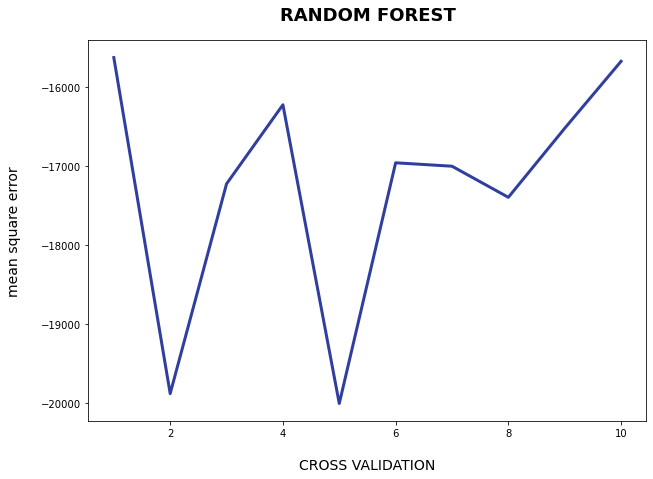

In [412]:
plt.figure(figsize=(10, 7))
plt.title('RANDOM FOREST', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('mean square error', fontsize=14, labelpad=20)
plt.plot(range(1, len(rf_error) + 1), rf_error, color='#303F9F', linewidth=3)

plt.show()

In [413]:
round(rf_error.mean(),4)

-17255.4982

In [414]:
#using gradient boosting
gb_error = model(GradientBoostingRegressor(n_estimators=80,random_state=101),df,y)
gb_error

array([-16530.33972952, -18951.88968319, -15693.19637974, -15281.26798073,
       -19073.29122176, -17339.3933163 , -16094.7981821 , -15094.06885471,
       -14155.66414963, -14421.26239878])

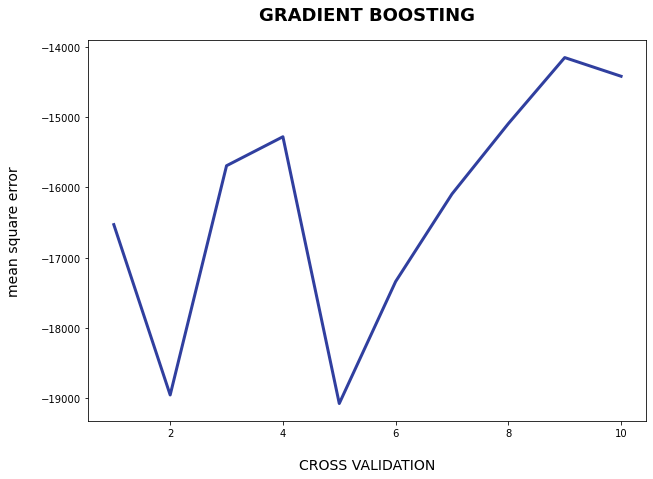

In [415]:
plt.figure(figsize=(10, 7))
plt.title('GRADIENT BOOSTING', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CROSS VALIDATION', fontsize=14, labelpad=20)
plt.ylabel('mean square error', fontsize=14, labelpad=20)
plt.plot(range(1, len(gb_error) + 1), gb_error, color='#303F9F', linewidth=3)

plt.show()

In [416]:
#int data
round(gb_error.mean(),4)

-16263.5172

In [84]:
#label encoded value
round(gb_error.mean(),4)

-16546.6839

In [85]:
#frequency encoded value
gb_error.mean()

-16546.683878537056

In [417]:
#using xgboosting
xgb_error = model(XGBRegressor(),df,y)
xgb_error

array([-18458.93921233, -19904.88308005, -17226.0739512 , -14635.89110659,
       -20122.10124144, -17646.12807684, -16653.86130137, -17704.3161387 ,
       -16199.55532962, -15630.62360873])

In [418]:
round(xgb_error.mean(),4)

-17418.2373

### HYPERPARAMTER TUNING

In [313]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### GRADIENT BOOSTING

In [314]:
param_test1 = {'n_estimators':range(10,120,5)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1,random_state=101), param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch1.fit(df,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=4, param_grid={'n_estimators': range(10, 120, 5)},
             scoring='neg_mean_absolute_error')

In [315]:
# gsearch1.

In [316]:
gsearch1.best_params_

{'n_estimators': 115}

In [317]:
gsearch1.best_score_ 

-15832.715137064277

In [318]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=115, random_state=101), param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch2.fit(df,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=115,
                                                 random_state=101),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='neg_mean_absolute_error')

In [319]:
gsearch2.best_params_

{'max_depth': 5, 'min_samples_split': 200}

In [320]:
gsearch1.best_score_ 

-15832.715137064277

### TRAIN TEST SPLIT

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=101)

In [133]:
# final_model = GradientBoostingRegressor(n_estimators=115,max_depth=3,min_impurity_split=400,random_state=101)
final_model = GradientBoostingRegressor(n_estimators=80,random_state=101)
final_model.fit(X_train,y_train)
test_prediction = final_model.predict(X_test)
metrics.mean_absolute_error(y_test,test_prediction)

16888.641210181268

In [134]:
train_prediction = final_model.predict(X_train)
metrics.mean_absolute_error(y_train,train_prediction)

10388.942429892864

In [135]:
training_error = []
testing_error = []

for i in range(1,120,5):
        gb_model = GradientBoostingRegressor(n_estimators=i,random_state=101)
        gb_model.fit(X_train,y_train)
        
        train_prediction = gb_model.predict(X_train)
        test_prediction = gb_model.predict(X_test)
        
        training_error.append(metrics.mean_absolute_error(y_train,train_prediction))
        testing_error.append(metrics.mean_absolute_error(y_test,test_prediction))

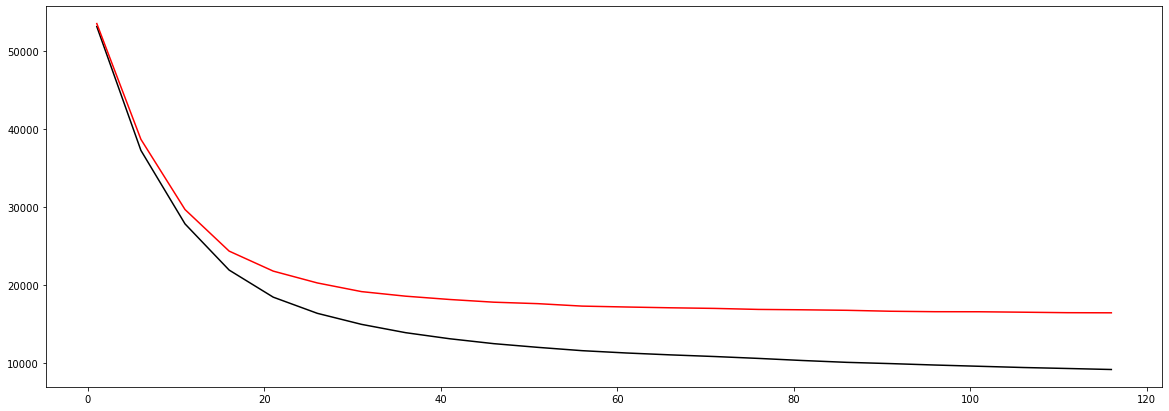

In [136]:
plt.subplots(ncols=1,figsize=(20,7))
plt.plot(range(1,120,5),training_error,label="Training score", color="black")
plt.plot(range(1,120,5),testing_error,label = 'Testing score',color="red")

# sns.jointplot(x=range(1,120,5),y=training_error)
# sns.jointplot(x=range(1,120,5),y=testing_error)

In [137]:
training_error = []
testing_error = []

for i in range(1,16,1):
        gb_model = GradientBoostingRegressor(n_estimators=25,max_depth=i,random_state=101)
        gb_model.fit(X_train,y_train)
        
        train_prediction = gb_model.predict(X_train)
        test_prediction = gb_model.predict(X_test)
        
        training_error.append(metrics.mean_absolute_error(y_train,train_prediction))
        testing_error.append(metrics.mean_absolute_error(y_test,test_prediction))

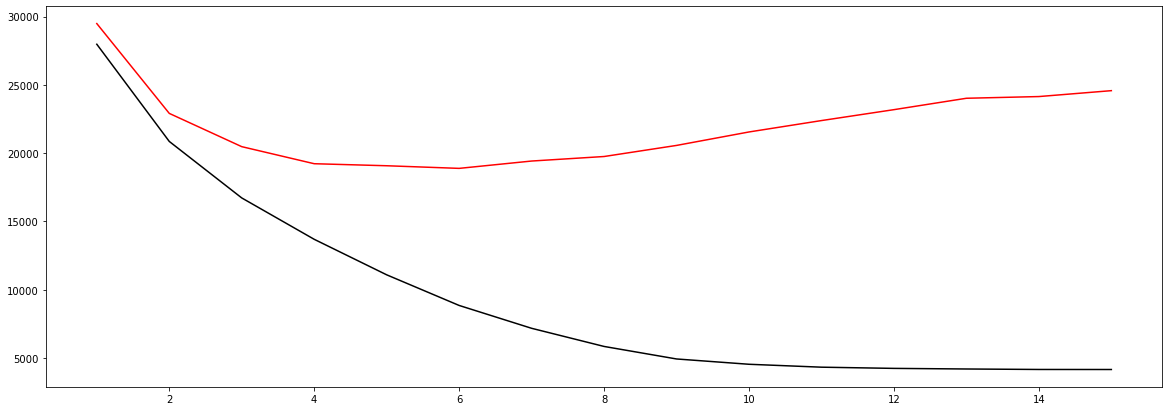

In [138]:
plt.subplots(ncols=1,figsize=(20,7))
plt.plot(range(1,16,1),training_error,label="Training score", color="black")
plt.plot(range(1,16,1),testing_error,label = 'Testing score',color="red")

# sns.jointplot(x=range(1,120,5),y=training_error)
# sns.jointplot(x=range(1,120,5),y=testing_error)

In [349]:
training_error = []
testing_error = []

for i in range(200,2000,200):
        gb_model = GradientBoostingRegressor(max_depth=3,min_samples_split=i,random_state=101)
        gb_model.fit(X_train,y_train)
        
        train_prediction = gb_model.predict(X_train)
        test_prediction = gb_model.predict(X_test)
        
        training_error.append(metrics.mean_absolute_error(y_train,train_prediction))
        testing_error.append(metrics.mean_absolute_error(y_test,test_prediction))

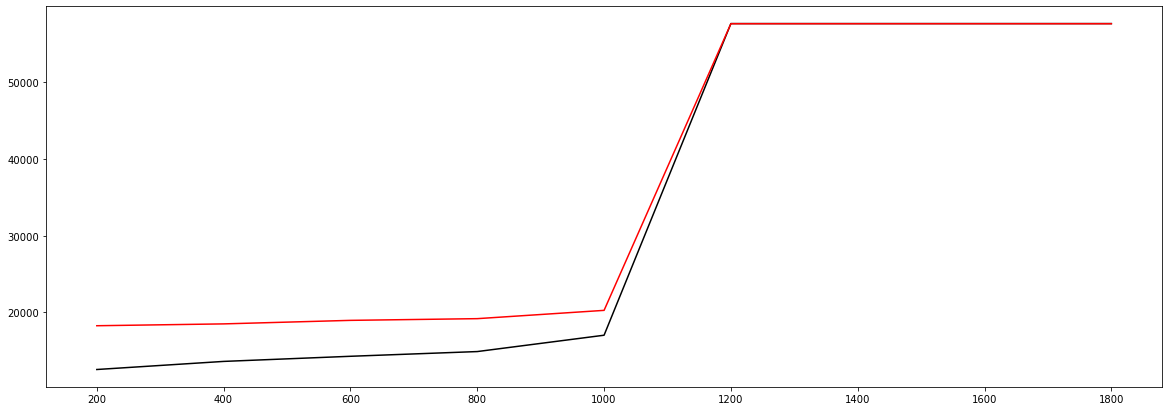

In [350]:
plt.subplots(ncols=1,figsize=(20,7))
plt.plot(range(200,2000,200),training_error,label="Training score", color="black")
plt.plot(range(200,2000,200),testing_error,label = 'Testing score',color="red")

# sns.jointplot(x=range(1,120,5),y=training_error)
# sns.jointplot(x=range(1,120,5),y=testing_error)

### LASSO

In [139]:
from sklearn.linear_model import Lasso

In [140]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)
test_prediction = model_lasso.predict(X_test)
metrics.mean_absolute_error(y_test,test_prediction)

19914.86386417987

In [141]:
train_prediction = model_lasso.predict(X_train)
metrics.mean_absolute_error(y_train,train_prediction)

17455.773827508478

In [142]:
prediction = model_lasso.predict(test_df)

In [369]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": prediction
    })

In [370]:
submission.to_csv('lasso.csv',index=False)

### RIDGE

In [143]:
from sklearn.linear_model import Ridge

In [144]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
test_prediction = model_ridge.predict(X_test)
metrics.mean_absolute_error(y_test,test_prediction)

19892.62824281493

In [145]:
train_prediction = model_ridge.predict(X_train)
metrics.mean_absolute_error(y_train,train_prediction)

17456.70095809096

### STACKING ENSEMBLE

In [146]:
from sklearn.ensemble import StackingRegressor

level0 = list()
level0.append(('lr', LinearRegression()))
level0.append(('rf', RandomForestRegressor(n_estimators=115)))
level0.append(('xgb', XGBRegressor()))

level1 = GradientBoostingRegressor(n_estimators=80)

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(n_estimators=115)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100,

In [147]:
yhat = model.predict(X_test)
metrics.mean_absolute_error(y_test,yhat)

17478.549363408212

In [148]:
train_prediction = model.predict(X_train)
metrics.mean_absolute_error(y_train,train_prediction)

10245.805634287195

### LIGHTGBM

In [149]:
import lightgbm

In [150]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [151]:
parameters = {'metric': 'rsme',
              'boosting': 'gbdt',
              'num_leaves': 5,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
#               'verbose': -1
             }

In [152]:
model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2864
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 58
[LightGBM] [Info] Start training from score 181608.593933


In [153]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_test)


display(metrics.mean_absolute_error(y_train,y_train_pred))
display(metrics.mean_absolute_error(y_test,y_valid_pred))

8490.355834278109

15914.31506343658

In [383]:
test_prediction = model_lgbm.predict(test_df)

In [384]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": test_prediction
    })

In [385]:
submission.to_csv('lightGBM.csv',index=False)

### CATBOOST

In [438]:
import catboost as cb

In [439]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [430]:
catBoost_model = cb.CatBoostRegressor()

In [409]:
catBoost_model.fit(X_train,y_train,eval_set=(X_test,y_test))

Learning rate set to 0.046267
0:	learn: 77164.0988742	test: 77291.6438106	best: 77291.6438106 (0)	total: 47.8ms	remaining: 47.8s
1:	learn: 75027.0752497	test: 75376.0672778	best: 75376.0672778 (1)	total: 49.9ms	remaining: 24.9s
2:	learn: 72964.1780603	test: 73538.4411114	best: 73538.4411114 (2)	total: 51.4ms	remaining: 17.1s
3:	learn: 70902.2155828	test: 71705.6879986	best: 71705.6879986 (3)	total: 53.3ms	remaining: 13.3s
4:	learn: 68767.9684103	test: 69789.8226238	best: 69789.8226238 (4)	total: 54.9ms	remaining: 10.9s
5:	learn: 66934.4889631	test: 68048.7897094	best: 68048.7897094 (5)	total: 56.1ms	remaining: 9.29s
6:	learn: 65144.5424459	test: 66482.8775821	best: 66482.8775821 (6)	total: 57.3ms	remaining: 8.13s
7:	learn: 63457.7959088	test: 65084.0832115	best: 65084.0832115 (7)	total: 58.4ms	remaining: 7.24s
8:	learn: 61803.1273817	test: 63687.9859959	best: 63687.9859959 (8)	total: 59.5ms	remaining: 6.55s
9:	learn: 60218.3952545	test: 62296.2107028	best: 62296.2107028 (9)	total: 60.7

127:	learn: 19176.4478582	test: 30043.1025128	best: 30043.1025128 (127)	total: 188ms	remaining: 1.28s
128:	learn: 19128.2201943	test: 30057.8295633	best: 30043.1025128 (127)	total: 189ms	remaining: 1.28s
129:	learn: 19064.0317948	test: 29998.6773900	best: 29998.6773900 (129)	total: 190ms	remaining: 1.27s
130:	learn: 19012.4712931	test: 29946.5615575	best: 29946.5615575 (130)	total: 191ms	remaining: 1.27s
131:	learn: 18952.7310427	test: 29928.7738443	best: 29928.7738443 (131)	total: 192ms	remaining: 1.26s
132:	learn: 18930.9156839	test: 29936.4440572	best: 29928.7738443 (131)	total: 193ms	remaining: 1.26s
133:	learn: 18907.3672166	test: 29928.8433172	best: 29928.7738443 (131)	total: 194ms	remaining: 1.25s
134:	learn: 18843.5541255	test: 29887.6158579	best: 29887.6158579 (134)	total: 195ms	remaining: 1.25s
135:	learn: 18776.1147009	test: 29859.3107182	best: 29859.3107182 (135)	total: 196ms	remaining: 1.25s
136:	learn: 18747.9202731	test: 29841.2306266	best: 29841.2306266 (136)	total: 197

297:	learn: 12561.8957576	test: 28264.2994649	best: 28263.3699533 (288)	total: 376ms	remaining: 886ms
298:	learn: 12537.3062785	test: 28265.8419915	best: 28263.3699533 (288)	total: 377ms	remaining: 885ms
299:	learn: 12498.3986294	test: 28267.8218379	best: 28263.3699533 (288)	total: 379ms	remaining: 883ms
300:	learn: 12463.2369214	test: 28269.2959198	best: 28263.3699533 (288)	total: 380ms	remaining: 882ms
301:	learn: 12445.5030615	test: 28254.5885977	best: 28254.5885977 (301)	total: 381ms	remaining: 880ms
302:	learn: 12415.5487454	test: 28261.1361213	best: 28254.5885977 (301)	total: 382ms	remaining: 878ms
303:	learn: 12383.3685391	test: 28251.6175527	best: 28251.6175527 (303)	total: 383ms	remaining: 877ms
304:	learn: 12365.8609429	test: 28246.2244085	best: 28246.2244085 (304)	total: 384ms	remaining: 875ms
305:	learn: 12352.4623713	test: 28248.8606650	best: 28246.2244085 (304)	total: 385ms	remaining: 874ms
306:	learn: 12315.6018722	test: 28233.8582500	best: 28233.8582500 (306)	total: 386

456:	learn: 9367.7688035	test: 27973.4515173	best: 27964.9471036 (449)	total: 564ms	remaining: 671ms
457:	learn: 9354.1493183	test: 27975.7488923	best: 27964.9471036 (449)	total: 569ms	remaining: 674ms
458:	learn: 9340.3611730	test: 27972.0331495	best: 27964.9471036 (449)	total: 571ms	remaining: 673ms
459:	learn: 9338.7939463	test: 27971.7192568	best: 27964.9471036 (449)	total: 572ms	remaining: 672ms
460:	learn: 9320.6433904	test: 27971.1843435	best: 27964.9471036 (449)	total: 574ms	remaining: 671ms
461:	learn: 9309.0485090	test: 27970.9226816	best: 27964.9471036 (449)	total: 576ms	remaining: 670ms
462:	learn: 9290.7752549	test: 27968.7595262	best: 27964.9471036 (449)	total: 577ms	remaining: 669ms
463:	learn: 9289.0924961	test: 27964.3271257	best: 27964.3271257 (463)	total: 579ms	remaining: 668ms
464:	learn: 9263.8755418	test: 27971.3119002	best: 27964.3271257 (463)	total: 583ms	remaining: 671ms
465:	learn: 9241.9492519	test: 27976.4503026	best: 27964.3271257 (463)	total: 585ms	remaini

556:	learn: 8014.3152620	test: 27870.3243808	best: 27870.3243808 (556)	total: 746ms	remaining: 593ms
557:	learn: 8004.8063907	test: 27868.9298655	best: 27868.9298655 (557)	total: 748ms	remaining: 592ms
558:	learn: 7985.7366246	test: 27870.4135635	best: 27868.9298655 (557)	total: 749ms	remaining: 591ms
559:	learn: 7968.0976292	test: 27867.1081348	best: 27867.1081348 (559)	total: 750ms	remaining: 589ms
560:	learn: 7947.4111583	test: 27865.6297729	best: 27865.6297729 (560)	total: 751ms	remaining: 588ms
561:	learn: 7946.4554890	test: 27862.7774447	best: 27862.7774447 (561)	total: 752ms	remaining: 586ms
562:	learn: 7937.7677169	test: 27861.0111994	best: 27861.0111994 (562)	total: 753ms	remaining: 585ms
563:	learn: 7924.0508150	test: 27864.8735009	best: 27861.0111994 (562)	total: 754ms	remaining: 583ms
564:	learn: 7908.5340464	test: 27867.4848899	best: 27861.0111994 (562)	total: 755ms	remaining: 582ms
565:	learn: 7892.0983863	test: 27871.9741773	best: 27861.0111994 (562)	total: 756ms	remaini

711:	learn: 6539.2047614	test: 27745.2943864	best: 27745.2943864 (711)	total: 932ms	remaining: 377ms
712:	learn: 6538.7328356	test: 27743.6893087	best: 27743.6893087 (712)	total: 934ms	remaining: 376ms
713:	learn: 6534.3503663	test: 27741.9853736	best: 27741.9853736 (713)	total: 935ms	remaining: 375ms
714:	learn: 6531.7313303	test: 27742.9869130	best: 27741.9853736 (713)	total: 936ms	remaining: 373ms
715:	learn: 6526.3794881	test: 27744.7443375	best: 27741.9853736 (713)	total: 938ms	remaining: 372ms
716:	learn: 6509.5268626	test: 27736.1213416	best: 27736.1213416 (716)	total: 939ms	remaining: 370ms
717:	learn: 6504.7934059	test: 27737.2167877	best: 27736.1213416 (716)	total: 940ms	remaining: 369ms
718:	learn: 6504.2229486	test: 27735.6826189	best: 27735.6826189 (718)	total: 941ms	remaining: 368ms
719:	learn: 6496.3165973	test: 27734.3274010	best: 27734.3274010 (719)	total: 942ms	remaining: 366ms
720:	learn: 6495.8005900	test: 27732.8675221	best: 27732.8675221 (720)	total: 943ms	remaini

819:	learn: 5705.5818453	test: 27671.1104338	best: 27668.6684002 (816)	total: 1.11s	remaining: 245ms
820:	learn: 5692.7678270	test: 27672.2752351	best: 27668.6684002 (816)	total: 1.12s	remaining: 244ms
821:	learn: 5692.2925288	test: 27670.9045528	best: 27668.6684002 (816)	total: 1.12s	remaining: 243ms
822:	learn: 5682.0224109	test: 27678.5097628	best: 27668.6684002 (816)	total: 1.12s	remaining: 241ms
823:	learn: 5680.7933832	test: 27677.4549891	best: 27668.6684002 (816)	total: 1.12s	remaining: 240ms
824:	learn: 5671.0392242	test: 27678.0329547	best: 27668.6684002 (816)	total: 1.12s	remaining: 238ms
825:	learn: 5660.7447695	test: 27673.8032316	best: 27668.6684002 (816)	total: 1.12s	remaining: 237ms
826:	learn: 5651.1191083	test: 27675.1711454	best: 27668.6684002 (816)	total: 1.13s	remaining: 236ms
827:	learn: 5639.3201557	test: 27672.2741462	best: 27668.6684002 (816)	total: 1.13s	remaining: 234ms
828:	learn: 5632.6872162	test: 27672.7455985	best: 27668.6684002 (816)	total: 1.13s	remaini

915:	learn: 5116.4167155	test: 27644.6584336	best: 27633.6982643 (892)	total: 1.3s	remaining: 119ms
916:	learn: 5108.9733266	test: 27642.2473004	best: 27633.6982643 (892)	total: 1.3s	remaining: 118ms
917:	learn: 5101.3209658	test: 27647.6634301	best: 27633.6982643 (892)	total: 1.3s	remaining: 116ms
918:	learn: 5090.1959620	test: 27651.7306197	best: 27633.6982643 (892)	total: 1.3s	remaining: 115ms
919:	learn: 5083.0511664	test: 27651.8459324	best: 27633.6982643 (892)	total: 1.3s	remaining: 113ms
920:	learn: 5077.3010287	test: 27655.2113148	best: 27633.6982643 (892)	total: 1.3s	remaining: 112ms
921:	learn: 5077.0384527	test: 27654.7829546	best: 27633.6982643 (892)	total: 1.31s	remaining: 110ms
922:	learn: 5072.9777463	test: 27654.5203987	best: 27633.6982643 (892)	total: 1.31s	remaining: 109ms
923:	learn: 5067.1372859	test: 27652.4577261	best: 27633.6982643 (892)	total: 1.31s	remaining: 108ms
924:	learn: 5060.0793777	test: 27653.6707370	best: 27633.6982643 (892)	total: 1.31s	remaining: 10

In [425]:
feature_importance = catBoost_model.get_feature_importance(prettified=True)
feature_importance

Feature Id  Importances
0     OverallQual    16.729360
1       GrLivArea    14.116713
2       ExterQual     5.489280
3      BsmtFinSF1     4.460382
4     TotalBsmtSF     4.383098
5      GarageCars     4.372541
6      Fireplaces     3.606260
7        1stFlrSF     3.433619
8      GarageArea     3.362689
9         LotArea     2.943969
10   YearRemodAdd     2.573656
11    KitchenQual     2.532607
12   TotRmsAbvGrd     2.385123
13      YearBuilt     2.144677
14   Neighborhood     2.101546
15   GarageFinish     1.865977
16    GarageYrBlt     1.862101
17       2ndFlrSF     1.586202
18       BsmtQual     1.499316
19    OpenPorchSF     1.440956
20    OverallCond     1.298503
21  SaleCondition     1.234915
22   BsmtFinType1     1.202090
23       FullBath     1.069906
24   BsmtExposure     0.975673
25    LotFrontage     0.805444
26      BsmtUnfSF     0.753746
27     WoodDeckSF     0.731819
28       MSZoning     0.654439
29    FireplaceQu     0.613602
30   BedroomAbvGr     0.577842
31     GarageType     0.574967
32         YrSold     0.514550
33     MasVnrArea     0.500767
34       LotShape     0.499675
35       HalfBath     0.423860
36     CentralAir     0.408966
37    Exterior1st     0.399985
38     MasVnrType     0.369606
39   BsmtFullBath     0.341795
40     Condition1     0.326960
41     PavedDrive     0.319520
42      LotConfig     0.299572
43    LandContour     0.283246
44     Functional     0.274666
45      HeatingQC     0.254467
46    ScreenPorch     0.246785
47     MSSubClass     0.232448
48     Condition2     0.207407
49     Foundation     0.170619
50   BsmtFinType2     0.120598
51  EnclosedPorch     0.099045
52       SaleType     0.096059
53       BsmtCond     0.059707
54   KitchenAbvGr     0.043606
55     Electrical     0.039484
56      RoofStyle     0.027459
57       RoofMatl     0.026325
58      ExterCond     0.019137
59        Heating     0.006121
60     GarageQual     0.004549

In [431]:
grid = {'iterations': [1000,6000],  
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

randomized_search_result = catBoost_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 196870.0332136	test: 203109.5320306	best: 203109.5320306 (0)	total: 897us	remaining: 897ms
1:	learn: 196781.2417624	test: 203019.8976160	best: 203019.8976160 (1)	total: 1.92ms	remaining: 958ms
2:	learn: 196693.2730578	test: 202928.3485539	best: 202928.3485539 (2)	total: 2.48ms	remaining: 825ms
3:	learn: 196605.9223109	test: 202835.2581671	best: 202835.2581671 (3)	total: 3.09ms	remaining: 769ms
4:	learn: 196516.0709790	test: 202739.3343992	best: 202739.3343992 (4)	total: 3.62ms	remaining: 720ms
5:	learn: 196429.3508703	test: 202646.7154169	best: 202646.7154169 (5)	total: 4.13ms	remaining: 684ms
6:	learn: 196341.5711592	test: 202554.3526005	best: 202554.3526005 (6)	total: 5.13ms	remaining: 728ms
7:	learn: 196251.3584045	test: 202458.7893199	best: 202458.7893199 (7)	total: 6.33ms	remaining: 785ms
8:	learn: 196163.6949472	test: 202368.8461302	best: 202368.8461302 (8)	total: 7.63ms	remaining: 841ms
9:	learn: 196079.5595222	test: 202283.9799030	best: 202283.9799030 (9)	total: 8.94m

228:	learn: 177941.4731970	test: 183585.9049046	best: 183585.9049046 (228)	total: 192ms	remaining: 647ms
229:	learn: 177861.0580757	test: 183503.7425269	best: 183503.7425269 (229)	total: 193ms	remaining: 646ms
230:	learn: 177780.9152099	test: 183424.5463211	best: 183424.5463211 (230)	total: 194ms	remaining: 645ms
231:	learn: 177703.2823650	test: 183344.0444275	best: 183344.0444275 (231)	total: 194ms	remaining: 643ms
232:	learn: 177625.2860005	test: 183262.7212720	best: 183262.7212720 (232)	total: 195ms	remaining: 642ms
233:	learn: 177547.5186629	test: 183185.0632780	best: 183185.0632780 (233)	total: 196ms	remaining: 641ms
234:	learn: 177468.8724566	test: 183104.6623306	best: 183104.6623306 (234)	total: 196ms	remaining: 640ms
235:	learn: 177388.7940997	test: 183024.6223356	best: 183024.6223356 (235)	total: 197ms	remaining: 638ms
236:	learn: 177311.2084111	test: 182945.2811722	best: 182945.2811722 (236)	total: 198ms	remaining: 638ms
237:	learn: 177234.2116662	test: 182867.1967242	best: 1

481:	learn: 159362.7001315	test: 164497.5928707	best: 164497.5928707 (481)	total: 383ms	remaining: 412ms
482:	learn: 159290.8413881	test: 164423.8703065	best: 164423.8703065 (482)	total: 386ms	remaining: 413ms
483:	learn: 159225.2432305	test: 164354.8379746	best: 164354.8379746 (483)	total: 386ms	remaining: 412ms
484:	learn: 159156.1117064	test: 164283.3442032	best: 164283.3442032 (484)	total: 387ms	remaining: 411ms
485:	learn: 159089.4162740	test: 164214.8694308	best: 164214.8694308 (485)	total: 388ms	remaining: 410ms
486:	learn: 159021.5057621	test: 164146.9440526	best: 164146.9440526 (486)	total: 389ms	remaining: 410ms
487:	learn: 158958.4631236	test: 164083.0680290	best: 164083.0680290 (487)	total: 389ms	remaining: 408ms
488:	learn: 158892.2083138	test: 164012.3591719	best: 164012.3591719 (488)	total: 390ms	remaining: 407ms
489:	learn: 158821.4184787	test: 163939.9538955	best: 163939.9538955 (489)	total: 390ms	remaining: 406ms
490:	learn: 158751.7578153	test: 163866.4431312	best: 1

740:	learn: 142566.0046715	test: 147079.8001421	best: 147079.8001421 (740)	total: 575ms	remaining: 201ms
741:	learn: 142506.6102991	test: 147016.5335479	best: 147016.5335479 (741)	total: 576ms	remaining: 200ms
742:	learn: 142448.0081434	test: 146954.9937664	best: 146954.9937664 (742)	total: 577ms	remaining: 199ms
743:	learn: 142386.6297308	test: 146893.8433571	best: 146893.8433571 (743)	total: 577ms	remaining: 199ms
744:	learn: 142327.8940001	test: 146832.5263568	best: 146832.5263568 (744)	total: 578ms	remaining: 198ms
745:	learn: 142270.6141486	test: 146772.2977467	best: 146772.2977467 (745)	total: 579ms	remaining: 197ms
746:	learn: 142210.1594323	test: 146707.6724670	best: 146707.6724670 (746)	total: 579ms	remaining: 196ms
747:	learn: 142152.0731152	test: 146649.4896337	best: 146649.4896337 (747)	total: 580ms	remaining: 195ms
748:	learn: 142091.2693673	test: 146583.8817109	best: 146583.8817109 (748)	total: 581ms	remaining: 195ms
749:	learn: 142028.1851328	test: 146515.9861720	best: 1

970:	learn: 129360.4410352	test: 133391.5541863	best: 133391.5541863 (970)	total: 769ms	remaining: 23ms
971:	learn: 129307.4826540	test: 133337.2323272	best: 133337.2323272 (971)	total: 771ms	remaining: 22.2ms
972:	learn: 129251.7935338	test: 133281.6070804	best: 133281.6070804 (972)	total: 773ms	remaining: 21.4ms
973:	learn: 129197.4280853	test: 133223.2230617	best: 133223.2230617 (973)	total: 774ms	remaining: 20.7ms
974:	learn: 129143.1141429	test: 133167.5688922	best: 133167.5688922 (974)	total: 775ms	remaining: 19.9ms
975:	learn: 129089.4294771	test: 133111.2917083	best: 133111.2917083 (975)	total: 776ms	remaining: 19.1ms
976:	learn: 129037.4564409	test: 133057.4894719	best: 133057.4894719 (976)	total: 777ms	remaining: 18.3ms
977:	learn: 128986.3356131	test: 133005.1884697	best: 133005.1884697 (977)	total: 778ms	remaining: 17.5ms
978:	learn: 128930.5785318	test: 132944.8087011	best: 132944.8087011 (978)	total: 778ms	remaining: 16.7ms
979:	learn: 128877.2995071	test: 132889.0572910	

217:	learn: 179249.0103912	test: 184938.5339665	best: 184938.5339665 (217)	total: 166ms	remaining: 594ms
218:	learn: 179170.4350659	test: 184857.2773627	best: 184857.2773627 (218)	total: 166ms	remaining: 594ms
219:	learn: 179091.9640452	test: 184778.5259643	best: 184778.5259643 (219)	total: 167ms	remaining: 593ms
220:	learn: 179014.2743396	test: 184697.5139962	best: 184697.5139962 (220)	total: 168ms	remaining: 592ms
221:	learn: 178938.0426585	test: 184620.3407410	best: 184620.3407410 (221)	total: 169ms	remaining: 591ms
222:	learn: 178860.7533791	test: 184541.0634184	best: 184541.0634184 (222)	total: 169ms	remaining: 591ms
223:	learn: 178786.2047552	test: 184461.4103767	best: 184461.4103767 (223)	total: 171ms	remaining: 592ms
224:	learn: 178708.4559909	test: 184381.8812190	best: 184381.8812190 (224)	total: 171ms	remaining: 591ms
225:	learn: 178629.6776066	test: 184300.2629414	best: 184300.2629414 (225)	total: 172ms	remaining: 590ms
226:	learn: 178554.9352188	test: 184223.9808749	best: 1

472:	learn: 160826.0124357	test: 165997.2191832	best: 165997.2191832 (472)	total: 359ms	remaining: 400ms
473:	learn: 160757.4963327	test: 165927.1569435	best: 165927.1569435 (473)	total: 359ms	remaining: 399ms
474:	learn: 160690.6989143	test: 165858.8778090	best: 165858.8778090 (474)	total: 360ms	remaining: 398ms
475:	learn: 160624.3207848	test: 165791.6414700	best: 165791.6414700 (475)	total: 362ms	remaining: 399ms
476:	learn: 160557.0219391	test: 165721.6937251	best: 165721.6937251 (476)	total: 365ms	remaining: 401ms
477:	learn: 160488.8222301	test: 165652.7035128	best: 165652.7035128 (477)	total: 367ms	remaining: 401ms
478:	learn: 160419.6613513	test: 165583.4153572	best: 165583.4153572 (478)	total: 368ms	remaining: 400ms
479:	learn: 160350.9925282	test: 165510.4379892	best: 165510.4379892 (479)	total: 369ms	remaining: 400ms
480:	learn: 160286.2217096	test: 165444.5490674	best: 165444.5490674 (480)	total: 370ms	remaining: 399ms
481:	learn: 160219.8817689	test: 165378.7304013	best: 1

715:	learn: 145257.7378437	test: 149831.4034970	best: 149831.4034970 (715)	total: 551ms	remaining: 218ms
716:	learn: 145197.8778790	test: 149768.3598837	best: 149768.3598837 (716)	total: 551ms	remaining: 218ms
717:	learn: 145137.4429200	test: 149706.6479135	best: 149706.6479135 (717)	total: 552ms	remaining: 217ms
718:	learn: 145077.3335856	test: 149643.7605990	best: 149643.7605990 (718)	total: 553ms	remaining: 216ms
719:	learn: 145016.9273093	test: 149581.0740698	best: 149581.0740698 (719)	total: 554ms	remaining: 215ms
720:	learn: 144957.6514145	test: 149518.8445592	best: 149518.8445592 (720)	total: 555ms	remaining: 215ms
721:	learn: 144897.8053739	test: 149458.1261492	best: 149458.1261492 (721)	total: 556ms	remaining: 214ms
722:	learn: 144837.3544937	test: 149394.2097770	best: 149394.2097770 (722)	total: 557ms	remaining: 213ms
723:	learn: 144775.5534169	test: 149328.1936258	best: 149328.1936258 (723)	total: 557ms	remaining: 213ms
724:	learn: 144714.5941843	test: 149262.9291118	best: 1

953:	learn: 131709.8750393	test: 135775.7380689	best: 135775.7380689 (953)	total: 744ms	remaining: 35.9ms
954:	learn: 131658.4586852	test: 135722.0143736	best: 135722.0143736 (954)	total: 745ms	remaining: 35.1ms
955:	learn: 131606.8210333	test: 135670.9048822	best: 135670.9048822 (955)	total: 746ms	remaining: 34.3ms
956:	learn: 131553.1983240	test: 135612.2154018	best: 135612.2154018 (956)	total: 747ms	remaining: 33.6ms
957:	learn: 131498.8795979	test: 135555.4623219	best: 135555.4623219 (957)	total: 748ms	remaining: 32.8ms
958:	learn: 131446.8614509	test: 135502.2217401	best: 135502.2217401 (958)	total: 748ms	remaining: 32ms
959:	learn: 131392.6438889	test: 135444.8393592	best: 135444.8393592 (959)	total: 749ms	remaining: 31.2ms
960:	learn: 131341.2121710	test: 135390.9299547	best: 135390.9299547 (960)	total: 750ms	remaining: 30.4ms
961:	learn: 131287.0463348	test: 135333.6743430	best: 135333.6743430 (961)	total: 750ms	remaining: 29.6ms
962:	learn: 131233.4301217	test: 135278.1674350	

181:	learn: 98279.1117454	test: 100842.1910183	best: 100842.1910183 (181)	total: 157ms	remaining: 708ms
182:	learn: 97929.5226014	test: 100465.0005060	best: 100465.0005060 (182)	total: 158ms	remaining: 707ms
183:	learn: 97577.2417504	test: 100120.3467662	best: 100120.3467662 (183)	total: 159ms	remaining: 705ms
184:	learn: 97232.0004894	test: 99760.8222527	best: 99760.8222527 (184)	total: 160ms	remaining: 703ms
185:	learn: 96881.0849605	test: 99397.8901448	best: 99397.8901448 (185)	total: 160ms	remaining: 702ms
186:	learn: 96540.5550512	test: 99041.4987227	best: 99041.4987227 (186)	total: 161ms	remaining: 700ms
187:	learn: 96210.6653838	test: 98690.8956010	best: 98690.8956010 (187)	total: 163ms	remaining: 704ms
188:	learn: 95882.6530631	test: 98338.3845416	best: 98338.3845416 (188)	total: 164ms	remaining: 703ms
189:	learn: 95555.3762110	test: 98012.2402117	best: 98012.2402117 (189)	total: 165ms	remaining: 702ms
190:	learn: 95213.2853374	test: 97650.5657175	best: 97650.5657175 (190)	tota

397:	learn: 52326.9472635	test: 51334.0227327	best: 51334.0227327 (397)	total: 348ms	remaining: 526ms
398:	learn: 52213.4616478	test: 51206.9787124	best: 51206.9787124 (398)	total: 349ms	remaining: 525ms
399:	learn: 52098.6104007	test: 51079.4240620	best: 51079.4240620 (399)	total: 349ms	remaining: 524ms
400:	learn: 51971.9215562	test: 50932.6694494	best: 50932.6694494 (400)	total: 350ms	remaining: 523ms
401:	learn: 51848.9699189	test: 50792.4041559	best: 50792.4041559 (401)	total: 351ms	remaining: 522ms
402:	learn: 51729.8000580	test: 50668.4875811	best: 50668.4875811 (402)	total: 351ms	remaining: 521ms
403:	learn: 51623.0219871	test: 50558.2043658	best: 50558.2043658 (403)	total: 352ms	remaining: 519ms
404:	learn: 51514.8899167	test: 50425.0176946	best: 50425.0176946 (404)	total: 353ms	remaining: 518ms
405:	learn: 51392.7517575	test: 50293.6699801	best: 50293.6699801 (405)	total: 353ms	remaining: 517ms
406:	learn: 51266.0269860	test: 50158.3883775	best: 50158.3883775 (406)	total: 354

707:	learn: 32462.6069674	test: 30220.0042082	best: 30220.0042082 (707)	total: 536ms	remaining: 221ms
708:	learn: 32429.4263888	test: 30192.1852596	best: 30192.1852596 (708)	total: 536ms	remaining: 220ms
709:	learn: 32392.0400093	test: 30152.8262893	best: 30152.8262893 (709)	total: 537ms	remaining: 219ms
710:	learn: 32364.0036300	test: 30125.1747837	best: 30125.1747837 (710)	total: 537ms	remaining: 218ms
711:	learn: 32339.3679525	test: 30104.9323602	best: 30104.9323602 (711)	total: 538ms	remaining: 217ms
712:	learn: 32313.9327010	test: 30083.9548510	best: 30083.9548510 (712)	total: 538ms	remaining: 217ms
713:	learn: 32284.2144537	test: 30052.4664157	best: 30052.4664157 (713)	total: 539ms	remaining: 216ms
714:	learn: 32249.2682596	test: 30021.9186519	best: 30021.9186519 (714)	total: 539ms	remaining: 215ms
715:	learn: 32219.9995445	test: 29998.7303627	best: 29998.7303627 (715)	total: 540ms	remaining: 214ms
716:	learn: 32189.5394990	test: 29973.6123982	best: 29973.6123982 (716)	total: 540

7:	learn: 190010.8890690	test: 195939.3636367	best: 195939.3636367 (7)	total: 4.92ms	remaining: 3.69s
8:	learn: 189166.0137052	test: 195071.7139510	best: 195071.7139510 (8)	total: 5.53ms	remaining: 3.68s
9:	learn: 188359.7071288	test: 194257.7009693	best: 194257.7009693 (9)	total: 6.09ms	remaining: 3.65s
10:	learn: 187517.1682074	test: 193370.7178871	best: 193370.7178871 (10)	total: 6.64ms	remaining: 3.62s
11:	learn: 186667.4003852	test: 192468.8910050	best: 192468.8910050 (11)	total: 7.23ms	remaining: 3.61s
12:	learn: 185854.4261539	test: 191651.4482222	best: 191651.4482222 (12)	total: 7.83ms	remaining: 3.61s
13:	learn: 185040.3200054	test: 190814.3489955	best: 190814.3489955 (13)	total: 8.45ms	remaining: 3.61s
14:	learn: 184220.8618635	test: 189970.1288071	best: 189970.1288071 (14)	total: 9.09ms	remaining: 3.63s
15:	learn: 183392.3460121	test: 189125.8462090	best: 189125.8462090 (15)	total: 9.71ms	remaining: 3.63s
16:	learn: 182586.6582468	test: 188239.2769095	best: 188239.2769095 (1

324:	learn: 56062.9611021	test: 55400.5465561	best: 55400.5465561 (324)	total: 194ms	remaining: 3.39s
325:	learn: 55880.4304498	test: 55202.5171613	best: 55202.5171613 (325)	total: 194ms	remaining: 3.38s
326:	learn: 55706.1837912	test: 55014.8736531	best: 55014.8736531 (326)	total: 195ms	remaining: 3.38s
327:	learn: 55537.6018535	test: 54820.0474920	best: 54820.0474920 (327)	total: 195ms	remaining: 3.38s
328:	learn: 55371.7827491	test: 54655.0771734	best: 54655.0771734 (328)	total: 196ms	remaining: 3.38s
329:	learn: 55202.4997940	test: 54464.7299094	best: 54464.7299094 (329)	total: 199ms	remaining: 3.42s
330:	learn: 55046.7360698	test: 54288.4310713	best: 54288.4310713 (330)	total: 200ms	remaining: 3.42s
331:	learn: 54880.3763956	test: 54117.2826417	best: 54117.2826417 (331)	total: 201ms	remaining: 3.42s
332:	learn: 54717.3656817	test: 53938.8142821	best: 53938.8142821 (332)	total: 201ms	remaining: 3.43s
333:	learn: 54543.8085919	test: 53760.9004543	best: 53760.9004543 (333)	total: 202

632:	learn: 29887.6387302	test: 29069.0353681	best: 29069.0353681 (632)	total: 386ms	remaining: 3.27s
633:	learn: 29845.3507657	test: 29052.4197460	best: 29052.4197460 (633)	total: 386ms	remaining: 3.27s
634:	learn: 29797.9244750	test: 29021.4966112	best: 29021.4966112 (634)	total: 387ms	remaining: 3.27s
635:	learn: 29761.2879759	test: 28989.5442247	best: 28989.5442247 (635)	total: 388ms	remaining: 3.27s
636:	learn: 29722.0317561	test: 28956.8462597	best: 28956.8462597 (636)	total: 392ms	remaining: 3.3s
637:	learn: 29683.0827250	test: 28922.8167220	best: 28922.8167220 (637)	total: 392ms	remaining: 3.3s
638:	learn: 29643.7016189	test: 28880.7560200	best: 28880.7560200 (638)	total: 393ms	remaining: 3.3s
639:	learn: 29599.0993581	test: 28852.2589352	best: 28852.2589352 (639)	total: 394ms	remaining: 3.3s
640:	learn: 29557.3968365	test: 28818.0718895	best: 28818.0718895 (640)	total: 394ms	remaining: 3.3s
641:	learn: 29518.1386294	test: 28782.7620645	best: 28782.7620645 (641)	total: 395ms	re

939:	learn: 23119.0203664	test: 23828.4627419	best: 23828.4627419 (939)	total: 575ms	remaining: 3.1s
940:	learn: 23106.3653910	test: 23819.5842334	best: 23819.5842334 (940)	total: 576ms	remaining: 3.1s
941:	learn: 23091.7018534	test: 23811.8192926	best: 23811.8192926 (941)	total: 577ms	remaining: 3.1s
942:	learn: 23077.7072591	test: 23797.7559967	best: 23797.7559967 (942)	total: 579ms	remaining: 3.11s
943:	learn: 23066.0500506	test: 23785.2537956	best: 23785.2537956 (943)	total: 580ms	remaining: 3.11s
944:	learn: 23053.5856737	test: 23772.0763946	best: 23772.0763946 (944)	total: 581ms	remaining: 3.11s
945:	learn: 23042.0335186	test: 23761.7763165	best: 23761.7763165 (945)	total: 582ms	remaining: 3.11s
946:	learn: 23030.2446355	test: 23747.7428490	best: 23747.7428490 (946)	total: 583ms	remaining: 3.11s
947:	learn: 23017.3712892	test: 23741.2388783	best: 23741.2388783 (947)	total: 583ms	remaining: 3.11s
948:	learn: 23003.8238639	test: 23729.9780063	best: 23729.9780063 (948)	total: 584ms	

1173:	learn: 20797.1180137	test: 22259.7257667	best: 22259.7257667 (1173)	total: 765ms	remaining: 3.15s
1174:	learn: 20791.4094543	test: 22252.2779830	best: 22252.2779830 (1174)	total: 766ms	remaining: 3.15s
1175:	learn: 20785.0770545	test: 22247.9810552	best: 22247.9810552 (1175)	total: 767ms	remaining: 3.15s
1176:	learn: 20770.7491634	test: 22245.7905469	best: 22245.7905469 (1176)	total: 767ms	remaining: 3.14s
1177:	learn: 20763.1692336	test: 22247.6504393	best: 22245.7905469 (1176)	total: 768ms	remaining: 3.14s
1178:	learn: 20755.0270598	test: 22236.8081643	best: 22236.8081643 (1178)	total: 768ms	remaining: 3.14s
1179:	learn: 20747.5718702	test: 22234.4787937	best: 22234.4787937 (1179)	total: 769ms	remaining: 3.14s
1180:	learn: 20736.3299608	test: 22227.7488212	best: 22227.7488212 (1180)	total: 769ms	remaining: 3.14s
1181:	learn: 20731.2581908	test: 22224.2967798	best: 22224.2967798 (1181)	total: 770ms	remaining: 3.14s
1182:	learn: 20724.1387301	test: 22223.4003513	best: 22223.40035

1369:	learn: 19393.2278715	test: 21524.3574240	best: 21524.3574240 (1369)	total: 954ms	remaining: 3.23s
1370:	learn: 19384.8883099	test: 21517.7525037	best: 21517.7525037 (1370)	total: 955ms	remaining: 3.23s
1371:	learn: 19379.9751158	test: 21513.9027920	best: 21513.9027920 (1371)	total: 956ms	remaining: 3.23s
1372:	learn: 19375.6296756	test: 21509.6921841	best: 21509.6921841 (1372)	total: 958ms	remaining: 3.23s
1373:	learn: 19371.3347607	test: 21507.7402364	best: 21507.7402364 (1373)	total: 959ms	remaining: 3.23s
1374:	learn: 19363.5332644	test: 21502.2096180	best: 21502.2096180 (1374)	total: 960ms	remaining: 3.23s
1375:	learn: 19358.7911847	test: 21501.4119986	best: 21501.4119986 (1375)	total: 961ms	remaining: 3.23s
1376:	learn: 19352.9645673	test: 21503.6832730	best: 21501.4119986 (1375)	total: 961ms	remaining: 3.23s
1377:	learn: 19349.5651920	test: 21503.2886283	best: 21501.4119986 (1375)	total: 962ms	remaining: 3.23s
1378:	learn: 19342.9158166	test: 21499.6936740	best: 21499.69367

1570:	learn: 18214.8032918	test: 21028.2950386	best: 21028.2950386 (1570)	total: 1.15s	remaining: 3.23s
1571:	learn: 18211.4542671	test: 21026.9338897	best: 21026.9338897 (1571)	total: 1.15s	remaining: 3.23s
1572:	learn: 18207.2463563	test: 21023.8422301	best: 21023.8422301 (1572)	total: 1.15s	remaining: 3.23s
1573:	learn: 18203.4335362	test: 21022.1600342	best: 21022.1600342 (1573)	total: 1.15s	remaining: 3.23s
1574:	learn: 18199.8903268	test: 21019.8707645	best: 21019.8707645 (1574)	total: 1.15s	remaining: 3.23s
1575:	learn: 18192.3932686	test: 21015.6273472	best: 21015.6273472 (1575)	total: 1.15s	remaining: 3.23s
1576:	learn: 18186.9087650	test: 21015.5049457	best: 21015.5049457 (1576)	total: 1.15s	remaining: 3.23s
1577:	learn: 18180.8695508	test: 21011.9389991	best: 21011.9389991 (1577)	total: 1.15s	remaining: 3.22s
1578:	learn: 18175.5355000	test: 21006.1565828	best: 21006.1565828 (1578)	total: 1.15s	remaining: 3.22s
1579:	learn: 18166.4151391	test: 21007.2965005	best: 21006.15658

1839:	learn: 16874.9457834	test: 20574.1247950	best: 20574.1247950 (1839)	total: 1.34s	remaining: 3.02s
1840:	learn: 16869.0401525	test: 20571.0306108	best: 20571.0306108 (1840)	total: 1.34s	remaining: 3.02s
1841:	learn: 16863.5904933	test: 20569.6948232	best: 20569.6948232 (1841)	total: 1.34s	remaining: 3.02s
1842:	learn: 16859.8825708	test: 20569.3967762	best: 20569.3967762 (1842)	total: 1.34s	remaining: 3.02s
1843:	learn: 16854.0974496	test: 20569.8547348	best: 20569.3967762 (1842)	total: 1.34s	remaining: 3.02s
1844:	learn: 16848.7071322	test: 20568.5582292	best: 20568.5582292 (1844)	total: 1.34s	remaining: 3.02s
1845:	learn: 16845.4763901	test: 20568.8325363	best: 20568.5582292 (1844)	total: 1.34s	remaining: 3.02s
1846:	learn: 16841.1020397	test: 20570.2459700	best: 20568.5582292 (1844)	total: 1.34s	remaining: 3.02s
1847:	learn: 16835.8906157	test: 20565.5256962	best: 20565.5256962 (1847)	total: 1.34s	remaining: 3.02s
1848:	learn: 16832.5080603	test: 20565.1456088	best: 20565.14560

2110:	learn: 15786.2287522	test: 20375.8473875	best: 20374.4481994 (2109)	total: 1.53s	remaining: 2.81s
2111:	learn: 15782.9025580	test: 20374.8128803	best: 20374.4481994 (2109)	total: 1.53s	remaining: 2.81s
2112:	learn: 15780.3311317	test: 20374.8233328	best: 20374.4481994 (2109)	total: 1.53s	remaining: 2.81s
2113:	learn: 15777.4148701	test: 20374.4173835	best: 20374.4173835 (2113)	total: 1.53s	remaining: 2.81s
2114:	learn: 15775.1805636	test: 20373.1054131	best: 20373.1054131 (2114)	total: 1.53s	remaining: 2.81s
2115:	learn: 15772.7086002	test: 20372.9525706	best: 20372.9525706 (2115)	total: 1.53s	remaining: 2.81s
2116:	learn: 15766.1405844	test: 20374.4169796	best: 20372.9525706 (2115)	total: 1.53s	remaining: 2.81s
2117:	learn: 15761.2135677	test: 20372.2403949	best: 20372.2403949 (2117)	total: 1.53s	remaining: 2.81s
2118:	learn: 15755.2269026	test: 20370.3760390	best: 20370.3760390 (2118)	total: 1.53s	remaining: 2.81s
2119:	learn: 15751.1271333	test: 20372.9859224	best: 20370.37603

2364:	learn: 14893.6924654	test: 20280.8379093	best: 20280.8379093 (2364)	total: 1.72s	remaining: 2.64s
2365:	learn: 14889.8483191	test: 20279.4178654	best: 20279.4178654 (2365)	total: 1.72s	remaining: 2.64s
2366:	learn: 14885.9351975	test: 20280.8884873	best: 20279.4178654 (2365)	total: 1.72s	remaining: 2.64s
2367:	learn: 14880.8385697	test: 20278.4663238	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2368:	learn: 14878.2743366	test: 20281.1033156	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2369:	learn: 14874.9369515	test: 20280.4172508	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2370:	learn: 14871.2093483	test: 20280.9990282	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2371:	learn: 14867.9064979	test: 20280.3371255	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2372:	learn: 14865.3145117	test: 20280.5979110	best: 20278.4663238 (2367)	total: 1.72s	remaining: 2.64s
2373:	learn: 14861.6383325	test: 20280.6122345	best: 20278.46632

2615:	learn: 14156.4878227	test: 20244.9128847	best: 20240.1784417 (2604)	total: 1.91s	remaining: 2.47s
2616:	learn: 14154.2602535	test: 20243.5505804	best: 20240.1784417 (2604)	total: 1.91s	remaining: 2.47s
2617:	learn: 14150.9949573	test: 20245.2471988	best: 20240.1784417 (2604)	total: 1.91s	remaining: 2.47s
2618:	learn: 14148.8444160	test: 20244.4019404	best: 20240.1784417 (2604)	total: 1.91s	remaining: 2.47s
2619:	learn: 14145.8183066	test: 20242.9758168	best: 20240.1784417 (2604)	total: 1.92s	remaining: 2.47s
2620:	learn: 14141.7662950	test: 20245.5156056	best: 20240.1784417 (2604)	total: 1.92s	remaining: 2.47s
2621:	learn: 14140.0838239	test: 20245.6681854	best: 20240.1784417 (2604)	total: 1.92s	remaining: 2.47s
2622:	learn: 14138.2868302	test: 20245.0536382	best: 20240.1784417 (2604)	total: 1.92s	remaining: 2.47s
2623:	learn: 14135.0684557	test: 20246.7775666	best: 20240.1784417 (2604)	total: 1.92s	remaining: 2.47s
2624:	learn: 14132.0404025	test: 20247.8387433	best: 20240.17844

2842:	learn: 13568.7029461	test: 20223.5879369	best: 20223.5879369 (2842)	total: 2.1s	remaining: 2.33s
2843:	learn: 13566.5501941	test: 20223.7013837	best: 20223.5879369 (2842)	total: 2.1s	remaining: 2.33s
2844:	learn: 13565.1472994	test: 20223.6417630	best: 20223.5879369 (2842)	total: 2.1s	remaining: 2.33s
2845:	learn: 13562.0826866	test: 20222.2358302	best: 20222.2358302 (2845)	total: 2.1s	remaining: 2.33s
2846:	learn: 13559.7953596	test: 20221.6012040	best: 20221.6012040 (2846)	total: 2.1s	remaining: 2.33s
2847:	learn: 13557.7107164	test: 20220.6611853	best: 20220.6611853 (2847)	total: 2.11s	remaining: 2.33s
2848:	learn: 13552.3239697	test: 20217.7226800	best: 20217.7226800 (2848)	total: 2.11s	remaining: 2.33s
2849:	learn: 13549.5423896	test: 20216.0168501	best: 20216.0168501 (2849)	total: 2.11s	remaining: 2.33s
2850:	learn: 13544.2073690	test: 20213.1043597	best: 20213.1043597 (2850)	total: 2.11s	remaining: 2.33s
2851:	learn: 13541.8298693	test: 20213.0928209	best: 20213.0928209 (2

3089:	learn: 12997.0799056	test: 20239.3461647	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.16s
3090:	learn: 12995.6454731	test: 20238.6866843	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.16s
3091:	learn: 12994.0619990	test: 20239.8689586	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.16s
3092:	learn: 12992.2610835	test: 20240.6028392	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.16s
3093:	learn: 12990.5430425	test: 20239.8258723	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.15s
3094:	learn: 12988.1872963	test: 20238.9421564	best: 20212.1162222 (2857)	total: 2.29s	remaining: 2.15s
3095:	learn: 12986.2991897	test: 20238.5989018	best: 20212.1162222 (2857)	total: 2.3s	remaining: 2.15s
3096:	learn: 12983.0983525	test: 20240.5482477	best: 20212.1162222 (2857)	total: 2.3s	remaining: 2.15s
3097:	learn: 12980.5435834	test: 20239.1908406	best: 20212.1162222 (2857)	total: 2.3s	remaining: 2.15s
3098:	learn: 12978.8085756	test: 20239.2395986	best: 20212.1162222 

3353:	learn: 12430.7234533	test: 20248.9826630	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.96s
3354:	learn: 12428.4647128	test: 20249.5549125	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.96s
3355:	learn: 12426.4259671	test: 20249.0111497	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.96s
3356:	learn: 12423.8854442	test: 20249.5520161	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3357:	learn: 12422.0814152	test: 20248.4753694	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3358:	learn: 12420.0817222	test: 20248.2405553	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3359:	learn: 12416.7044285	test: 20245.8913378	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3360:	learn: 12414.1907344	test: 20245.9030387	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3361:	learn: 12413.0770956	test: 20245.7268925	best: 20212.1162222 (2857)	total: 2.48s	remaining: 1.95s
3362:	learn: 12410.1151340	test: 20244.7884444	best: 20212.11622

3667:	learn: 11831.2545482	test: 20214.1560563	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3668:	learn: 11829.4817472	test: 20213.7464759	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3669:	learn: 11827.7811027	test: 20214.0030958	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3670:	learn: 11826.7855417	test: 20213.1633421	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3671:	learn: 11825.7805825	test: 20213.4193599	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3672:	learn: 11824.0877092	test: 20213.2973917	best: 20196.1063446 (3580)	total: 2.67s	remaining: 1.7s
3673:	learn: 11820.7886037	test: 20213.0299775	best: 20196.1063446 (3580)	total: 2.68s	remaining: 1.69s
3674:	learn: 11819.2481452	test: 20213.1512301	best: 20196.1063446 (3580)	total: 2.68s	remaining: 1.69s
3675:	learn: 11816.1901714	test: 20217.4741652	best: 20196.1063446 (3580)	total: 2.68s	remaining: 1.69s
3676:	learn: 11814.1596038	test: 20217.1076887	best: 20196.1063446 (35

3957:	learn: 11326.2705567	test: 20198.0189746	best: 20189.3045297 (3826)	total: 2.86s	remaining: 1.48s
3958:	learn: 11323.8243083	test: 20198.2551433	best: 20189.3045297 (3826)	total: 2.86s	remaining: 1.48s
3959:	learn: 11322.3758858	test: 20199.4343683	best: 20189.3045297 (3826)	total: 2.86s	remaining: 1.48s
3960:	learn: 11320.4477810	test: 20199.7432480	best: 20189.3045297 (3826)	total: 2.86s	remaining: 1.47s
3961:	learn: 11318.8793613	test: 20200.8044803	best: 20189.3045297 (3826)	total: 2.87s	remaining: 1.47s
3962:	learn: 11317.7684678	test: 20200.1675301	best: 20189.3045297 (3826)	total: 2.87s	remaining: 1.47s
3963:	learn: 11315.7894588	test: 20200.2888828	best: 20189.3045297 (3826)	total: 2.87s	remaining: 1.47s
3964:	learn: 11314.7991268	test: 20199.9914026	best: 20189.3045297 (3826)	total: 2.87s	remaining: 1.47s
3965:	learn: 11311.9505313	test: 20198.9751107	best: 20189.3045297 (3826)	total: 2.87s	remaining: 1.47s
3966:	learn: 11310.5981435	test: 20199.5577041	best: 20189.30452

4194:	learn: 10944.2347888	test: 20205.4518612	best: 20189.3045297 (3826)	total: 3.05s	remaining: 1.31s
4195:	learn: 10941.9172517	test: 20208.3120542	best: 20189.3045297 (3826)	total: 3.05s	remaining: 1.31s
4196:	learn: 10940.5067681	test: 20207.9647307	best: 20189.3045297 (3826)	total: 3.05s	remaining: 1.31s
4197:	learn: 10939.2275942	test: 20207.1768045	best: 20189.3045297 (3826)	total: 3.05s	remaining: 1.31s
4198:	learn: 10936.8344400	test: 20209.7108984	best: 20189.3045297 (3826)	total: 3.05s	remaining: 1.31s
4199:	learn: 10935.7058991	test: 20209.3727878	best: 20189.3045297 (3826)	total: 3.06s	remaining: 1.31s
4200:	learn: 10932.7823001	test: 20208.8492575	best: 20189.3045297 (3826)	total: 3.06s	remaining: 1.31s
4201:	learn: 10931.4613371	test: 20209.6170586	best: 20189.3045297 (3826)	total: 3.06s	remaining: 1.31s
4202:	learn: 10930.2233172	test: 20209.9082185	best: 20189.3045297 (3826)	total: 3.06s	remaining: 1.31s
4203:	learn: 10928.1084573	test: 20209.3673235	best: 20189.30452

4394:	learn: 10640.1035721	test: 20226.9264210	best: 20189.3045297 (3826)	total: 3.24s	remaining: 1.18s
4395:	learn: 10639.4467749	test: 20227.1828310	best: 20189.3045297 (3826)	total: 3.24s	remaining: 1.18s
4396:	learn: 10638.2789065	test: 20227.2076643	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4397:	learn: 10635.6064288	test: 20225.6896264	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4398:	learn: 10634.3803724	test: 20224.9127670	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4399:	learn: 10632.2380859	test: 20227.7363291	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4400:	learn: 10631.0812072	test: 20227.7645644	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4401:	learn: 10630.0944040	test: 20227.9236584	best: 20189.3045297 (3826)	total: 3.25s	remaining: 1.18s
4402:	learn: 10629.7715094	test: 20228.1822100	best: 20189.3045297 (3826)	total: 3.26s	remaining: 1.18s
4403:	learn: 10628.1725057	test: 20229.0244833	best: 20189.30452

4645:	learn: 10281.7526530	test: 20241.7329715	best: 20189.3045297 (3826)	total: 3.44s	remaining: 1s
4646:	learn: 10279.7013553	test: 20242.0594865	best: 20189.3045297 (3826)	total: 3.44s	remaining: 1s
4647:	learn: 10277.9164254	test: 20242.4338013	best: 20189.3045297 (3826)	total: 3.44s	remaining: 1000ms
4648:	learn: 10276.4507091	test: 20242.6311890	best: 20189.3045297 (3826)	total: 3.44s	remaining: 999ms
4649:	learn: 10275.0368925	test: 20242.7677523	best: 20189.3045297 (3826)	total: 3.44s	remaining: 998ms
4650:	learn: 10273.9045894	test: 20242.8951527	best: 20189.3045297 (3826)	total: 3.44s	remaining: 998ms
4651:	learn: 10272.5228254	test: 20244.0359714	best: 20189.3045297 (3826)	total: 3.44s	remaining: 997ms
4652:	learn: 10270.5662943	test: 20244.8793614	best: 20189.3045297 (3826)	total: 3.44s	remaining: 996ms
4653:	learn: 10270.2507335	test: 20245.2011952	best: 20189.3045297 (3826)	total: 3.44s	remaining: 996ms
4654:	learn: 10269.1690243	test: 20245.8578821	best: 20189.3045297 (3

4795:	learn: 10070.2334293	test: 20265.0195342	best: 20189.3045297 (3826)	total: 3.63s	remaining: 911ms
4796:	learn: 10068.0206844	test: 20266.7804293	best: 20189.3045297 (3826)	total: 3.63s	remaining: 910ms
4797:	learn: 10067.7606098	test: 20266.8088557	best: 20189.3045297 (3826)	total: 3.63s	remaining: 909ms
4798:	learn: 10066.6578392	test: 20267.4584316	best: 20189.3045297 (3826)	total: 3.63s	remaining: 909ms
4799:	learn: 10066.0474997	test: 20267.8453387	best: 20189.3045297 (3826)	total: 3.63s	remaining: 908ms
4800:	learn: 10063.9898586	test: 20266.1056063	best: 20189.3045297 (3826)	total: 3.63s	remaining: 908ms
4801:	learn: 10062.8773693	test: 20266.9360565	best: 20189.3045297 (3826)	total: 3.63s	remaining: 907ms
4802:	learn: 10060.8300334	test: 20265.6805491	best: 20189.3045297 (3826)	total: 3.64s	remaining: 906ms
4803:	learn: 10058.8929925	test: 20266.0590532	best: 20189.3045297 (3826)	total: 3.64s	remaining: 906ms
4804:	learn: 10057.7519423	test: 20265.2897443	best: 20189.30452

5026:	learn: 9762.8984013	test: 20282.3796998	best: 20189.3045297 (3826)	total: 3.82s	remaining: 739ms
5027:	learn: 9761.3677342	test: 20282.8277948	best: 20189.3045297 (3826)	total: 3.82s	remaining: 739ms
5028:	learn: 9759.9815163	test: 20284.5534638	best: 20189.3045297 (3826)	total: 3.82s	remaining: 738ms
5029:	learn: 9758.9770193	test: 20284.5736020	best: 20189.3045297 (3826)	total: 3.82s	remaining: 737ms
5030:	learn: 9758.3641690	test: 20283.9579320	best: 20189.3045297 (3826)	total: 3.82s	remaining: 736ms
5031:	learn: 9756.3844760	test: 20283.6801775	best: 20189.3045297 (3826)	total: 3.82s	remaining: 736ms
5032:	learn: 9754.2243933	test: 20282.9384137	best: 20189.3045297 (3826)	total: 3.82s	remaining: 735ms
5033:	learn: 9752.4329938	test: 20281.8803542	best: 20189.3045297 (3826)	total: 3.82s	remaining: 734ms
5034:	learn: 9752.2001414	test: 20282.0070488	best: 20189.3045297 (3826)	total: 3.83s	remaining: 733ms
5035:	learn: 9750.6751144	test: 20285.2057294	best: 20189.3045297 (3826)	

5317:	learn: 9383.1784666	test: 20309.2671054	best: 20189.3045297 (3826)	total: 4.01s	remaining: 514ms
5318:	learn: 9382.8461915	test: 20309.4497659	best: 20189.3045297 (3826)	total: 4.01s	remaining: 514ms
5319:	learn: 9381.7258933	test: 20309.6321220	best: 20189.3045297 (3826)	total: 4.01s	remaining: 513ms
5320:	learn: 9379.9339877	test: 20309.2533359	best: 20189.3045297 (3826)	total: 4.01s	remaining: 512ms
5321:	learn: 9378.8720866	test: 20310.6813384	best: 20189.3045297 (3826)	total: 4.01s	remaining: 511ms
5322:	learn: 9377.0641079	test: 20310.8272229	best: 20189.3045297 (3826)	total: 4.01s	remaining: 511ms
5323:	learn: 9376.5647192	test: 20310.2128721	best: 20189.3045297 (3826)	total: 4.02s	remaining: 510ms
5324:	learn: 9375.6099023	test: 20310.7128284	best: 20189.3045297 (3826)	total: 4.02s	remaining: 509ms
5325:	learn: 9373.8685447	test: 20312.4008103	best: 20189.3045297 (3826)	total: 4.02s	remaining: 509ms
5326:	learn: 9372.3840729	test: 20313.1558700	best: 20189.3045297 (3826)	

5612:	learn: 9021.6495673	test: 20334.3993318	best: 20189.3045297 (3826)	total: 4.2s	remaining: 290ms
5613:	learn: 9020.7323804	test: 20334.4806931	best: 20189.3045297 (3826)	total: 4.2s	remaining: 289ms
5614:	learn: 9019.7312315	test: 20334.0741880	best: 20189.3045297 (3826)	total: 4.2s	remaining: 288ms
5615:	learn: 9019.1201960	test: 20334.3774210	best: 20189.3045297 (3826)	total: 4.2s	remaining: 287ms
5616:	learn: 9017.4535372	test: 20334.7599226	best: 20189.3045297 (3826)	total: 4.21s	remaining: 287ms
5617:	learn: 9016.1819603	test: 20334.3568846	best: 20189.3045297 (3826)	total: 4.21s	remaining: 286ms
5618:	learn: 9014.8224530	test: 20334.7318022	best: 20189.3045297 (3826)	total: 4.21s	remaining: 285ms
5619:	learn: 9013.7732820	test: 20334.8022776	best: 20189.3045297 (3826)	total: 4.21s	remaining: 284ms
5620:	learn: 9012.1847734	test: 20335.2797588	best: 20189.3045297 (3826)	total: 4.21s	remaining: 284ms
5621:	learn: 9010.5675082	test: 20336.3081145	best: 20189.3045297 (3826)	tota

5915:	learn: 8685.5400337	test: 20348.1486639	best: 20189.3045297 (3826)	total: 4.39s	remaining: 62.3ms
5916:	learn: 8684.3127856	test: 20348.3606127	best: 20189.3045297 (3826)	total: 4.39s	remaining: 61.6ms
5917:	learn: 8684.1268221	test: 20348.5093287	best: 20189.3045297 (3826)	total: 4.39s	remaining: 60.9ms
5918:	learn: 8682.7094209	test: 20348.0848196	best: 20189.3045297 (3826)	total: 4.39s	remaining: 60.1ms
5919:	learn: 8682.2061080	test: 20348.1755323	best: 20189.3045297 (3826)	total: 4.39s	remaining: 59.4ms
5920:	learn: 8680.7898267	test: 20349.0582866	best: 20189.3045297 (3826)	total: 4.39s	remaining: 58.6ms
5921:	learn: 8679.7297633	test: 20348.6525741	best: 20189.3045297 (3826)	total: 4.39s	remaining: 57.9ms
5922:	learn: 8679.0088148	test: 20348.7295255	best: 20189.3045297 (3826)	total: 4.39s	remaining: 57.1ms
5923:	learn: 8677.2396221	test: 20349.9822253	best: 20189.3045297 (3826)	total: 4.39s	remaining: 56.4ms
5924:	learn: 8675.6824406	test: 20349.9376737	best: 20189.304529

112:	learn: 26437.5979510	test: 24916.7560809	best: 24916.7560809 (112)	total: 97.2ms	remaining: 5.06s
113:	learn: 26334.2872704	test: 24861.0680267	best: 24861.0680267 (113)	total: 98.3ms	remaining: 5.08s
114:	learn: 26211.7253114	test: 24769.3275634	best: 24769.3275634 (114)	total: 99.6ms	remaining: 5.09s
115:	learn: 26156.5432969	test: 24756.4369851	best: 24756.4369851 (115)	total: 101ms	remaining: 5.12s
116:	learn: 26080.8278363	test: 24737.0946832	best: 24737.0946832 (116)	total: 102ms	remaining: 5.13s
117:	learn: 26042.0691520	test: 24731.5599561	best: 24731.5599561 (117)	total: 103ms	remaining: 5.12s
118:	learn: 26002.4802401	test: 24724.0036403	best: 24724.0036403 (118)	total: 103ms	remaining: 5.1s
119:	learn: 25948.9056608	test: 24711.9532498	best: 24711.9532498 (119)	total: 105ms	remaining: 5.13s
120:	learn: 25905.1443324	test: 24707.9863648	best: 24707.9863648 (120)	total: 105ms	remaining: 5.13s
121:	learn: 25863.2895205	test: 24704.9805674	best: 24704.9805674 (121)	total: 1

377:	learn: 17802.7297183	test: 21419.7822730	best: 21418.2188894 (376)	total: 287ms	remaining: 4.27s
378:	learn: 17778.0147073	test: 21423.1439006	best: 21418.2188894 (376)	total: 288ms	remaining: 4.27s
379:	learn: 17768.5384411	test: 21409.2454815	best: 21409.2454815 (379)	total: 289ms	remaining: 4.27s
380:	learn: 17759.3547868	test: 21395.8269442	best: 21395.8269442 (380)	total: 291ms	remaining: 4.3s
381:	learn: 17728.0774686	test: 21383.7037376	best: 21383.7037376 (381)	total: 293ms	remaining: 4.3s
382:	learn: 17677.5176702	test: 21400.9999974	best: 21383.7037376 (381)	total: 293ms	remaining: 4.3s
383:	learn: 17669.1924372	test: 21402.6952079	best: 21383.7037376 (381)	total: 294ms	remaining: 4.3s
384:	learn: 17665.5310522	test: 21402.1300764	best: 21383.7037376 (381)	total: 295ms	remaining: 4.3s
385:	learn: 17617.3323307	test: 21365.0316832	best: 21365.0316832 (385)	total: 295ms	remaining: 4.29s
386:	learn: 17612.6977737	test: 21366.2036111	best: 21365.0316832 (385)	total: 296ms	re

523:	learn: 15199.6777353	test: 20655.7685967	best: 20647.1060855 (513)	total: 478ms	remaining: 4.99s
524:	learn: 15173.0095522	test: 20647.8013534	best: 20647.1060855 (513)	total: 479ms	remaining: 4.99s
525:	learn: 15163.7521082	test: 20647.3501964	best: 20647.1060855 (513)	total: 480ms	remaining: 5s
526:	learn: 15147.5579276	test: 20648.5186214	best: 20647.1060855 (513)	total: 483ms	remaining: 5.02s
527:	learn: 15120.5338626	test: 20641.4347629	best: 20641.4347629 (527)	total: 486ms	remaining: 5.03s
528:	learn: 15118.5769263	test: 20641.1878517	best: 20641.1878517 (528)	total: 487ms	remaining: 5.03s
529:	learn: 15092.1046274	test: 20636.4797182	best: 20636.4797182 (529)	total: 488ms	remaining: 5.04s
530:	learn: 15087.2129340	test: 20637.9090827	best: 20636.4797182 (529)	total: 489ms	remaining: 5.04s
531:	learn: 15068.3733389	test: 20627.4545900	best: 20627.4545900 (531)	total: 490ms	remaining: 5.04s
532:	learn: 15045.3626304	test: 20615.5389677	best: 20615.5389677 (532)	total: 491ms	

756:	learn: 12161.7856178	test: 20660.8838798	best: 20526.4088661 (629)	total: 666ms	remaining: 4.62s
757:	learn: 12154.8155374	test: 20665.9426494	best: 20526.4088661 (629)	total: 667ms	remaining: 4.61s
758:	learn: 12146.7191243	test: 20663.2049392	best: 20526.4088661 (629)	total: 668ms	remaining: 4.61s
759:	learn: 12135.4142784	test: 20666.6855065	best: 20526.4088661 (629)	total: 668ms	remaining: 4.61s
760:	learn: 12121.1919992	test: 20676.6571230	best: 20526.4088661 (629)	total: 669ms	remaining: 4.6s
761:	learn: 12105.7484520	test: 20679.7371254	best: 20526.4088661 (629)	total: 669ms	remaining: 4.6s
762:	learn: 12098.5099989	test: 20682.0082087	best: 20526.4088661 (629)	total: 670ms	remaining: 4.6s
763:	learn: 12096.6593371	test: 20682.1843116	best: 20526.4088661 (629)	total: 670ms	remaining: 4.59s
764:	learn: 12095.7874251	test: 20682.3541963	best: 20526.4088661 (629)	total: 671ms	remaining: 4.59s
765:	learn: 12088.8470853	test: 20685.3241293	best: 20526.4088661 (629)	total: 672ms	

985:	learn: 10407.3636427	test: 20762.9616684	best: 20526.4088661 (629)	total: 857ms	remaining: 4.36s
986:	learn: 10406.1822530	test: 20763.5891246	best: 20526.4088661 (629)	total: 859ms	remaining: 4.36s
987:	learn: 10403.6290319	test: 20764.7102855	best: 20526.4088661 (629)	total: 860ms	remaining: 4.36s
988:	learn: 10403.0841942	test: 20764.9625623	best: 20526.4088661 (629)	total: 862ms	remaining: 4.37s
989:	learn: 10402.5950826	test: 20765.8215560	best: 20526.4088661 (629)	total: 863ms	remaining: 4.37s
990:	learn: 10401.6047319	test: 20766.1595956	best: 20526.4088661 (629)	total: 864ms	remaining: 4.37s
991:	learn: 10401.1399939	test: 20766.2889945	best: 20526.4088661 (629)	total: 864ms	remaining: 4.36s
992:	learn: 10396.0110825	test: 20769.8421726	best: 20526.4088661 (629)	total: 868ms	remaining: 4.38s
993:	learn: 10390.7039523	test: 20776.5168533	best: 20526.4088661 (629)	total: 870ms	remaining: 4.38s
994:	learn: 10382.8489532	test: 20783.3938678	best: 20526.4088661 (629)	total: 871

1196:	learn: 9196.6805907	test: 20859.0342754	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.2s
1197:	learn: 9187.4306205	test: 20864.5393122	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.2s
1198:	learn: 9186.9757157	test: 20864.5851027	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.2s
1199:	learn: 9181.8330423	test: 20867.7076119	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.19s
1200:	learn: 9177.9274410	test: 20865.5307393	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.19s
1201:	learn: 9173.7911988	test: 20871.9689199	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.19s
1202:	learn: 9171.1784858	test: 20874.0935849	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.19s
1203:	learn: 9165.1251401	test: 20872.7751092	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.19s
1204:	learn: 9148.4889829	test: 20877.6214292	best: 20526.4088661 (629)	total: 1.05s	remaining: 4.18s
1205:	learn: 9139.7714950	test: 20876.6211432	best: 20526.4088661 (629)	total: 1.05s	

1394:	learn: 8172.1176553	test: 20821.0219005	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.08s
1395:	learn: 8163.3618874	test: 20812.5230959	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.09s
1396:	learn: 8160.4593331	test: 20806.3797930	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.09s
1397:	learn: 8159.4106770	test: 20806.9370283	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.09s
1398:	learn: 8150.0480386	test: 20807.0638827	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.09s
1399:	learn: 8142.5068302	test: 20806.9987545	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.08s
1400:	learn: 8137.4020989	test: 20802.3844018	best: 20526.4088661 (629)	total: 1.24s	remaining: 4.08s
1401:	learn: 8132.1623448	test: 20802.3953968	best: 20526.4088661 (629)	total: 1.25s	remaining: 4.08s
1402:	learn: 8127.1194610	test: 20804.9127495	best: 20526.4088661 (629)	total: 1.25s	remaining: 4.08s
1403:	learn: 8120.7721288	test: 20802.3682578	best: 20526.4088661 (629)	total: 1.2

1612:	learn: 7167.8408906	test: 20796.8434243	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1613:	learn: 7161.3964515	test: 20794.9008738	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1614:	learn: 7151.3665828	test: 20796.9616409	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1615:	learn: 7146.7808515	test: 20797.3614343	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1616:	learn: 7142.2686552	test: 20793.7974371	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1617:	learn: 7135.7747870	test: 20793.5848400	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1618:	learn: 7131.1760063	test: 20792.2654591	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1619:	learn: 7123.5792891	test: 20790.5757094	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.88s
1620:	learn: 7121.9449389	test: 20791.8817385	best: 20526.4088661 (629)	total: 1.43s	remaining: 3.87s
1621:	learn: 7117.2586228	test: 20795.6524513	best: 20526.4088661 (629)	total: 1.4

1881:	learn: 6125.7227800	test: 20822.5649577	best: 20526.4088661 (629)	total: 1.61s	remaining: 3.53s
1882:	learn: 6122.0171474	test: 20822.9980906	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1883:	learn: 6116.2245988	test: 20823.1334942	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1884:	learn: 6114.1715985	test: 20823.3102528	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1885:	learn: 6107.0638414	test: 20823.0111122	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1886:	learn: 6106.8887613	test: 20822.8866496	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1887:	learn: 6103.6894103	test: 20824.5851259	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1888:	learn: 6101.7012285	test: 20824.4674872	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1889:	learn: 6093.5181139	test: 20828.5775738	best: 20526.4088661 (629)	total: 1.62s	remaining: 3.53s
1890:	learn: 6093.0240191	test: 20828.9093488	best: 20526.4088661 (629)	total: 1.6

2102:	learn: 5401.4630332	test: 20814.8830702	best: 20526.4088661 (629)	total: 1.8s	remaining: 3.34s
2103:	learn: 5401.3395129	test: 20815.0607041	best: 20526.4088661 (629)	total: 1.8s	remaining: 3.34s
2104:	learn: 5397.8073260	test: 20816.1832008	best: 20526.4088661 (629)	total: 1.8s	remaining: 3.34s
2105:	learn: 5397.6820336	test: 20815.7602176	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2106:	learn: 5396.2776415	test: 20815.1710514	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2107:	learn: 5395.0954686	test: 20815.4826020	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2108:	learn: 5392.1972176	test: 20816.5698738	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2109:	learn: 5392.0978779	test: 20816.2857358	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2110:	learn: 5388.8276153	test: 20816.1386813	best: 20526.4088661 (629)	total: 1.81s	remaining: 3.34s
2111:	learn: 5387.1340777	test: 20816.4515029	best: 20526.4088661 (629)	total: 1.81s	

2363:	learn: 4709.3384755	test: 20888.8815419	best: 20526.4088661 (629)	total: 1.99s	remaining: 3.07s
2364:	learn: 4705.0728413	test: 20891.9637911	best: 20526.4088661 (629)	total: 1.99s	remaining: 3.07s
2365:	learn: 4702.4269579	test: 20894.1161896	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2366:	learn: 4698.6775647	test: 20893.6300254	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2367:	learn: 4698.6090433	test: 20893.4833168	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2368:	learn: 4698.5441245	test: 20893.4384336	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2369:	learn: 4693.1343754	test: 20890.2204751	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2370:	learn: 4688.2388999	test: 20891.4997831	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2371:	learn: 4687.3840914	test: 20891.6377657	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2372:	learn: 4684.1804883	test: 20889.9841643	best: 20526.4088661 (629)	total: 2s	remaining: 3.06s
2373

2529:	learn: 4325.2951522	test: 20902.6775342	best: 20526.4088661 (629)	total: 2.19s	remaining: 3s
2530:	learn: 4325.0537618	test: 20902.7016341	best: 20526.4088661 (629)	total: 2.19s	remaining: 3s
2531:	learn: 4321.6966179	test: 20902.4643392	best: 20526.4088661 (629)	total: 2.19s	remaining: 3s
2532:	learn: 4320.6279311	test: 20901.3609454	best: 20526.4088661 (629)	total: 2.19s	remaining: 3s
2533:	learn: 4320.4123429	test: 20901.2914741	best: 20526.4088661 (629)	total: 2.19s	remaining: 2.99s
2534:	learn: 4317.5902164	test: 20901.1089413	best: 20526.4088661 (629)	total: 2.19s	remaining: 2.99s
2535:	learn: 4317.5221510	test: 20901.1570059	best: 20526.4088661 (629)	total: 2.19s	remaining: 2.99s
2536:	learn: 4314.7058785	test: 20901.1432895	best: 20526.4088661 (629)	total: 2.19s	remaining: 2.99s
2537:	learn: 4313.8794604	test: 20900.9722253	best: 20526.4088661 (629)	total: 2.19s	remaining: 2.99s
2538:	learn: 4311.8628236	test: 20902.8375782	best: 20526.4088661 (629)	total: 2.19s	remaining

2820:	learn: 3759.5389237	test: 20990.1517971	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.68s
2821:	learn: 3756.2385201	test: 20988.9134046	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.68s
2822:	learn: 3753.6939337	test: 20987.9757264	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2823:	learn: 3752.5333523	test: 20989.0480404	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2824:	learn: 3750.2036180	test: 20988.8272982	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2825:	learn: 3748.5744720	test: 20987.8760715	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2826:	learn: 3745.0837976	test: 20988.4986246	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2827:	learn: 3740.0995230	test: 20989.1581689	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2828:	learn: 3739.4443964	test: 20989.6378058	best: 20526.4088661 (629)	total: 2.38s	remaining: 2.67s
2829:	learn: 3736.4557275	test: 20991.7036318	best: 20526.4088661 (629)	total: 2.3

3082:	learn: 3346.1150973	test: 21037.0272904	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.45s
3083:	learn: 3345.4489539	test: 21037.3189618	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.45s
3084:	learn: 3341.9587773	test: 21036.2652194	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3085:	learn: 3341.9164519	test: 21036.1418330	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3086:	learn: 3341.7660508	test: 21036.1226494	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3087:	learn: 3338.3784175	test: 21034.8473803	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3088:	learn: 3336.4286896	test: 21036.5900700	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3089:	learn: 3335.6613812	test: 21036.8089102	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3090:	learn: 3333.8559547	test: 21037.2067613	best: 20526.4088661 (629)	total: 2.59s	remaining: 2.44s
3091:	learn: 3332.9298074	test: 21037.3686764	best: 20526.4088661 (629)	total: 2.5

3289:	learn: 3047.2123227	test: 21046.5408639	best: 20526.4088661 (629)	total: 2.78s	remaining: 2.29s
3290:	learn: 3045.9699216	test: 21047.2820225	best: 20526.4088661 (629)	total: 2.78s	remaining: 2.29s
3291:	learn: 3044.0037415	test: 21048.6208921	best: 20526.4088661 (629)	total: 2.78s	remaining: 2.29s
3292:	learn: 3042.5346636	test: 21049.1279497	best: 20526.4088661 (629)	total: 2.78s	remaining: 2.29s
3293:	learn: 3042.5084379	test: 21049.0254871	best: 20526.4088661 (629)	total: 2.78s	remaining: 2.29s
3294:	learn: 3040.2960295	test: 21049.2763285	best: 20526.4088661 (629)	total: 2.79s	remaining: 2.29s
3295:	learn: 3039.9727118	test: 21049.3181032	best: 20526.4088661 (629)	total: 2.79s	remaining: 2.29s
3296:	learn: 3038.5156544	test: 21048.7516597	best: 20526.4088661 (629)	total: 2.79s	remaining: 2.29s
3297:	learn: 3038.0757867	test: 21049.2458343	best: 20526.4088661 (629)	total: 2.79s	remaining: 2.28s
3298:	learn: 3037.7414372	test: 21049.2449329	best: 20526.4088661 (629)	total: 2.7

3604:	learn: 2625.1748922	test: 21077.4238024	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3605:	learn: 2623.7982751	test: 21077.7973681	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3606:	learn: 2622.4359082	test: 21077.4042100	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3607:	learn: 2621.8349910	test: 21077.3235235	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3608:	learn: 2621.4576590	test: 21077.3072657	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3609:	learn: 2621.0847228	test: 21077.6263168	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3610:	learn: 2621.0582078	test: 21077.5672973	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3611:	learn: 2620.0417231	test: 21078.1679002	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.97s
3612:	learn: 2619.7201485	test: 21078.2535802	best: 20526.4088661 (629)	total: 2.97s	remaining: 1.96s
3613:	learn: 2619.1389185	test: 21078.8231979	best: 20526.4088661 (629)	total: 2.9

3945:	learn: 2247.0130157	test: 21099.9121471	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3946:	learn: 2245.3151517	test: 21099.9178107	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3947:	learn: 2244.9600572	test: 21099.7009786	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3948:	learn: 2244.1174744	test: 21099.9118508	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3949:	learn: 2243.9136722	test: 21100.1315948	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3950:	learn: 2243.5504224	test: 21099.4136908	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3951:	learn: 2242.3361810	test: 21098.4763355	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3952:	learn: 2240.1936962	test: 21098.6165306	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3953:	learn: 2237.6663655	test: 21100.6663051	best: 20526.4088661 (629)	total: 3.16s	remaining: 1.64s
3954:	learn: 2236.2508560	test: 21101.4793274	best: 20526.4088661 (629)	total: 3.1

4224:	learn: 1981.4840032	test: 21115.7753123	best: 20526.4088661 (629)	total: 3.35s	remaining: 1.41s
4225:	learn: 1981.0772875	test: 21115.9530424	best: 20526.4088661 (629)	total: 3.35s	remaining: 1.41s
4226:	learn: 1980.0634988	test: 21116.0363236	best: 20526.4088661 (629)	total: 3.35s	remaining: 1.41s
4227:	learn: 1977.4258819	test: 21115.2919830	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.41s
4228:	learn: 1976.9564504	test: 21115.3368017	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.41s
4229:	learn: 1976.5389139	test: 21115.5600951	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.41s
4230:	learn: 1974.5567819	test: 21116.4523057	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.4s
4231:	learn: 1972.9181717	test: 21116.3217307	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.4s
4232:	learn: 1972.8513190	test: 21116.3179854	best: 20526.4088661 (629)	total: 3.36s	remaining: 1.4s
4233:	learn: 1971.8506845	test: 21116.4009462	best: 20526.4088661 (629)	total: 3.36s	

4477:	learn: 1768.9401790	test: 21143.2493418	best: 20526.4088661 (629)	total: 3.54s	remaining: 1.2s
4478:	learn: 1767.8067582	test: 21143.2458287	best: 20526.4088661 (629)	total: 3.54s	remaining: 1.2s
4479:	learn: 1766.2552652	test: 21144.5535369	best: 20526.4088661 (629)	total: 3.54s	remaining: 1.2s
4480:	learn: 1764.9219266	test: 21143.3697629	best: 20526.4088661 (629)	total: 3.54s	remaining: 1.2s
4481:	learn: 1764.2791263	test: 21143.8503098	best: 20526.4088661 (629)	total: 3.54s	remaining: 1.2s
4482:	learn: 1763.3037989	test: 21144.1694345	best: 20526.4088661 (629)	total: 3.55s	remaining: 1.2s
4483:	learn: 1762.4190504	test: 21144.3742109	best: 20526.4088661 (629)	total: 3.55s	remaining: 1.2s
4484:	learn: 1762.3930781	test: 21144.3907934	best: 20526.4088661 (629)	total: 3.55s	remaining: 1.2s
4485:	learn: 1761.5161736	test: 21144.2622916	best: 20526.4088661 (629)	total: 3.55s	remaining: 1.2s
4486:	learn: 1761.2529393	test: 21144.3552673	best: 20526.4088661 (629)	total: 3.55s	remain

4727:	learn: 1592.1983796	test: 21164.7826084	best: 20526.4088661 (629)	total: 3.74s	remaining: 1s
4728:	learn: 1591.0405362	test: 21165.2716911	best: 20526.4088661 (629)	total: 3.74s	remaining: 1s
4729:	learn: 1590.2452918	test: 21165.1636448	best: 20526.4088661 (629)	total: 3.74s	remaining: 1s
4730:	learn: 1590.0116118	test: 21165.1475029	best: 20526.4088661 (629)	total: 3.74s	remaining: 1s
4731:	learn: 1588.9654852	test: 21164.8556345	best: 20526.4088661 (629)	total: 3.74s	remaining: 1s
4732:	learn: 1587.7907587	test: 21164.7624401	best: 20526.4088661 (629)	total: 3.75s	remaining: 1s
4733:	learn: 1587.0087303	test: 21165.3916886	best: 20526.4088661 (629)	total: 3.75s	remaining: 1s
4734:	learn: 1586.1710035	test: 21164.8399011	best: 20526.4088661 (629)	total: 3.75s	remaining: 1s
4735:	learn: 1585.7852985	test: 21164.8445794	best: 20526.4088661 (629)	total: 3.75s	remaining: 1s
4736:	learn: 1585.7608505	test: 21164.8446846	best: 20526.4088661 (629)	total: 3.75s	remaining: 1s
4737:	lear

5003:	learn: 1410.2531746	test: 21179.9496402	best: 20526.4088661 (629)	total: 3.93s	remaining: 782ms
5004:	learn: 1408.7132624	test: 21179.5697410	best: 20526.4088661 (629)	total: 3.93s	remaining: 781ms
5005:	learn: 1407.7342444	test: 21179.9849475	best: 20526.4088661 (629)	total: 3.93s	remaining: 780ms
5006:	learn: 1407.6296910	test: 21179.9877259	best: 20526.4088661 (629)	total: 3.93s	remaining: 779ms
5007:	learn: 1406.9052374	test: 21179.5238733	best: 20526.4088661 (629)	total: 3.93s	remaining: 779ms
5008:	learn: 1406.0082624	test: 21180.4794594	best: 20526.4088661 (629)	total: 3.93s	remaining: 778ms
5009:	learn: 1405.6087307	test: 21180.5168698	best: 20526.4088661 (629)	total: 3.93s	remaining: 777ms
5010:	learn: 1404.9198215	test: 21180.6176242	best: 20526.4088661 (629)	total: 3.93s	remaining: 776ms
5011:	learn: 1404.8518425	test: 21180.8432489	best: 20526.4088661 (629)	total: 3.93s	remaining: 775ms
5012:	learn: 1403.7931126	test: 21180.8261942	best: 20526.4088661 (629)	total: 3.9

5340:	learn: 1233.7279727	test: 21199.0129532	best: 20526.4088661 (629)	total: 4.12s	remaining: 508ms
5341:	learn: 1233.4519225	test: 21198.4001872	best: 20526.4088661 (629)	total: 4.12s	remaining: 507ms
5342:	learn: 1232.6105659	test: 21199.1105532	best: 20526.4088661 (629)	total: 4.12s	remaining: 507ms
5343:	learn: 1232.3232153	test: 21199.0434840	best: 20526.4088661 (629)	total: 4.12s	remaining: 506ms
5344:	learn: 1231.0443697	test: 21199.1617386	best: 20526.4088661 (629)	total: 4.12s	remaining: 505ms
5345:	learn: 1230.5558795	test: 21199.3109903	best: 20526.4088661 (629)	total: 4.12s	remaining: 504ms
5346:	learn: 1229.5803192	test: 21199.0016921	best: 20526.4088661 (629)	total: 4.12s	remaining: 503ms
5347:	learn: 1229.3827772	test: 21199.1039367	best: 20526.4088661 (629)	total: 4.12s	remaining: 503ms
5348:	learn: 1228.3559136	test: 21199.1086805	best: 20526.4088661 (629)	total: 4.12s	remaining: 502ms
5349:	learn: 1228.0541254	test: 21198.8594726	best: 20526.4088661 (629)	total: 4.1

5665:	learn: 1067.5485522	test: 21211.7813384	best: 20526.4088661 (629)	total: 4.31s	remaining: 254ms
5666:	learn: 1066.8195202	test: 21211.6976828	best: 20526.4088661 (629)	total: 4.31s	remaining: 253ms
5667:	learn: 1066.8033031	test: 21211.7119391	best: 20526.4088661 (629)	total: 4.31s	remaining: 252ms
5668:	learn: 1066.3234666	test: 21211.6406061	best: 20526.4088661 (629)	total: 4.31s	remaining: 252ms
5669:	learn: 1065.9632609	test: 21211.6878276	best: 20526.4088661 (629)	total: 4.31s	remaining: 251ms
5670:	learn: 1065.4029304	test: 21211.7112458	best: 20526.4088661 (629)	total: 4.31s	remaining: 250ms
5671:	learn: 1064.3342194	test: 21211.0254160	best: 20526.4088661 (629)	total: 4.31s	remaining: 249ms
5672:	learn: 1063.6766650	test: 21211.2704847	best: 20526.4088661 (629)	total: 4.31s	remaining: 249ms
5673:	learn: 1063.1335391	test: 21210.8913110	best: 20526.4088661 (629)	total: 4.31s	remaining: 248ms
5674:	learn: 1062.9855165	test: 21211.0993503	best: 20526.4088661 (629)	total: 4.3


bestTest = 20526.40887
bestIteration = 629

0:	learn: 188719.5152309	test: 195034.6609053	best: 195034.6609053 (0)	total: 1.14ms	remaining: 1.14s
1:	learn: 180600.6323280	test: 186794.7120669	best: 186794.7120669 (1)	total: 1.55ms	remaining: 773ms
2:	learn: 172865.5909218	test: 179346.0982619	best: 179346.0982619 (2)	total: 2.61ms	remaining: 867ms
3:	learn: 165915.9974023	test: 172119.9863074	best: 172119.9863074 (3)	total: 3.66ms	remaining: 911ms
4:	learn: 159134.2953081	test: 164640.9264601	best: 164640.9264601 (4)	total: 4.75ms	remaining: 944ms
5:	learn: 152607.1396978	test: 157864.6217865	best: 157864.6217865 (5)	total: 5.78ms	remaining: 957ms
6:	learn: 146639.2790380	test: 151881.0024587	best: 151881.0024587 (6)	total: 6.83ms	remaining: 969ms
7:	learn: 140825.9942881	test: 146113.7356259	best: 146113.7356259 (7)	total: 7.87ms	remaining: 976ms
8:	learn: 135119.7605881	test: 140304.4670057	best: 140304.4670057 (8)	total: 8.87ms	remaining: 977ms
9:	learn: 129939.5136188	test: 135412

188:	learn: 15884.1454492	test: 22046.6989213	best: 22046.6989213 (188)	total: 191ms	remaining: 817ms
189:	learn: 15823.7320393	test: 22002.3540991	best: 22002.3540991 (189)	total: 192ms	remaining: 817ms
190:	learn: 15798.3555197	test: 22000.6116974	best: 22000.6116974 (190)	total: 193ms	remaining: 817ms
191:	learn: 15763.7215358	test: 21989.0640295	best: 21989.0640295 (191)	total: 194ms	remaining: 816ms
192:	learn: 15735.2255903	test: 21974.0490747	best: 21974.0490747 (192)	total: 195ms	remaining: 815ms
193:	learn: 15683.9308750	test: 21962.6571348	best: 21962.6571348 (193)	total: 196ms	remaining: 813ms
194:	learn: 15632.1002798	test: 21928.7557902	best: 21928.7557902 (194)	total: 197ms	remaining: 812ms
195:	learn: 15610.4465189	test: 21922.4928201	best: 21922.4928201 (195)	total: 198ms	remaining: 810ms
196:	learn: 15571.3556167	test: 21898.7810232	best: 21898.7810232 (196)	total: 199ms	remaining: 809ms
197:	learn: 15510.4405229	test: 21869.0452572	best: 21869.0452572 (197)	total: 199

369:	learn: 10046.3708201	test: 21242.9731310	best: 21233.8038110 (366)	total: 385ms	remaining: 655ms
370:	learn: 10043.8729869	test: 21244.9219536	best: 21233.8038110 (366)	total: 386ms	remaining: 654ms
371:	learn: 10020.1591129	test: 21265.4780875	best: 21233.8038110 (366)	total: 387ms	remaining: 653ms
372:	learn: 9989.5681981	test: 21254.0178532	best: 21233.8038110 (366)	total: 388ms	remaining: 652ms
373:	learn: 9963.5148413	test: 21250.3627474	best: 21233.8038110 (366)	total: 389ms	remaining: 651ms
374:	learn: 9929.9778085	test: 21249.6558263	best: 21233.8038110 (366)	total: 390ms	remaining: 650ms
375:	learn: 9906.7220260	test: 21240.5803437	best: 21233.8038110 (366)	total: 391ms	remaining: 649ms
376:	learn: 9872.9290676	test: 21237.8977361	best: 21233.8038110 (366)	total: 392ms	remaining: 647ms
377:	learn: 9852.6677576	test: 21239.4324854	best: 21233.8038110 (366)	total: 393ms	remaining: 646ms
378:	learn: 9830.3850762	test: 21243.6330144	best: 21233.8038110 (366)	total: 394ms	rema

466:	learn: 8243.0453171	test: 21170.1634662	best: 21153.4044237 (457)	total: 589ms	remaining: 673ms
467:	learn: 8241.6804132	test: 21171.6092233	best: 21153.4044237 (457)	total: 594ms	remaining: 676ms
468:	learn: 8240.2268321	test: 21172.2617767	best: 21153.4044237 (457)	total: 598ms	remaining: 677ms
469:	learn: 8238.4757150	test: 21174.1923576	best: 21153.4044237 (457)	total: 602ms	remaining: 679ms
470:	learn: 8237.3118031	test: 21175.4811237	best: 21153.4044237 (457)	total: 605ms	remaining: 680ms
471:	learn: 8222.8931028	test: 21171.6675202	best: 21153.4044237 (457)	total: 610ms	remaining: 683ms
472:	learn: 8200.8308742	test: 21172.4854373	best: 21153.4044237 (457)	total: 613ms	remaining: 683ms
473:	learn: 8199.2330133	test: 21174.8661657	best: 21153.4044237 (457)	total: 616ms	remaining: 684ms
474:	learn: 8179.3925796	test: 21182.0344289	best: 21153.4044237 (457)	total: 619ms	remaining: 684ms
475:	learn: 8177.0652417	test: 21178.6020384	best: 21153.4044237 (457)	total: 620ms	remaini

581:	learn: 6659.0637010	test: 21144.2907322	best: 21133.8949420 (577)	total: 783ms	remaining: 563ms
582:	learn: 6647.0037611	test: 21141.7463219	best: 21133.8949420 (577)	total: 785ms	remaining: 561ms
583:	learn: 6634.3881465	test: 21136.3158404	best: 21133.8949420 (577)	total: 786ms	remaining: 560ms
584:	learn: 6617.5302997	test: 21132.4961996	best: 21132.4961996 (584)	total: 788ms	remaining: 559ms
585:	learn: 6601.2579522	test: 21137.2870841	best: 21132.4961996 (584)	total: 789ms	remaining: 558ms
586:	learn: 6593.1684882	test: 21136.7103428	best: 21132.4961996 (584)	total: 790ms	remaining: 556ms
587:	learn: 6577.5899725	test: 21144.7354231	best: 21132.4961996 (584)	total: 792ms	remaining: 555ms
588:	learn: 6567.0477742	test: 21140.9484055	best: 21132.4961996 (584)	total: 793ms	remaining: 554ms
589:	learn: 6558.5711079	test: 21142.2631568	best: 21132.4961996 (584)	total: 795ms	remaining: 553ms
590:	learn: 6546.2809374	test: 21144.0855534	best: 21132.4961996 (584)	total: 796ms	remaini

713:	learn: 5328.4039417	test: 21119.7935559	best: 21099.9724987 (701)	total: 977ms	remaining: 391ms
714:	learn: 5314.0037697	test: 21116.8832186	best: 21099.9724987 (701)	total: 979ms	remaining: 390ms
715:	learn: 5312.8852848	test: 21117.6515120	best: 21099.9724987 (701)	total: 980ms	remaining: 389ms
716:	learn: 5312.0972878	test: 21118.2723853	best: 21099.9724987 (701)	total: 981ms	remaining: 387ms
717:	learn: 5304.7405938	test: 21118.1503190	best: 21099.9724987 (701)	total: 982ms	remaining: 386ms
718:	learn: 5290.8313020	test: 21121.4759709	best: 21099.9724987 (701)	total: 983ms	remaining: 384ms
719:	learn: 5277.8782765	test: 21121.5276870	best: 21099.9724987 (701)	total: 984ms	remaining: 383ms
720:	learn: 5270.9797355	test: 21120.8174303	best: 21099.9724987 (701)	total: 986ms	remaining: 381ms
721:	learn: 5256.0638477	test: 21124.4203601	best: 21099.9724987 (701)	total: 987ms	remaining: 380ms
722:	learn: 5251.9820121	test: 21123.3682035	best: 21099.9724987 (701)	total: 988ms	remaini

888:	learn: 4018.1054466	test: 21079.1049254	best: 21079.1049254 (888)	total: 1.17s	remaining: 146ms
889:	learn: 4005.8594769	test: 21076.7021554	best: 21076.7021554 (889)	total: 1.17s	remaining: 145ms
890:	learn: 3995.5243353	test: 21077.7098537	best: 21076.7021554 (889)	total: 1.18s	remaining: 144ms
891:	learn: 3986.8065202	test: 21076.6001314	best: 21076.6001314 (891)	total: 1.18s	remaining: 142ms
892:	learn: 3986.3795511	test: 21077.4231521	best: 21076.6001314 (891)	total: 1.18s	remaining: 141ms
893:	learn: 3984.6760511	test: 21077.1809933	best: 21076.6001314 (891)	total: 1.18s	remaining: 140ms
894:	learn: 3976.2297109	test: 21078.3033723	best: 21076.6001314 (891)	total: 1.18s	remaining: 138ms
895:	learn: 3967.6849064	test: 21079.2773834	best: 21076.6001314 (891)	total: 1.18s	remaining: 137ms
896:	learn: 3964.6737851	test: 21077.7795342	best: 21076.6001314 (891)	total: 1.18s	remaining: 136ms
897:	learn: 3958.9904547	test: 21076.8800386	best: 21076.6001314 (891)	total: 1.18s	remaini

4:	learn: 158014.0922055	test: 164520.8522760	best: 164520.8522760 (4)	total: 79.9ms	remaining: 15.9s
5:	learn: 151473.8941470	test: 157790.4140605	best: 157790.4140605 (5)	total: 100ms	remaining: 16.6s
6:	learn: 144992.0959597	test: 151170.1652993	best: 151170.1652993 (6)	total: 111ms	remaining: 15.7s
7:	learn: 139283.5642635	test: 146323.7194761	best: 146323.7194761 (7)	total: 131ms	remaining: 16.2s
8:	learn: 133744.3311152	test: 141065.2014420	best: 141065.2014420 (8)	total: 151ms	remaining: 16.6s
9:	learn: 128010.8876508	test: 135238.1760696	best: 135238.1760696 (9)	total: 171ms	remaining: 16.9s
10:	learn: 122761.0952212	test: 130327.3918491	best: 130327.3918491 (10)	total: 191ms	remaining: 17.2s
11:	learn: 117762.1720614	test: 125550.0523903	best: 125550.0523903 (11)	total: 211ms	remaining: 17.4s
12:	learn: 113095.5943682	test: 121476.0185583	best: 121476.0185583 (12)	total: 232ms	remaining: 17.6s
13:	learn: 108626.8488692	test: 117582.3885186	best: 117582.3885186 (13)	total: 263m

89:	learn: 15080.5004914	test: 34479.0231558	best: 34479.0231558 (89)	total: 1.99s	remaining: 20.1s
90:	learn: 14890.8438163	test: 34371.9383051	best: 34371.9383051 (90)	total: 2.01s	remaining: 20.1s
91:	learn: 14706.7574206	test: 34252.0659836	best: 34252.0659836 (91)	total: 2.03s	remaining: 20s
92:	learn: 14520.0527147	test: 34098.9866287	best: 34098.9866287 (92)	total: 2.05s	remaining: 20s
93:	learn: 14353.8362946	test: 34073.6320328	best: 34073.6320328 (93)	total: 2.07s	remaining: 19.9s
94:	learn: 14165.1728342	test: 33938.6290656	best: 33938.6290656 (94)	total: 2.09s	remaining: 19.9s
95:	learn: 14004.7313531	test: 33880.6669619	best: 33880.6669619 (95)	total: 2.11s	remaining: 19.8s
96:	learn: 13837.9804473	test: 33771.2329558	best: 33771.2329558 (96)	total: 2.13s	remaining: 19.8s
97:	learn: 13708.2866654	test: 33617.4460488	best: 33617.4460488 (97)	total: 2.15s	remaining: 19.8s
98:	learn: 13566.2507712	test: 33520.9876474	best: 33520.9876474 (98)	total: 2.17s	remaining: 19.7s
99:	

171:	learn: 7127.8284457	test: 31156.2742249	best: 31156.2742249 (171)	total: 3.65s	remaining: 17.6s
172:	learn: 7061.5381102	test: 31142.5731802	best: 31142.5731802 (172)	total: 3.67s	remaining: 17.5s
173:	learn: 7000.2705975	test: 31127.6974795	best: 31127.6974795 (173)	total: 3.69s	remaining: 17.5s
174:	learn: 6962.5848243	test: 31122.6352326	best: 31122.6352326 (174)	total: 3.71s	remaining: 17.5s
175:	learn: 6918.0383436	test: 31110.1145106	best: 31110.1145106 (175)	total: 3.73s	remaining: 17.5s
176:	learn: 6862.2043600	test: 31089.6235042	best: 31089.6235042 (176)	total: 3.75s	remaining: 17.4s
177:	learn: 6794.5141923	test: 31086.1513363	best: 31086.1513363 (177)	total: 3.77s	remaining: 17.4s
178:	learn: 6759.0909795	test: 31070.2024838	best: 31070.2024838 (178)	total: 3.79s	remaining: 17.4s
179:	learn: 6705.0141873	test: 31056.6949438	best: 31056.6949438 (179)	total: 3.81s	remaining: 17.4s
180:	learn: 6669.8312098	test: 31049.0618636	best: 31049.0618636 (180)	total: 3.83s	remaini

254:	learn: 4095.5603682	test: 30773.5080381	best: 30773.5080381 (254)	total: 5.35s	remaining: 15.6s
255:	learn: 4065.2575053	test: 30769.0335543	best: 30769.0335543 (255)	total: 5.37s	remaining: 15.6s
256:	learn: 4018.8313919	test: 30775.9605315	best: 30769.0335543 (255)	total: 5.39s	remaining: 15.6s
257:	learn: 3996.3417180	test: 30776.1545951	best: 30769.0335543 (255)	total: 5.42s	remaining: 15.6s
258:	learn: 3954.7637796	test: 30766.0305449	best: 30766.0305449 (258)	total: 5.44s	remaining: 15.6s
259:	learn: 3921.8345306	test: 30772.7749909	best: 30766.0305449 (258)	total: 5.46s	remaining: 15.5s
260:	learn: 3871.2318581	test: 30772.3798196	best: 30766.0305449 (258)	total: 5.48s	remaining: 15.5s
261:	learn: 3837.5272803	test: 30770.7125663	best: 30766.0305449 (258)	total: 5.51s	remaining: 15.5s
262:	learn: 3817.3965229	test: 30772.2125971	best: 30766.0305449 (258)	total: 5.54s	remaining: 15.5s
263:	learn: 3793.9913123	test: 30772.2808965	best: 30766.0305449 (258)	total: 5.56s	remaini

344:	learn: 2300.4814187	test: 30721.4571773	best: 30716.6082996 (283)	total: 7.23s	remaining: 13.7s
345:	learn: 2282.7327583	test: 30719.2152805	best: 30716.6082996 (283)	total: 7.25s	remaining: 13.7s
346:	learn: 2265.3288247	test: 30721.5368669	best: 30716.6082996 (283)	total: 7.27s	remaining: 13.7s
347:	learn: 2243.6673221	test: 30724.3341956	best: 30716.6082996 (283)	total: 7.29s	remaining: 13.7s
348:	learn: 2224.7435230	test: 30728.2609248	best: 30716.6082996 (283)	total: 7.31s	remaining: 13.6s
349:	learn: 2201.2067526	test: 30731.1340448	best: 30716.6082996 (283)	total: 7.33s	remaining: 13.6s
350:	learn: 2188.0607524	test: 30734.1168788	best: 30716.6082996 (283)	total: 7.35s	remaining: 13.6s
351:	learn: 2176.3261336	test: 30733.1922854	best: 30716.6082996 (283)	total: 7.37s	remaining: 13.6s
352:	learn: 2166.1654673	test: 30733.0251561	best: 30716.6082996 (283)	total: 7.39s	remaining: 13.5s
353:	learn: 2147.7365561	test: 30734.4060673	best: 30716.6082996 (283)	total: 7.42s	remaini

428:	learn: 1256.0440641	test: 30703.6495328	best: 30694.3672010 (412)	total: 9.12s	remaining: 12.1s
429:	learn: 1247.4774108	test: 30703.9391280	best: 30694.3672010 (412)	total: 9.14s	remaining: 12.1s
430:	learn: 1240.3257280	test: 30703.3892376	best: 30694.3672010 (412)	total: 9.16s	remaining: 12.1s
431:	learn: 1228.9117174	test: 30704.1433463	best: 30694.3672010 (412)	total: 9.18s	remaining: 12.1s
432:	learn: 1217.1554746	test: 30703.4361553	best: 30694.3672010 (412)	total: 9.2s	remaining: 12s
433:	learn: 1210.5876940	test: 30703.0844437	best: 30694.3672010 (412)	total: 9.22s	remaining: 12s
434:	learn: 1197.5339141	test: 30702.9838656	best: 30694.3672010 (412)	total: 9.24s	remaining: 12s
435:	learn: 1187.6222372	test: 30703.1583086	best: 30694.3672010 (412)	total: 9.27s	remaining: 12s
436:	learn: 1178.2669272	test: 30702.1605375	best: 30694.3672010 (412)	total: 9.29s	remaining: 12s
437:	learn: 1170.5683875	test: 30701.6637830	best: 30694.3672010 (412)	total: 9.32s	remaining: 12s
438

516:	learn: 711.1335852	test: 30686.1851055	best: 30686.0308049 (515)	total: 11s	remaining: 10.3s
517:	learn: 706.0091359	test: 30685.5912644	best: 30685.5912644 (517)	total: 11s	remaining: 10.3s
518:	learn: 702.3669203	test: 30684.8411207	best: 30684.8411207 (518)	total: 11.1s	remaining: 10.2s
519:	learn: 698.2875466	test: 30683.9163981	best: 30683.9163981 (519)	total: 11.1s	remaining: 10.2s
520:	learn: 695.0067878	test: 30684.5585311	best: 30683.9163981 (519)	total: 11.1s	remaining: 10.2s
521:	learn: 692.4355731	test: 30684.6345059	best: 30683.9163981 (519)	total: 11.1s	remaining: 10.2s
522:	learn: 683.9263615	test: 30686.9405364	best: 30683.9163981 (519)	total: 11.1s	remaining: 10.2s
523:	learn: 678.5574742	test: 30686.2728669	best: 30683.9163981 (519)	total: 11.2s	remaining: 10.1s
524:	learn: 675.9494056	test: 30685.9875713	best: 30683.9163981 (519)	total: 11.2s	remaining: 10.1s
525:	learn: 673.4714254	test: 30685.1682138	best: 30683.9163981 (519)	total: 11.2s	remaining: 10.1s
526:

608:	learn: 410.8893574	test: 30681.6707480	best: 30675.9864640 (572)	total: 12.9s	remaining: 8.28s
609:	learn: 408.1666115	test: 30681.6787190	best: 30675.9864640 (572)	total: 12.9s	remaining: 8.26s
610:	learn: 406.2298748	test: 30681.4239359	best: 30675.9864640 (572)	total: 13s	remaining: 8.25s
611:	learn: 403.9213564	test: 30681.4685125	best: 30675.9864640 (572)	total: 13s	remaining: 8.23s
612:	learn: 400.9451218	test: 30682.6968063	best: 30675.9864640 (572)	total: 13s	remaining: 8.21s
613:	learn: 399.1903486	test: 30682.7108922	best: 30675.9864640 (572)	total: 13s	remaining: 8.2s
614:	learn: 396.8164758	test: 30682.0950009	best: 30675.9864640 (572)	total: 13.1s	remaining: 8.18s
615:	learn: 395.3486783	test: 30682.0373280	best: 30675.9864640 (572)	total: 13.1s	remaining: 8.16s
616:	learn: 392.9987194	test: 30682.5486667	best: 30675.9864640 (572)	total: 13.1s	remaining: 8.14s
617:	learn: 390.1095303	test: 30682.2291836	best: 30675.9864640 (572)	total: 13.1s	remaining: 8.12s
618:	lear

697:	learn: 239.1037311	test: 30683.4429318	best: 30675.9864640 (572)	total: 15s	remaining: 6.47s
698:	learn: 238.0105882	test: 30683.2628943	best: 30675.9864640 (572)	total: 15s	remaining: 6.45s
699:	learn: 236.8788129	test: 30683.4886937	best: 30675.9864640 (572)	total: 15s	remaining: 6.43s
700:	learn: 234.8740839	test: 30683.7070355	best: 30675.9864640 (572)	total: 15s	remaining: 6.41s
701:	learn: 233.5906662	test: 30684.0672385	best: 30675.9864640 (572)	total: 15s	remaining: 6.38s
702:	learn: 232.0269870	test: 30683.9462706	best: 30675.9864640 (572)	total: 15.1s	remaining: 6.36s
703:	learn: 230.3138637	test: 30684.1506841	best: 30675.9864640 (572)	total: 15.1s	remaining: 6.34s
704:	learn: 228.6051067	test: 30684.4331181	best: 30675.9864640 (572)	total: 15.1s	remaining: 6.32s
705:	learn: 228.1017531	test: 30684.2537579	best: 30675.9864640 (572)	total: 15.1s	remaining: 6.3s
706:	learn: 226.9072646	test: 30684.3227509	best: 30675.9864640 (572)	total: 15.1s	remaining: 6.27s
707:	learn:

784:	learn: 147.7842233	test: 30682.5467472	best: 30675.9864640 (572)	total: 17.1s	remaining: 4.68s
785:	learn: 147.0154286	test: 30682.5317681	best: 30675.9864640 (572)	total: 17.1s	remaining: 4.66s
786:	learn: 146.1464361	test: 30682.5573797	best: 30675.9864640 (572)	total: 17.1s	remaining: 4.64s
787:	learn: 145.4263314	test: 30682.6394843	best: 30675.9864640 (572)	total: 17.2s	remaining: 4.63s
788:	learn: 144.5564632	test: 30682.4845046	best: 30675.9864640 (572)	total: 17.2s	remaining: 4.61s
789:	learn: 144.3587031	test: 30682.4581110	best: 30675.9864640 (572)	total: 17.3s	remaining: 4.59s
790:	learn: 143.4509498	test: 30682.6159329	best: 30675.9864640 (572)	total: 17.3s	remaining: 4.57s
791:	learn: 143.0021260	test: 30682.5094106	best: 30675.9864640 (572)	total: 17.3s	remaining: 4.54s
792:	learn: 142.1275872	test: 30682.5795881	best: 30675.9864640 (572)	total: 17.3s	remaining: 4.52s
793:	learn: 141.5626011	test: 30682.5614993	best: 30675.9864640 (572)	total: 17.3s	remaining: 4.5s
7

875:	learn: 93.7132385	test: 30684.5684597	best: 30675.9864640 (572)	total: 19s	remaining: 2.69s
876:	learn: 93.0527970	test: 30684.5238305	best: 30675.9864640 (572)	total: 19s	remaining: 2.67s
877:	learn: 92.4134130	test: 30684.5480485	best: 30675.9864640 (572)	total: 19s	remaining: 2.64s
878:	learn: 91.9506542	test: 30684.6097202	best: 30675.9864640 (572)	total: 19s	remaining: 2.62s
879:	learn: 91.6639192	test: 30684.5643752	best: 30675.9864640 (572)	total: 19.1s	remaining: 2.6s
880:	learn: 90.7364221	test: 30684.7056601	best: 30675.9864640 (572)	total: 19.1s	remaining: 2.58s
881:	learn: 90.2794713	test: 30684.6527767	best: 30675.9864640 (572)	total: 19.1s	remaining: 2.56s
882:	learn: 89.4761718	test: 30684.8159736	best: 30675.9864640 (572)	total: 19.1s	remaining: 2.53s
883:	learn: 88.9697271	test: 30684.7890027	best: 30675.9864640 (572)	total: 19.1s	remaining: 2.51s
884:	learn: 88.7353650	test: 30684.7986936	best: 30675.9864640 (572)	total: 19.2s	remaining: 2.49s
885:	learn: 88.3518

959:	learn: 60.9323114	test: 30685.1992912	best: 30675.9864640 (572)	total: 20.7s	remaining: 861ms
960:	learn: 60.8704771	test: 30685.0906136	best: 30675.9864640 (572)	total: 20.7s	remaining: 840ms
961:	learn: 60.7146272	test: 30685.1044337	best: 30675.9864640 (572)	total: 20.7s	remaining: 818ms
962:	learn: 60.3584713	test: 30685.0750869	best: 30675.9864640 (572)	total: 20.7s	remaining: 797ms
963:	learn: 59.9106686	test: 30685.0717415	best: 30675.9864640 (572)	total: 20.8s	remaining: 775ms
964:	learn: 59.7057854	test: 30685.0733819	best: 30675.9864640 (572)	total: 20.8s	remaining: 753ms
965:	learn: 59.4101788	test: 30685.0523226	best: 30675.9864640 (572)	total: 20.8s	remaining: 732ms
966:	learn: 59.0661634	test: 30685.0998838	best: 30675.9864640 (572)	total: 20.8s	remaining: 710ms
967:	learn: 58.5518050	test: 30685.1189617	best: 30675.9864640 (572)	total: 20.8s	remaining: 689ms
968:	learn: 58.4036975	test: 30685.0961085	best: 30675.9864640 (572)	total: 20.9s	remaining: 667ms
969:	learn

44:	learn: 49522.0675746	test: 55856.8320142	best: 55856.8320142 (44)	total: 787ms	remaining: 16.7s
45:	learn: 48393.8018063	test: 54704.9864709	best: 54704.9864709 (45)	total: 808ms	remaining: 16.8s
46:	learn: 47303.5570635	test: 53565.6066469	best: 53565.6066469 (46)	total: 828ms	remaining: 16.8s
47:	learn: 46334.3366122	test: 52702.4188063	best: 52702.4188063 (47)	total: 848ms	remaining: 16.8s
48:	learn: 45362.6927115	test: 51780.8221656	best: 51780.8221656 (48)	total: 849ms	remaining: 16.5s
49:	learn: 44502.5402293	test: 51082.5680964	best: 51082.5680964 (49)	total: 869ms	remaining: 16.5s
50:	learn: 43970.8517489	test: 50828.1349039	best: 50828.1349039 (50)	total: 889ms	remaining: 16.5s
51:	learn: 43167.3748235	test: 50077.2937656	best: 50077.2937656 (51)	total: 908ms	remaining: 16.6s
52:	learn: 42336.5429160	test: 49193.3939522	best: 49193.3939522 (52)	total: 928ms	remaining: 16.6s
53:	learn: 41476.3886390	test: 48491.0702737	best: 48491.0702737 (53)	total: 947ms	remaining: 16.6s


135:	learn: 18461.4223295	test: 34258.2106867	best: 34258.2106867 (135)	total: 2.45s	remaining: 15.6s
136:	learn: 18343.4308102	test: 34241.4162481	best: 34241.4162481 (136)	total: 2.47s	remaining: 15.6s
137:	learn: 18225.4061989	test: 34191.4830971	best: 34191.4830971 (137)	total: 2.49s	remaining: 15.6s
138:	learn: 18108.9162782	test: 34169.7841610	best: 34169.7841610 (138)	total: 2.51s	remaining: 15.6s
139:	learn: 18014.4543512	test: 34147.4939379	best: 34147.4939379 (139)	total: 2.53s	remaining: 15.6s
140:	learn: 17909.0544105	test: 34119.6935625	best: 34119.6935625 (140)	total: 2.55s	remaining: 15.5s
141:	learn: 17760.5313272	test: 34049.6274565	best: 34049.6274565 (141)	total: 2.57s	remaining: 15.5s
142:	learn: 17676.5949503	test: 33945.1996928	best: 33945.1996928 (142)	total: 2.57s	remaining: 15.4s
143:	learn: 17551.9288369	test: 33917.9725542	best: 33917.9725542 (143)	total: 2.59s	remaining: 15.4s
144:	learn: 17428.4084770	test: 33875.9420631	best: 33875.9420631 (144)	total: 2.6

221:	learn: 11674.0998830	test: 32004.2970479	best: 32004.2970479 (221)	total: 4.16s	remaining: 14.6s
222:	learn: 11610.4362012	test: 31994.7170731	best: 31994.7170731 (222)	total: 4.18s	remaining: 14.6s
223:	learn: 11545.5637827	test: 31976.0319934	best: 31976.0319934 (223)	total: 4.2s	remaining: 14.6s
224:	learn: 11492.3407696	test: 31946.8591532	best: 31946.8591532 (224)	total: 4.22s	remaining: 14.5s
225:	learn: 11432.1289983	test: 31934.3719298	best: 31934.3719298 (225)	total: 4.24s	remaining: 14.5s
226:	learn: 11375.1517720	test: 31903.2047706	best: 31903.2047706 (226)	total: 4.26s	remaining: 14.5s
227:	learn: 11334.2672259	test: 31892.4933406	best: 31892.4933406 (227)	total: 4.28s	remaining: 14.5s
228:	learn: 11288.6922514	test: 31871.3703648	best: 31871.3703648 (228)	total: 4.3s	remaining: 14.5s
229:	learn: 11242.1816063	test: 31848.1092525	best: 31848.1092525 (229)	total: 4.32s	remaining: 14.5s
230:	learn: 11167.5681767	test: 31827.0744365	best: 31827.0744365 (230)	total: 4.34s

306:	learn: 8581.6705284	test: 31213.1600978	best: 31213.1600978 (306)	total: 5.87s	remaining: 13.2s
307:	learn: 8565.4195591	test: 31202.1933173	best: 31202.1933173 (307)	total: 5.89s	remaining: 13.2s
308:	learn: 8524.8839885	test: 31198.6557832	best: 31198.6557832 (308)	total: 5.91s	remaining: 13.2s
309:	learn: 8479.7294754	test: 31177.5981429	best: 31177.5981429 (309)	total: 5.93s	remaining: 13.2s
310:	learn: 8467.6518692	test: 31165.0898623	best: 31165.0898623 (310)	total: 5.95s	remaining: 13.2s
311:	learn: 8437.4783640	test: 31154.4247851	best: 31154.4247851 (311)	total: 5.97s	remaining: 13.2s
312:	learn: 8400.7602228	test: 31142.4485238	best: 31142.4485238 (312)	total: 5.99s	remaining: 13.1s
313:	learn: 8363.9470699	test: 31140.6897446	best: 31140.6897446 (313)	total: 6.01s	remaining: 13.1s
314:	learn: 8331.2117430	test: 31137.0278310	best: 31137.0278310 (314)	total: 6.03s	remaining: 13.1s
315:	learn: 8324.9877250	test: 31132.8024229	best: 31132.8024229 (315)	total: 6.05s	remaini

388:	learn: 6360.3415053	test: 30988.9606296	best: 30983.6109529 (387)	total: 7.57s	remaining: 11.9s
389:	learn: 6336.3721509	test: 30990.1081328	best: 30983.6109529 (387)	total: 7.59s	remaining: 11.9s
390:	learn: 6332.5875636	test: 30988.2857892	best: 30983.6109529 (387)	total: 7.61s	remaining: 11.9s
391:	learn: 6309.5063495	test: 30989.3969377	best: 30983.6109529 (387)	total: 7.63s	remaining: 11.8s
392:	learn: 6307.8181472	test: 30989.2775205	best: 30983.6109529 (387)	total: 7.65s	remaining: 11.8s
393:	learn: 6296.6783974	test: 30992.5971251	best: 30983.6109529 (387)	total: 7.67s	remaining: 11.8s
394:	learn: 6275.5753294	test: 30989.7564190	best: 30983.6109529 (387)	total: 7.69s	remaining: 11.8s
395:	learn: 6250.3894167	test: 30987.3150354	best: 30983.6109529 (387)	total: 7.71s	remaining: 11.8s
396:	learn: 6224.5243968	test: 30989.8604410	best: 30983.6109529 (387)	total: 7.74s	remaining: 11.8s
397:	learn: 6190.8745164	test: 30984.9543410	best: 30983.6109529 (387)	total: 7.76s	remaini

477:	learn: 4864.0863949	test: 30921.5008490	best: 30921.5008490 (477)	total: 9.5s	remaining: 10.4s
478:	learn: 4838.1449373	test: 30919.7007398	best: 30919.7007398 (478)	total: 9.52s	remaining: 10.4s
479:	learn: 4837.2502907	test: 30919.4490898	best: 30919.4490898 (479)	total: 9.54s	remaining: 10.3s
480:	learn: 4807.6137611	test: 30919.2875001	best: 30919.2875001 (480)	total: 9.56s	remaining: 10.3s
481:	learn: 4793.1578905	test: 30919.4522792	best: 30919.2875001 (480)	total: 9.58s	remaining: 10.3s
482:	learn: 4765.1117766	test: 30921.5261046	best: 30919.2875001 (480)	total: 9.6s	remaining: 10.3s
483:	learn: 4744.2669352	test: 30923.8200323	best: 30919.2875001 (480)	total: 9.62s	remaining: 10.3s
484:	learn: 4724.2423842	test: 30918.5833383	best: 30918.5833383 (484)	total: 9.64s	remaining: 10.2s
485:	learn: 4700.4862071	test: 30920.7597677	best: 30918.5833383 (484)	total: 9.66s	remaining: 10.2s
486:	learn: 4680.4423707	test: 30922.0481616	best: 30918.5833383 (484)	total: 9.68s	remaining

569:	learn: 3860.1048427	test: 30880.9510710	best: 30880.9510710 (569)	total: 11.4s	remaining: 8.62s
570:	learn: 3840.8386649	test: 30880.2762083	best: 30880.2762083 (570)	total: 11.4s	remaining: 8.6s
571:	learn: 3822.6122439	test: 30879.2120493	best: 30879.2120493 (571)	total: 11.5s	remaining: 8.58s
572:	learn: 3822.1788070	test: 30879.0025524	best: 30879.0025524 (572)	total: 11.5s	remaining: 8.56s
573:	learn: 3809.8369905	test: 30881.3242652	best: 30879.0025524 (572)	total: 11.5s	remaining: 8.54s
574:	learn: 3809.4239660	test: 30881.3170169	best: 30879.0025524 (572)	total: 11.5s	remaining: 8.53s
575:	learn: 3801.4576735	test: 30882.1874076	best: 30879.0025524 (572)	total: 11.6s	remaining: 8.51s
576:	learn: 3787.9733099	test: 30884.0977832	best: 30879.0025524 (572)	total: 11.6s	remaining: 8.49s
577:	learn: 3779.6804711	test: 30889.5215032	best: 30879.0025524 (572)	total: 11.6s	remaining: 8.47s
578:	learn: 3778.1762637	test: 30889.3282979	best: 30879.0025524 (572)	total: 11.6s	remainin

654:	learn: 3040.0623912	test: 30842.5397892	best: 30840.8574393 (652)	total: 13.3s	remaining: 7.03s
655:	learn: 3033.0642304	test: 30842.2901583	best: 30840.8574393 (652)	total: 13.4s	remaining: 7.01s
656:	learn: 3022.1180843	test: 30840.2064206	best: 30840.2064206 (656)	total: 13.4s	remaining: 7s
657:	learn: 3011.8838442	test: 30838.6456943	best: 30838.6456943 (657)	total: 13.4s	remaining: 6.98s
658:	learn: 3010.6639479	test: 30839.5314285	best: 30838.6456943 (657)	total: 13.5s	remaining: 6.96s
659:	learn: 2997.1222080	test: 30841.7622636	best: 30838.6456943 (657)	total: 13.5s	remaining: 6.94s
660:	learn: 2985.3699237	test: 30842.1402551	best: 30838.6456943 (657)	total: 13.5s	remaining: 6.92s
661:	learn: 2977.8246917	test: 30841.6012691	best: 30838.6456943 (657)	total: 13.5s	remaining: 6.9s
662:	learn: 2964.6235044	test: 30843.0616476	best: 30838.6456943 (657)	total: 13.5s	remaining: 6.88s
663:	learn: 2958.9338829	test: 30838.3218227	best: 30838.3218227 (663)	total: 13.6s	remaining: 

745:	learn: 2375.1536239	test: 30826.9168390	best: 30824.3457991 (726)	total: 15.7s	remaining: 5.36s
746:	learn: 2367.6001899	test: 30828.4474418	best: 30824.3457991 (726)	total: 15.8s	remaining: 5.33s
747:	learn: 2355.3020383	test: 30828.6192104	best: 30824.3457991 (726)	total: 15.8s	remaining: 5.31s
748:	learn: 2355.1302944	test: 30828.5994629	best: 30824.3457991 (726)	total: 15.8s	remaining: 5.29s
749:	learn: 2342.3241922	test: 30830.2311229	best: 30824.3457991 (726)	total: 15.8s	remaining: 5.27s
750:	learn: 2339.8079823	test: 30829.2730663	best: 30824.3457991 (726)	total: 15.8s	remaining: 5.25s
751:	learn: 2328.0455945	test: 30829.3316522	best: 30824.3457991 (726)	total: 15.9s	remaining: 5.23s
752:	learn: 2322.4440989	test: 30828.3766787	best: 30824.3457991 (726)	total: 15.9s	remaining: 5.21s
753:	learn: 2312.8777357	test: 30827.9654576	best: 30824.3457991 (726)	total: 15.9s	remaining: 5.18s
754:	learn: 2303.2084824	test: 30828.1594082	best: 30824.3457991 (726)	total: 15.9s	remaini

830:	learn: 1857.9731914	test: 30819.3431490	best: 30816.5608012 (820)	total: 17.6s	remaining: 3.58s
831:	learn: 1847.2408080	test: 30819.1850932	best: 30816.5608012 (820)	total: 17.6s	remaining: 3.56s
832:	learn: 1838.4382112	test: 30822.7792877	best: 30816.5608012 (820)	total: 17.7s	remaining: 3.54s
833:	learn: 1835.2464528	test: 30821.9527354	best: 30816.5608012 (820)	total: 17.7s	remaining: 3.53s
834:	learn: 1833.6662027	test: 30821.7849204	best: 30816.5608012 (820)	total: 17.7s	remaining: 3.51s
835:	learn: 1833.5550601	test: 30821.7551509	best: 30816.5608012 (820)	total: 17.8s	remaining: 3.48s
836:	learn: 1827.1760508	test: 30821.2907321	best: 30816.5608012 (820)	total: 17.8s	remaining: 3.46s
837:	learn: 1817.7897468	test: 30820.5751260	best: 30816.5608012 (820)	total: 17.8s	remaining: 3.44s
838:	learn: 1809.3398487	test: 30820.2684876	best: 30816.5608012 (820)	total: 17.8s	remaining: 3.42s
839:	learn: 1800.3772176	test: 30820.5053237	best: 30816.5608012 (820)	total: 17.9s	remaini

914:	learn: 1447.7342926	test: 30799.1948335	best: 30799.1948335 (914)	total: 19.7s	remaining: 1.83s
915:	learn: 1442.7430642	test: 30799.8471632	best: 30799.1948335 (914)	total: 19.7s	remaining: 1.81s
916:	learn: 1435.0817183	test: 30801.5899331	best: 30799.1948335 (914)	total: 19.7s	remaining: 1.78s
917:	learn: 1431.7593275	test: 30802.2531999	best: 30799.1948335 (914)	total: 19.7s	remaining: 1.76s
918:	learn: 1427.5522495	test: 30805.1039059	best: 30799.1948335 (914)	total: 19.8s	remaining: 1.74s
919:	learn: 1426.2162033	test: 30804.9662494	best: 30799.1948335 (914)	total: 19.8s	remaining: 1.72s
920:	learn: 1424.5903910	test: 30805.6485461	best: 30799.1948335 (914)	total: 19.8s	remaining: 1.7s
921:	learn: 1418.4875094	test: 30806.6645025	best: 30799.1948335 (914)	total: 19.8s	remaining: 1.68s
922:	learn: 1412.7329447	test: 30807.6839528	best: 30799.1948335 (914)	total: 19.9s	remaining: 1.66s
923:	learn: 1410.2427224	test: 30807.8334088	best: 30799.1948335 (914)	total: 19.9s	remainin

1:	learn: 195506.6878567	test: 201666.1240424	best: 201666.1240424 (1)	total: 56ms	remaining: 27.9s
2:	learn: 194849.6647744	test: 201034.7009545	best: 201034.7009545 (2)	total: 82.8ms	remaining: 27.5s
3:	learn: 194131.2956391	test: 200315.1304347	best: 200315.1304347 (3)	total: 92.6ms	remaining: 23.1s
4:	learn: 193560.9655897	test: 199771.5785013	best: 199771.5785013 (4)	total: 117ms	remaining: 23.3s
5:	learn: 192935.4657548	test: 199053.2358607	best: 199053.2358607 (5)	total: 142ms	remaining: 23.4s
6:	learn: 192408.4579815	test: 198490.6754082	best: 198490.6754082 (6)	total: 172ms	remaining: 24.4s
7:	learn: 191906.3236165	test: 198007.9997761	best: 198007.9997761 (7)	total: 198ms	remaining: 24.5s
8:	learn: 191190.4747960	test: 197279.0633939	best: 197279.0633939 (8)	total: 228ms	remaining: 25.1s
9:	learn: 190486.9654456	test: 196575.3260653	best: 196575.3260653 (9)	total: 249ms	remaining: 24.7s
10:	learn: 189758.6677169	test: 195842.5844102	best: 195842.5844102 (10)	total: 253ms	rema

90:	learn: 143782.8435076	test: 148682.2461569	best: 148682.2461569 (90)	total: 1.51s	remaining: 15.1s
91:	learn: 143404.1187372	test: 148311.8080855	best: 148311.8080855 (91)	total: 1.53s	remaining: 15.1s
92:	learn: 143009.6656582	test: 147959.4260231	best: 147959.4260231 (92)	total: 1.55s	remaining: 15.1s
93:	learn: 142511.9342127	test: 147477.0691221	best: 147477.0691221 (93)	total: 1.56s	remaining: 15.1s
94:	learn: 142091.7340097	test: 147080.1384856	best: 147080.1384856 (94)	total: 1.59s	remaining: 15.1s
95:	learn: 141663.9308151	test: 146662.1409430	best: 146662.1409430 (95)	total: 1.61s	remaining: 15.1s
96:	learn: 141094.8995984	test: 146052.4650758	best: 146052.4650758 (96)	total: 1.61s	remaining: 15s
97:	learn: 140651.1993370	test: 145610.8340088	best: 145610.8340088 (97)	total: 1.65s	remaining: 15.2s
98:	learn: 140267.8771489	test: 145226.8142917	best: 145226.8142917 (98)	total: 1.67s	remaining: 15.2s
99:	learn: 139846.9424158	test: 144831.6793119	best: 144831.6793119 (99)	to

170:	learn: 111508.5939783	test: 115670.0668299	best: 115670.0668299 (170)	total: 3s	remaining: 14.5s
171:	learn: 111093.2200925	test: 115245.3050988	best: 115245.3050988 (171)	total: 3s	remaining: 14.4s
172:	learn: 110776.2809565	test: 114906.9663324	best: 114906.9663324 (172)	total: 3.02s	remaining: 14.4s
173:	learn: 110501.8053408	test: 114625.1086712	best: 114625.1086712 (173)	total: 3.05s	remaining: 14.5s
174:	learn: 110092.9346994	test: 114192.3997933	best: 114192.3997933 (174)	total: 3.05s	remaining: 14.4s
175:	learn: 109796.4241596	test: 113890.1687688	best: 113890.1687688 (175)	total: 3.08s	remaining: 14.4s
176:	learn: 109478.2928285	test: 113565.4012406	best: 113565.4012406 (176)	total: 3.11s	remaining: 14.5s
177:	learn: 109118.9747344	test: 113212.8411262	best: 113212.8411262 (177)	total: 3.14s	remaining: 14.5s
178:	learn: 108828.1994639	test: 112914.9175183	best: 112914.9175183 (178)	total: 3.17s	remaining: 14.5s
179:	learn: 108545.0068660	test: 112626.8863552	best: 112626.

250:	learn: 88032.9564620	test: 91534.4144848	best: 91534.4144848 (250)	total: 4.65s	remaining: 13.9s
251:	learn: 87741.4720882	test: 91228.8010122	best: 91228.8010122 (251)	total: 4.65s	remaining: 13.8s
252:	learn: 87472.8880460	test: 90954.0552215	best: 90954.0552215 (252)	total: 4.68s	remaining: 13.8s
253:	learn: 87196.1615758	test: 90680.3077558	best: 90680.3077558 (253)	total: 4.68s	remaining: 13.8s
254:	learn: 86968.8153570	test: 90435.7105385	best: 90435.7105385 (254)	total: 4.7s	remaining: 13.7s
255:	learn: 86714.2340157	test: 90176.3836770	best: 90176.3836770 (255)	total: 4.72s	remaining: 13.7s
256:	learn: 86463.7612576	test: 89918.7544304	best: 89918.7544304 (256)	total: 4.75s	remaining: 13.7s
257:	learn: 86242.1276721	test: 89699.8621429	best: 89699.8621429 (257)	total: 4.77s	remaining: 13.7s
258:	learn: 85989.6283284	test: 89443.9548812	best: 89443.9548812 (258)	total: 4.78s	remaining: 13.7s
259:	learn: 85754.0009739	test: 89195.4444305	best: 89195.4444305 (259)	total: 4.8s

333:	learn: 70389.4245274	test: 73465.0194507	best: 73465.0194507 (333)	total: 6.09s	remaining: 12.1s
334:	learn: 70200.1489907	test: 73280.5335311	best: 73280.5335311 (334)	total: 6.11s	remaining: 12.1s
335:	learn: 70032.5843083	test: 73123.0481828	best: 73123.0481828 (335)	total: 6.13s	remaining: 12.1s
336:	learn: 69886.9205371	test: 72976.1481808	best: 72976.1481808 (336)	total: 6.16s	remaining: 12.1s
337:	learn: 69690.0381851	test: 72754.4624026	best: 72754.4624026 (337)	total: 6.17s	remaining: 12.1s
338:	learn: 69541.8139988	test: 72599.7697333	best: 72599.7697333 (338)	total: 6.19s	remaining: 12.1s
339:	learn: 69376.5444494	test: 72442.4553064	best: 72442.4553064 (339)	total: 6.21s	remaining: 12.1s
340:	learn: 69185.2409421	test: 72235.0644779	best: 72235.0644779 (340)	total: 6.23s	remaining: 12s
341:	learn: 69052.7024581	test: 72095.5847620	best: 72095.5847620 (341)	total: 6.25s	remaining: 12s
342:	learn: 68901.0196311	test: 71940.4642902	best: 71940.4642902 (342)	total: 6.28s	r

415:	learn: 58125.8108295	test: 60844.8817391	best: 60844.8817391 (415)	total: 7.56s	remaining: 10.6s
416:	learn: 58023.4419491	test: 60745.9484541	best: 60745.9484541 (416)	total: 7.59s	remaining: 10.6s
417:	learn: 57895.1017575	test: 60607.5973369	best: 60607.5973369 (417)	total: 7.61s	remaining: 10.6s
418:	learn: 57794.2991943	test: 60514.0759571	best: 60514.0759571 (418)	total: 7.63s	remaining: 10.6s
419:	learn: 57682.5572927	test: 60408.8029412	best: 60408.8029412 (419)	total: 7.65s	remaining: 10.6s
420:	learn: 57551.8480101	test: 60262.3887987	best: 60262.3887987 (420)	total: 7.68s	remaining: 10.6s
421:	learn: 57436.6065550	test: 60143.9966435	best: 60143.9966435 (421)	total: 7.71s	remaining: 10.6s
422:	learn: 57306.2862732	test: 60019.4745347	best: 60019.4745347 (422)	total: 7.71s	remaining: 10.5s
423:	learn: 57211.6058720	test: 59935.6578720	best: 59935.6578720 (423)	total: 7.73s	remaining: 10.5s
424:	learn: 57085.9822853	test: 59799.6949515	best: 59799.6949515 (424)	total: 7.7

499:	learn: 49117.6609356	test: 51828.2574147	best: 51828.2574147 (499)	total: 9.03s	remaining: 9.03s
500:	learn: 49026.6797195	test: 51744.4687057	best: 51744.4687057 (500)	total: 9.05s	remaining: 9.02s
501:	learn: 48940.5134359	test: 51669.5033507	best: 51669.5033507 (501)	total: 9.07s	remaining: 9s
502:	learn: 48842.7560626	test: 51573.7197674	best: 51573.7197674 (502)	total: 9.1s	remaining: 8.99s
503:	learn: 48754.8547610	test: 51491.9605623	best: 51491.9605623 (503)	total: 9.12s	remaining: 8.97s
504:	learn: 48641.2225204	test: 51368.9009102	best: 51368.9009102 (504)	total: 9.12s	remaining: 8.94s
505:	learn: 48561.7599820	test: 51297.5894337	best: 51297.5894337 (505)	total: 9.14s	remaining: 8.92s
506:	learn: 48495.0552027	test: 51230.1367046	best: 51230.1367046 (506)	total: 9.17s	remaining: 8.91s
507:	learn: 48405.4077238	test: 51161.1637785	best: 51161.1637785 (507)	total: 9.19s	remaining: 8.9s
508:	learn: 48294.4879716	test: 51047.1142970	best: 51047.1142970 (508)	total: 9.19s	re

583:	learn: 42745.2023877	test: 45824.5775085	best: 45824.5775085 (583)	total: 10.5s	remaining: 7.5s
584:	learn: 42670.2660535	test: 45765.9558120	best: 45765.9558120 (584)	total: 10.5s	remaining: 7.48s
585:	learn: 42592.7842900	test: 45711.0456680	best: 45711.0456680 (585)	total: 10.6s	remaining: 7.46s
586:	learn: 42538.2626910	test: 45670.6276388	best: 45670.6276388 (586)	total: 10.6s	remaining: 7.45s
587:	learn: 42483.4339383	test: 45620.0087769	best: 45620.0087769 (587)	total: 10.6s	remaining: 7.42s
588:	learn: 42437.6315569	test: 45586.0928892	best: 45586.0928892 (588)	total: 10.6s	remaining: 7.41s
589:	learn: 42373.1031813	test: 45516.2674261	best: 45516.2674261 (589)	total: 10.6s	remaining: 7.39s
590:	learn: 42309.5434183	test: 45457.4128863	best: 45457.4128863 (590)	total: 10.7s	remaining: 7.38s
591:	learn: 42262.3015274	test: 45407.2997157	best: 45407.2997157 (591)	total: 10.7s	remaining: 7.36s
592:	learn: 42206.4749737	test: 45341.4579952	best: 45341.4579952 (592)	total: 10.7

667:	learn: 37963.1469538	test: 41537.9213320	best: 41537.9213320 (667)	total: 12s	remaining: 5.97s
668:	learn: 37909.8392013	test: 41490.8578141	best: 41490.8578141 (668)	total: 12s	remaining: 5.95s
669:	learn: 37861.5071786	test: 41445.3520623	best: 41445.3520623 (669)	total: 12s	remaining: 5.93s
670:	learn: 37824.4700234	test: 41421.9007403	best: 41421.9007403 (670)	total: 12.1s	remaining: 5.92s
671:	learn: 37761.1665429	test: 41372.8018266	best: 41372.8018266 (671)	total: 12.1s	remaining: 5.9s
672:	learn: 37715.5433268	test: 41336.0921903	best: 41336.0921903 (672)	total: 12.1s	remaining: 5.88s
673:	learn: 37659.9797782	test: 41284.4835529	best: 41284.4835529 (673)	total: 12.1s	remaining: 5.86s
674:	learn: 37597.8770080	test: 41220.6690001	best: 41220.6690001 (674)	total: 12.1s	remaining: 5.84s
675:	learn: 37556.4388129	test: 41182.3774086	best: 41182.3774086 (675)	total: 12.1s	remaining: 5.82s
676:	learn: 37527.2444481	test: 41159.6618354	best: 41159.6618354 (676)	total: 12.2s	rema

749:	learn: 34386.1262608	test: 38621.2117217	best: 38621.2117217 (749)	total: 13.7s	remaining: 4.56s
750:	learn: 34346.9906415	test: 38581.5283769	best: 38581.5283769 (750)	total: 13.7s	remaining: 4.54s
751:	learn: 34316.9855584	test: 38563.5412895	best: 38563.5412895 (751)	total: 13.7s	remaining: 4.52s
752:	learn: 34276.1248794	test: 38530.5315370	best: 38530.5315370 (752)	total: 13.7s	remaining: 4.51s
753:	learn: 34235.1123762	test: 38483.6568711	best: 38483.6568711 (753)	total: 13.8s	remaining: 4.49s
754:	learn: 34181.7692602	test: 38424.6568271	best: 38424.6568271 (754)	total: 13.8s	remaining: 4.47s
755:	learn: 34142.5259263	test: 38391.6480153	best: 38391.6480153 (755)	total: 13.8s	remaining: 4.45s
756:	learn: 34107.6128182	test: 38370.6541733	best: 38370.6541733 (756)	total: 13.8s	remaining: 4.43s
757:	learn: 34072.2916217	test: 38339.6855624	best: 38339.6855624 (757)	total: 13.8s	remaining: 4.42s
758:	learn: 34040.2278813	test: 38310.2233531	best: 38310.2233531 (758)	total: 13.

838:	learn: 31363.8933616	test: 36439.7766437	best: 36439.7766437 (838)	total: 15.6s	remaining: 2.99s
839:	learn: 31338.9508093	test: 36428.2693977	best: 36428.2693977 (839)	total: 15.6s	remaining: 2.98s
840:	learn: 31304.2590593	test: 36394.5283468	best: 36394.5283468 (840)	total: 15.7s	remaining: 2.96s
841:	learn: 31280.8316827	test: 36376.3795431	best: 36376.3795431 (841)	total: 15.7s	remaining: 2.94s
842:	learn: 31255.5222235	test: 36357.9159092	best: 36357.9159092 (842)	total: 15.7s	remaining: 2.92s
843:	learn: 31230.9023336	test: 36340.6164337	best: 36340.6164337 (843)	total: 15.7s	remaining: 2.9s
844:	learn: 31205.1723511	test: 36320.9927734	best: 36320.9927734 (844)	total: 15.7s	remaining: 2.89s
845:	learn: 31179.1304388	test: 36296.5622071	best: 36296.5622071 (845)	total: 15.8s	remaining: 2.87s
846:	learn: 31155.5494020	test: 36281.4937664	best: 36281.4937664 (846)	total: 15.8s	remaining: 2.85s
847:	learn: 31125.2090894	test: 36252.0033596	best: 36252.0033596 (847)	total: 15.8

921:	learn: 29239.6282712	test: 35030.5950849	best: 35030.5950849 (921)	total: 17.3s	remaining: 1.46s
922:	learn: 29222.1920392	test: 35022.9705567	best: 35022.9705567 (922)	total: 17.3s	remaining: 1.44s
923:	learn: 29198.1834564	test: 35011.8890871	best: 35011.8890871 (923)	total: 17.3s	remaining: 1.43s
924:	learn: 29169.5712544	test: 34977.0437800	best: 34977.0437800 (924)	total: 17.3s	remaining: 1.41s
925:	learn: 29147.1823694	test: 34966.3916009	best: 34966.3916009 (925)	total: 17.4s	remaining: 1.39s
926:	learn: 29112.9659079	test: 34940.3579976	best: 34940.3579976 (926)	total: 17.4s	remaining: 1.37s
927:	learn: 29079.6534366	test: 34923.7306877	best: 34923.7306877 (927)	total: 17.4s	remaining: 1.35s
928:	learn: 29062.2771207	test: 34915.7034861	best: 34915.7034861 (928)	total: 17.4s	remaining: 1.33s
929:	learn: 29038.9978898	test: 34901.0237620	best: 34901.0237620 (929)	total: 17.4s	remaining: 1.31s
930:	learn: 29010.7418319	test: 34884.2207280	best: 34884.2207280 (930)	total: 17.

2:	learn: 194609.7401087	test: 200828.6591881	best: 200828.6591881 (2)	total: 71.9ms	remaining: 2m 23s
3:	learn: 193844.6226830	test: 200064.9628693	best: 200064.9628693 (3)	total: 77.8ms	remaining: 1m 56s
4:	learn: 193144.8370467	test: 199398.6889800	best: 199398.6889800 (4)	total: 98.6ms	remaining: 1m 58s
5:	learn: 192422.5908108	test: 198627.8014162	best: 198627.8014162 (5)	total: 119ms	remaining: 1m 59s
6:	learn: 191691.7421704	test: 197880.5032654	best: 197880.5032654 (6)	total: 141ms	remaining: 2m
7:	learn: 191031.7023316	test: 197285.0377791	best: 197285.0377791 (7)	total: 170ms	remaining: 2m 7s
8:	learn: 190233.5235162	test: 196469.5434671	best: 196469.5434671 (8)	total: 195ms	remaining: 2m 9s
9:	learn: 189442.6635432	test: 195686.3636868	best: 195686.3636868 (9)	total: 216ms	remaining: 2m 9s
10:	learn: 188656.0450649	test: 194904.4135817	best: 194904.4135817 (10)	total: 219ms	remaining: 1m 59s
11:	learn: 187884.4498024	test: 194096.2704469	best: 194096.2704469 (11)	total: 243m

84:	learn: 141360.8401776	test: 146925.7116020	best: 146925.7116020 (84)	total: 1.58s	remaining: 1m 50s
85:	learn: 140884.3594462	test: 146444.7954268	best: 146444.7954268 (85)	total: 1.6s	remaining: 1m 50s
86:	learn: 140359.1862192	test: 145929.9891089	best: 145929.9891089 (86)	total: 1.62s	remaining: 1m 50s
87:	learn: 139882.5515749	test: 145429.0484792	best: 145429.0484792 (87)	total: 1.64s	remaining: 1m 50s
88:	learn: 139384.4770889	test: 144925.6736013	best: 144925.6736013 (88)	total: 1.66s	remaining: 1m 50s
89:	learn: 138884.4425337	test: 144412.2678536	best: 144412.2678536 (89)	total: 1.69s	remaining: 1m 50s
90:	learn: 138350.5886543	test: 143847.8336782	best: 143847.8336782 (90)	total: 1.7s	remaining: 1m 50s
91:	learn: 137857.4758541	test: 143370.5272616	best: 143370.5272616 (91)	total: 1.72s	remaining: 1m 50s
92:	learn: 137305.5170775	test: 142830.8258429	best: 142830.8258429 (92)	total: 1.73s	remaining: 1m 49s
93:	learn: 136829.3666483	test: 142323.0341281	best: 142323.034128

167:	learn: 104531.5558174	test: 109660.6279731	best: 109660.6279731 (167)	total: 3.06s	remaining: 1m 46s
168:	learn: 104148.7526532	test: 109275.4692739	best: 109275.4692739 (168)	total: 3.08s	remaining: 1m 46s
169:	learn: 103807.3078585	test: 108908.1405737	best: 108908.1405737 (169)	total: 3.11s	remaining: 1m 46s
170:	learn: 103418.9277799	test: 108498.5354037	best: 108498.5354037 (170)	total: 3.11s	remaining: 1m 46s
171:	learn: 103028.1309016	test: 108113.4589685	best: 108113.4589685 (171)	total: 3.14s	remaining: 1m 46s
172:	learn: 102673.0761976	test: 107748.1754499	best: 107748.1754499 (172)	total: 3.16s	remaining: 1m 46s
173:	learn: 102284.6846396	test: 107338.8957343	best: 107338.8957343 (173)	total: 3.16s	remaining: 1m 45s
174:	learn: 101930.1352712	test: 106957.4700102	best: 106957.4700102 (174)	total: 3.19s	remaining: 1m 46s
175:	learn: 101551.5325296	test: 106550.6294444	best: 106550.6294444 (175)	total: 3.21s	remaining: 1m 46s
176:	learn: 101184.2919883	test: 106181.786345

255:	learn: 77497.2473790	test: 82405.5791507	best: 82405.5791507 (255)	total: 4.77s	remaining: 1m 46s
256:	learn: 77229.8585262	test: 82147.2988194	best: 82147.2988194 (256)	total: 4.78s	remaining: 1m 46s
257:	learn: 76977.7005189	test: 81895.6546371	best: 81895.6546371 (257)	total: 4.8s	remaining: 1m 46s
258:	learn: 76705.8861095	test: 81599.7770458	best: 81599.7770458 (258)	total: 4.8s	remaining: 1m 46s
259:	learn: 76480.0873168	test: 81390.1371546	best: 81390.1371546 (259)	total: 4.82s	remaining: 1m 46s
260:	learn: 76250.8883855	test: 81165.7661755	best: 81165.7661755 (260)	total: 4.84s	remaining: 1m 46s
261:	learn: 75988.9307480	test: 80892.7694286	best: 80892.7694286 (261)	total: 4.84s	remaining: 1m 46s
262:	learn: 75771.0733241	test: 80680.0755162	best: 80680.0755162 (262)	total: 4.87s	remaining: 1m 46s
263:	learn: 75524.1038728	test: 80430.3108730	best: 80430.3108730 (263)	total: 4.9s	remaining: 1m 46s
264:	learn: 75282.4901494	test: 80193.6614383	best: 80193.6614383 (264)	tota

340:	learn: 59649.5905772	test: 64660.9601708	best: 64660.9601708 (340)	total: 6.25s	remaining: 1m 43s
341:	learn: 59484.3428277	test: 64512.8330995	best: 64512.8330995 (341)	total: 6.28s	remaining: 1m 43s
342:	learn: 59305.1984723	test: 64317.2198378	best: 64317.2198378 (342)	total: 6.3s	remaining: 1m 43s
343:	learn: 59123.5894676	test: 64129.6431806	best: 64129.6431806 (343)	total: 6.3s	remaining: 1m 43s
344:	learn: 58956.6759972	test: 63975.8181564	best: 63975.8181564 (344)	total: 6.32s	remaining: 1m 43s
345:	learn: 58781.3252596	test: 63811.8870255	best: 63811.8870255 (345)	total: 6.33s	remaining: 1m 43s
346:	learn: 58636.6368110	test: 63687.2038652	best: 63687.2038652 (346)	total: 6.35s	remaining: 1m 43s
347:	learn: 58465.1897064	test: 63509.3509311	best: 63509.3509311 (347)	total: 6.38s	remaining: 1m 43s
348:	learn: 58305.2447594	test: 63359.8094251	best: 63359.8094251 (348)	total: 6.4s	remaining: 1m 43s
349:	learn: 58121.8513148	test: 63168.5171109	best: 63168.5171109 (349)	tota

425:	learn: 47555.8497759	test: 53265.7764901	best: 53265.7764901 (425)	total: 8s	remaining: 1m 44s
426:	learn: 47421.5195468	test: 53147.8109783	best: 53147.8109783 (426)	total: 8.02s	remaining: 1m 44s
427:	learn: 47286.6156349	test: 53009.3442874	best: 53009.3442874 (427)	total: 8.03s	remaining: 1m 44s
428:	learn: 47167.7937787	test: 52877.5596754	best: 52877.5596754 (428)	total: 8.05s	remaining: 1m 44s
429:	learn: 47039.1114949	test: 52753.2223634	best: 52753.2223634 (429)	total: 8.05s	remaining: 1m 44s
430:	learn: 46909.7828388	test: 52626.7189517	best: 52626.7189517 (430)	total: 8.07s	remaining: 1m 44s
431:	learn: 46793.3261048	test: 52523.9528041	best: 52523.9528041 (431)	total: 8.1s	remaining: 1m 44s
432:	learn: 46696.6978596	test: 52455.2888225	best: 52455.2888225 (432)	total: 8.12s	remaining: 1m 44s
433:	learn: 46570.3790325	test: 52332.8351818	best: 52332.8351818 (433)	total: 8.13s	remaining: 1m 44s
434:	learn: 46461.1034129	test: 52246.6953595	best: 52246.6953595 (434)	total

513:	learn: 38846.8530231	test: 45680.7572962	best: 45680.7572962 (513)	total: 9.72s	remaining: 1m 43s
514:	learn: 38764.3549915	test: 45608.0584637	best: 45608.0584637 (514)	total: 9.75s	remaining: 1m 43s
515:	learn: 38686.6207414	test: 45550.4435063	best: 45550.4435063 (515)	total: 9.77s	remaining: 1m 43s
516:	learn: 38603.4775294	test: 45481.1261650	best: 45481.1261650 (516)	total: 9.79s	remaining: 1m 43s
517:	learn: 38536.4413572	test: 45434.4808308	best: 45434.4808308 (517)	total: 9.82s	remaining: 1m 43s
518:	learn: 38450.6789858	test: 45374.7989509	best: 45374.7989509 (518)	total: 9.85s	remaining: 1m 43s
519:	learn: 38370.2809413	test: 45313.9128241	best: 45313.9128241 (519)	total: 9.87s	remaining: 1m 44s
520:	learn: 38272.7966322	test: 45214.0046638	best: 45214.0046638 (520)	total: 9.89s	remaining: 1m 44s
521:	learn: 38188.6503148	test: 45137.4821902	best: 45137.4821902 (521)	total: 9.91s	remaining: 1m 44s
522:	learn: 38104.8185471	test: 45056.8154910	best: 45056.8154910 (522)	t

593:	learn: 33169.1081156	test: 41178.4021853	best: 41178.4021853 (593)	total: 11.4s	remaining: 1m 43s
594:	learn: 33102.4107952	test: 41125.1565116	best: 41125.1565116 (594)	total: 11.4s	remaining: 1m 43s
595:	learn: 33038.1749531	test: 41077.5157408	best: 41077.5157408 (595)	total: 11.5s	remaining: 1m 43s
596:	learn: 32965.7276927	test: 41025.2151513	best: 41025.2151513 (596)	total: 11.5s	remaining: 1m 43s
597:	learn: 32899.3772248	test: 40973.0833630	best: 40973.0833630 (597)	total: 11.5s	remaining: 1m 43s
598:	learn: 32850.0216177	test: 40938.5283240	best: 40938.5283240 (598)	total: 11.5s	remaining: 1m 43s
599:	learn: 32795.4759877	test: 40905.7640929	best: 40905.7640929 (599)	total: 11.6s	remaining: 1m 44s
600:	learn: 32734.7177669	test: 40834.6272630	best: 40834.6272630 (600)	total: 11.6s	remaining: 1m 43s
601:	learn: 32667.9327410	test: 40766.5424657	best: 40766.5424657 (601)	total: 11.6s	remaining: 1m 43s
602:	learn: 32610.3235342	test: 40715.6781263	best: 40715.6781263 (602)	t

675:	learn: 28881.5639841	test: 37911.0787708	best: 37911.0787708 (675)	total: 13.1s	remaining: 1m 43s
676:	learn: 28828.2243762	test: 37873.4884427	best: 37873.4884427 (676)	total: 13.1s	remaining: 1m 43s
677:	learn: 28785.2490682	test: 37855.8323965	best: 37855.8323965 (677)	total: 13.1s	remaining: 1m 43s
678:	learn: 28739.0973597	test: 37818.7355250	best: 37818.7355250 (678)	total: 13.1s	remaining: 1m 42s
679:	learn: 28688.9723805	test: 37780.0765887	best: 37780.0765887 (679)	total: 13.2s	remaining: 1m 42s
680:	learn: 28640.1342095	test: 37740.3575368	best: 37740.3575368 (680)	total: 13.2s	remaining: 1m 42s
681:	learn: 28598.9488971	test: 37713.5442693	best: 37713.5442693 (681)	total: 13.2s	remaining: 1m 43s
682:	learn: 28550.9430971	test: 37679.6872269	best: 37679.6872269 (682)	total: 13.2s	remaining: 1m 43s
683:	learn: 28503.1598731	test: 37634.9765679	best: 37634.9765679 (683)	total: 13.2s	remaining: 1m 42s
684:	learn: 28456.9227058	test: 37612.0060576	best: 37612.0060576 (684)	t

762:	learn: 25357.1742365	test: 35615.0981561	best: 35615.0981561 (762)	total: 15s	remaining: 1m 42s
763:	learn: 25321.8232173	test: 35588.9193854	best: 35588.9193854 (763)	total: 15s	remaining: 1m 42s
764:	learn: 25289.1713852	test: 35576.4686723	best: 35576.4686723 (764)	total: 15s	remaining: 1m 42s
765:	learn: 25249.1437366	test: 35535.6049836	best: 35535.6049836 (765)	total: 15s	remaining: 1m 42s
766:	learn: 25212.8485642	test: 35523.1791476	best: 35523.1791476 (766)	total: 15s	remaining: 1m 42s
767:	learn: 25180.7387491	test: 35498.1036541	best: 35498.1036541 (767)	total: 15s	remaining: 1m 42s
768:	learn: 25145.0901697	test: 35485.0731119	best: 35485.0731119 (768)	total: 15.1s	remaining: 1m 42s
769:	learn: 25106.2741030	test: 35458.7354960	best: 35458.7354960 (769)	total: 15.1s	remaining: 1m 42s
770:	learn: 25075.7131376	test: 35426.8504862	best: 35426.8504862 (770)	total: 15.1s	remaining: 1m 42s
771:	learn: 25040.9672188	test: 35406.8589796	best: 35406.8589796 (771)	total: 15.1s	

848:	learn: 22707.8067667	test: 34021.4349600	best: 34021.4349600 (848)	total: 16.6s	remaining: 1m 40s
849:	learn: 22682.0974413	test: 34010.5102250	best: 34010.5102250 (849)	total: 16.7s	remaining: 1m 40s
850:	learn: 22656.2382032	test: 33995.5541177	best: 33995.5541177 (850)	total: 16.7s	remaining: 1m 40s
851:	learn: 22631.1327660	test: 33977.6652205	best: 33977.6652205 (851)	total: 16.7s	remaining: 1m 40s
852:	learn: 22604.2163008	test: 33961.5226858	best: 33961.5226858 (852)	total: 16.7s	remaining: 1m 40s
853:	learn: 22573.1943881	test: 33945.4028797	best: 33945.4028797 (853)	total: 16.7s	remaining: 1m 40s
854:	learn: 22538.3055618	test: 33928.7380621	best: 33928.7380621 (854)	total: 16.8s	remaining: 1m 40s
855:	learn: 22512.9296315	test: 33917.1217991	best: 33917.1217991 (855)	total: 16.8s	remaining: 1m 40s
856:	learn: 22488.6522212	test: 33894.9065089	best: 33894.9065089 (856)	total: 16.8s	remaining: 1m 40s
857:	learn: 22465.8616718	test: 33892.6601015	best: 33892.6601015 (857)	t

928:	learn: 20762.1149997	test: 33053.3161629	best: 33053.3161629 (928)	total: 18.4s	remaining: 1m 40s
929:	learn: 20739.5952761	test: 33043.8727690	best: 33043.8727690 (929)	total: 18.4s	remaining: 1m 40s
930:	learn: 20719.3429054	test: 33036.6753983	best: 33036.6753983 (930)	total: 18.4s	remaining: 1m 40s
931:	learn: 20697.0024402	test: 33026.5664266	best: 33026.5664266 (931)	total: 18.4s	remaining: 1m 40s
932:	learn: 20677.2453574	test: 33025.5539729	best: 33025.5539729 (932)	total: 18.4s	remaining: 1m 40s
933:	learn: 20656.5570502	test: 33018.0566593	best: 33018.0566593 (933)	total: 18.5s	remaining: 1m 40s
934:	learn: 20633.0896335	test: 33007.2951181	best: 33007.2951181 (934)	total: 18.5s	remaining: 1m 40s
935:	learn: 20609.5089481	test: 33000.2290007	best: 33000.2290007 (935)	total: 18.5s	remaining: 1m 40s
936:	learn: 20587.1263405	test: 32993.7302919	best: 32993.7302919 (936)	total: 18.5s	remaining: 1m 40s
937:	learn: 20568.5609769	test: 32984.8854708	best: 32984.8854708 (937)	t

1012:	learn: 19056.4569409	test: 32305.8486632	best: 32305.8486632 (1012)	total: 20.2s	remaining: 1m 39s
1013:	learn: 19037.7947636	test: 32300.4994048	best: 32300.4994048 (1013)	total: 20.2s	remaining: 1m 39s
1014:	learn: 19021.3555241	test: 32296.7150204	best: 32296.7150204 (1014)	total: 20.3s	remaining: 1m 39s
1015:	learn: 19002.7474852	test: 32290.6885327	best: 32290.6885327 (1015)	total: 20.3s	remaining: 1m 39s
1016:	learn: 18983.6565547	test: 32282.6728936	best: 32282.6728936 (1016)	total: 20.3s	remaining: 1m 39s
1017:	learn: 18965.4599597	test: 32275.5435677	best: 32275.5435677 (1017)	total: 20.3s	remaining: 1m 39s
1018:	learn: 18947.7814448	test: 32267.2890155	best: 32267.2890155 (1018)	total: 20.4s	remaining: 1m 39s
1019:	learn: 18932.1309046	test: 32256.7300301	best: 32256.7300301 (1019)	total: 20.4s	remaining: 1m 39s
1020:	learn: 18915.7112047	test: 32248.9302540	best: 32248.9302540 (1020)	total: 20.4s	remaining: 1m 39s
1021:	learn: 18896.1020419	test: 32242.2851925	best: 32

1091:	learn: 17710.4085865	test: 31707.4235402	best: 31707.4235402 (1091)	total: 21.9s	remaining: 1m 38s
1092:	learn: 17693.1809098	test: 31700.2912950	best: 31700.2912950 (1092)	total: 22s	remaining: 1m 38s
1093:	learn: 17673.6615009	test: 31686.7429971	best: 31686.7429971 (1093)	total: 22s	remaining: 1m 38s
1094:	learn: 17656.3001400	test: 31683.8465020	best: 31683.8465020 (1094)	total: 22s	remaining: 1m 38s
1095:	learn: 17638.9696418	test: 31678.6104165	best: 31678.6104165 (1095)	total: 22s	remaining: 1m 38s
1096:	learn: 17621.9841462	test: 31670.3760598	best: 31670.3760598 (1096)	total: 22s	remaining: 1m 38s
1097:	learn: 17607.5230633	test: 31663.2917205	best: 31663.2917205 (1097)	total: 22.1s	remaining: 1m 38s
1098:	learn: 17589.8455094	test: 31659.2859028	best: 31659.2859028 (1098)	total: 22.1s	remaining: 1m 38s
1099:	learn: 17576.7247807	test: 31646.2417061	best: 31646.2417061 (1099)	total: 22.1s	remaining: 1m 38s
1100:	learn: 17557.6947303	test: 31638.0546026	best: 31638.054602

1173:	learn: 16478.3476389	test: 31183.3910793	best: 31183.3910793 (1173)	total: 23.6s	remaining: 1m 37s
1174:	learn: 16467.6637892	test: 31178.7820052	best: 31178.7820052 (1174)	total: 23.7s	remaining: 1m 37s
1175:	learn: 16455.2245994	test: 31169.5459193	best: 31169.5459193 (1175)	total: 23.7s	remaining: 1m 37s
1176:	learn: 16442.8284123	test: 31164.7915574	best: 31164.7915574 (1176)	total: 23.7s	remaining: 1m 37s
1177:	learn: 16429.6249326	test: 31160.0747496	best: 31160.0747496 (1177)	total: 23.7s	remaining: 1m 37s
1178:	learn: 16417.0417373	test: 31153.1576781	best: 31153.1576781 (1178)	total: 23.8s	remaining: 1m 37s
1179:	learn: 16405.7223759	test: 31152.4855364	best: 31152.4855364 (1179)	total: 23.8s	remaining: 1m 37s
1180:	learn: 16389.4590947	test: 31143.7072449	best: 31143.7072449 (1180)	total: 23.8s	remaining: 1m 37s
1181:	learn: 16375.0101004	test: 31138.6654478	best: 31138.6654478 (1181)	total: 23.8s	remaining: 1m 37s
1182:	learn: 16359.7994776	test: 31132.3011820	best: 31

1255:	learn: 15432.8662603	test: 30756.9356979	best: 30756.9356979 (1255)	total: 25.4s	remaining: 1m 35s
1256:	learn: 15420.5935335	test: 30753.9116983	best: 30753.9116983 (1256)	total: 25.4s	remaining: 1m 35s
1257:	learn: 15410.3769840	test: 30750.2033129	best: 30750.2033129 (1257)	total: 25.4s	remaining: 1m 35s
1258:	learn: 15398.3637246	test: 30743.1253517	best: 30743.1253517 (1258)	total: 25.4s	remaining: 1m 35s
1259:	learn: 15387.6507892	test: 30738.9722433	best: 30738.9722433 (1259)	total: 25.5s	remaining: 1m 35s
1260:	learn: 15375.7143535	test: 30736.5211640	best: 30736.5211640 (1260)	total: 25.5s	remaining: 1m 35s
1261:	learn: 15364.0106229	test: 30734.8002307	best: 30734.8002307 (1261)	total: 25.5s	remaining: 1m 35s
1262:	learn: 15351.1511006	test: 30732.3951669	best: 30732.3951669 (1262)	total: 25.5s	remaining: 1m 35s
1263:	learn: 15338.5016283	test: 30728.5463301	best: 30728.5463301 (1263)	total: 25.5s	remaining: 1m 35s
1264:	learn: 15326.4932710	test: 30722.4051640	best: 30

1338:	learn: 14502.7730149	test: 30429.8921509	best: 30429.8921509 (1338)	total: 27.3s	remaining: 1m 34s
1339:	learn: 14488.5813329	test: 30425.7190951	best: 30425.7190951 (1339)	total: 27.3s	remaining: 1m 34s
1340:	learn: 14479.4894859	test: 30422.2294059	best: 30422.2294059 (1340)	total: 27.3s	remaining: 1m 34s
1341:	learn: 14467.7634768	test: 30417.8570443	best: 30417.8570443 (1341)	total: 27.3s	remaining: 1m 34s
1342:	learn: 14456.4511274	test: 30417.6927365	best: 30417.6927365 (1342)	total: 27.4s	remaining: 1m 34s
1343:	learn: 14447.7275810	test: 30415.3795998	best: 30415.3795998 (1343)	total: 27.4s	remaining: 1m 34s
1344:	learn: 14438.1316664	test: 30413.1567970	best: 30413.1567970 (1344)	total: 27.4s	remaining: 1m 34s
1345:	learn: 14429.1716538	test: 30409.8312780	best: 30409.8312780 (1345)	total: 27.4s	remaining: 1m 34s
1346:	learn: 14417.6210263	test: 30403.1214061	best: 30403.1214061 (1346)	total: 27.4s	remaining: 1m 34s
1347:	learn: 14408.5208448	test: 30401.7354549	best: 30

1420:	learn: 13674.3185877	test: 30141.7672397	best: 30141.7672397 (1420)	total: 29.1s	remaining: 1m 33s
1421:	learn: 13664.7428124	test: 30136.1168476	best: 30136.1168476 (1421)	total: 29.2s	remaining: 1m 33s
1422:	learn: 13655.3983343	test: 30129.8605945	best: 30129.8605945 (1422)	total: 29.2s	remaining: 1m 33s
1423:	learn: 13645.6472377	test: 30125.0491610	best: 30125.0491610 (1423)	total: 29.2s	remaining: 1m 33s
1424:	learn: 13634.5879523	test: 30122.3060522	best: 30122.3060522 (1424)	total: 29.2s	remaining: 1m 33s
1425:	learn: 13626.1723052	test: 30121.1312462	best: 30121.1312462 (1425)	total: 29.2s	remaining: 1m 33s
1426:	learn: 13616.9415598	test: 30119.0911896	best: 30119.0911896 (1426)	total: 29.3s	remaining: 1m 33s
1427:	learn: 13604.8263431	test: 30111.9870880	best: 30111.9870880 (1427)	total: 29.3s	remaining: 1m 33s
1428:	learn: 13594.7892579	test: 30108.0558577	best: 30108.0558577 (1428)	total: 29.3s	remaining: 1m 33s
1429:	learn: 13585.3432075	test: 30103.9650582	best: 30

1503:	learn: 12901.4453790	test: 29848.4994622	best: 29848.4994622 (1503)	total: 31s	remaining: 1m 32s
1504:	learn: 12891.2381570	test: 29845.0433710	best: 29845.0433710 (1504)	total: 31s	remaining: 1m 32s
1505:	learn: 12881.2710506	test: 29841.9551502	best: 29841.9551502 (1505)	total: 31.1s	remaining: 1m 32s
1506:	learn: 12874.4863594	test: 29841.0483971	best: 29841.0483971 (1506)	total: 31.1s	remaining: 1m 32s
1507:	learn: 12866.5726161	test: 29838.4228245	best: 29838.4228245 (1507)	total: 31.1s	remaining: 1m 32s
1508:	learn: 12858.5541451	test: 29837.7489745	best: 29837.7489745 (1508)	total: 31.1s	remaining: 1m 32s
1509:	learn: 12849.2375729	test: 29829.6351804	best: 29829.6351804 (1509)	total: 31.1s	remaining: 1m 32s
1510:	learn: 12839.9467873	test: 29826.1264376	best: 29826.1264376 (1510)	total: 31.2s	remaining: 1m 32s
1511:	learn: 12831.4707008	test: 29825.1462251	best: 29825.1462251 (1511)	total: 31.2s	remaining: 1m 32s
1512:	learn: 12822.6519593	test: 29823.4195928	best: 29823.

1588:	learn: 12178.4301712	test: 29549.5961319	best: 29549.5961319 (1588)	total: 32.9s	remaining: 1m 31s
1589:	learn: 12171.3593686	test: 29546.8573325	best: 29546.8573325 (1589)	total: 33s	remaining: 1m 31s
1590:	learn: 12163.5105606	test: 29542.8866928	best: 29542.8866928 (1590)	total: 33s	remaining: 1m 31s
1591:	learn: 12154.6232000	test: 29541.2403972	best: 29541.2403972 (1591)	total: 33s	remaining: 1m 31s
1592:	learn: 12145.8467703	test: 29537.0363467	best: 29537.0363467 (1592)	total: 33s	remaining: 1m 31s
1593:	learn: 12137.4924888	test: 29534.1840632	best: 29534.1840632 (1593)	total: 33s	remaining: 1m 31s
1594:	learn: 12128.9910052	test: 29530.2691195	best: 29530.2691195 (1594)	total: 33.1s	remaining: 1m 31s
1595:	learn: 12119.8041147	test: 29526.8837556	best: 29526.8837556 (1595)	total: 33.1s	remaining: 1m 31s
1596:	learn: 12112.3811307	test: 29523.5765453	best: 29523.5765453 (1596)	total: 33.1s	remaining: 1m 31s
1597:	learn: 12105.0256519	test: 29522.4289310	best: 29522.428931

1675:	learn: 11512.9879990	test: 29267.1072017	best: 29267.1072017 (1675)	total: 34.8s	remaining: 1m 29s
1676:	learn: 11505.2976335	test: 29263.5089258	best: 29263.5089258 (1676)	total: 34.9s	remaining: 1m 29s
1677:	learn: 11497.2878247	test: 29261.1394900	best: 29261.1394900 (1677)	total: 34.9s	remaining: 1m 29s
1678:	learn: 11489.8010453	test: 29254.9422895	best: 29254.9422895 (1678)	total: 34.9s	remaining: 1m 29s
1679:	learn: 11482.2990977	test: 29253.5566759	best: 29253.5566759 (1679)	total: 34.9s	remaining: 1m 29s
1680:	learn: 11475.6766280	test: 29250.8476415	best: 29250.8476415 (1680)	total: 35s	remaining: 1m 29s
1681:	learn: 11469.0211678	test: 29246.9443192	best: 29246.9443192 (1681)	total: 35s	remaining: 1m 29s
1682:	learn: 11460.7228233	test: 29242.7250934	best: 29242.7250934 (1682)	total: 35s	remaining: 1m 29s
1683:	learn: 11453.3648747	test: 29239.5419914	best: 29239.5419914 (1683)	total: 35s	remaining: 1m 29s
1684:	learn: 11446.0650692	test: 29240.5678045	best: 29239.5419

1759:	learn: 10949.8164574	test: 29065.0263996	best: 29065.0263996 (1759)	total: 36.7s	remaining: 1m 28s
1760:	learn: 10945.0023755	test: 29063.1540621	best: 29063.1540621 (1760)	total: 36.7s	remaining: 1m 28s
1761:	learn: 10939.5887166	test: 29061.1367620	best: 29061.1367620 (1761)	total: 36.8s	remaining: 1m 28s
1762:	learn: 10933.9326742	test: 29060.9061054	best: 29060.9061054 (1762)	total: 36.8s	remaining: 1m 28s
1763:	learn: 10927.8894002	test: 29060.5691847	best: 29060.5691847 (1763)	total: 36.8s	remaining: 1m 28s
1764:	learn: 10920.5432668	test: 29059.3596208	best: 29059.3596208 (1764)	total: 36.8s	remaining: 1m 28s
1765:	learn: 10914.0066802	test: 29056.1597915	best: 29056.1597915 (1765)	total: 36.8s	remaining: 1m 28s
1766:	learn: 10907.2059651	test: 29054.7168429	best: 29054.7168429 (1766)	total: 36.9s	remaining: 1m 28s
1767:	learn: 10900.4258484	test: 29051.0966231	best: 29051.0966231 (1767)	total: 36.9s	remaining: 1m 28s
1768:	learn: 10892.6977175	test: 29048.9172159	best: 29

1845:	learn: 10392.6751157	test: 28863.9429050	best: 28863.9429050 (1845)	total: 38.8s	remaining: 1m 27s
1846:	learn: 10388.8266103	test: 28863.1074883	best: 28863.1074883 (1846)	total: 38.8s	remaining: 1m 27s
1847:	learn: 10383.3134150	test: 28863.3265977	best: 28863.1074883 (1846)	total: 38.8s	remaining: 1m 27s
1848:	learn: 10375.0816358	test: 28862.5930142	best: 28862.5930142 (1848)	total: 38.9s	remaining: 1m 27s
1849:	learn: 10369.0418363	test: 28859.0325803	best: 28859.0325803 (1849)	total: 38.9s	remaining: 1m 27s
1850:	learn: 10362.7428010	test: 28857.0386316	best: 28857.0386316 (1850)	total: 38.9s	remaining: 1m 27s
1851:	learn: 10355.8916021	test: 28855.1003353	best: 28855.1003353 (1851)	total: 38.9s	remaining: 1m 27s
1852:	learn: 10350.4587959	test: 28852.5008203	best: 28852.5008203 (1852)	total: 39s	remaining: 1m 27s
1853:	learn: 10344.1162239	test: 28851.6311465	best: 28851.6311465 (1853)	total: 39s	remaining: 1m 27s
1854:	learn: 10337.7045506	test: 28851.0057211	best: 28851.

1929:	learn: 9889.0133407	test: 28704.4643490	best: 28704.4643490 (1929)	total: 40.7s	remaining: 1m 25s
1930:	learn: 9883.2364585	test: 28702.8344872	best: 28702.8344872 (1930)	total: 40.7s	remaining: 1m 25s
1931:	learn: 9877.4157223	test: 28700.9071205	best: 28700.9071205 (1931)	total: 40.7s	remaining: 1m 25s
1932:	learn: 9871.3698071	test: 28698.8414861	best: 28698.8414861 (1932)	total: 40.8s	remaining: 1m 25s
1933:	learn: 9866.2091590	test: 28697.4221049	best: 28697.4221049 (1933)	total: 40.8s	remaining: 1m 25s
1934:	learn: 9860.4184044	test: 28695.5715982	best: 28695.5715982 (1934)	total: 40.8s	remaining: 1m 25s
1935:	learn: 9856.7525884	test: 28694.7071353	best: 28694.7071353 (1935)	total: 40.8s	remaining: 1m 25s
1936:	learn: 9851.2094750	test: 28694.4810243	best: 28694.4810243 (1936)	total: 40.9s	remaining: 1m 25s
1937:	learn: 9845.3840959	test: 28693.3148274	best: 28693.3148274 (1937)	total: 40.9s	remaining: 1m 25s
1938:	learn: 9838.9545418	test: 28692.4872770	best: 28692.487277

2011:	learn: 9444.2342422	test: 28574.6889805	best: 28574.6889805 (2011)	total: 42.6s	remaining: 1m 24s
2012:	learn: 9438.1485733	test: 28573.3832344	best: 28573.3832344 (2012)	total: 42.6s	remaining: 1m 24s
2013:	learn: 9432.4724282	test: 28569.8308793	best: 28569.8308793 (2013)	total: 42.6s	remaining: 1m 24s
2014:	learn: 9427.5462605	test: 28568.1844706	best: 28568.1844706 (2014)	total: 42.7s	remaining: 1m 24s
2015:	learn: 9423.6398312	test: 28568.1700803	best: 28568.1700803 (2015)	total: 42.7s	remaining: 1m 24s
2016:	learn: 9417.4703885	test: 28563.7718218	best: 28563.7718218 (2016)	total: 42.7s	remaining: 1m 24s
2017:	learn: 9412.7329495	test: 28561.9203301	best: 28561.9203301 (2017)	total: 42.7s	remaining: 1m 24s
2018:	learn: 9405.3128891	test: 28559.7991065	best: 28559.7991065 (2018)	total: 42.8s	remaining: 1m 24s
2019:	learn: 9399.7063471	test: 28557.5380363	best: 28557.5380363 (2019)	total: 42.8s	remaining: 1m 24s
2020:	learn: 9394.0821104	test: 28554.3544129	best: 28554.354412

2097:	learn: 8988.0106870	test: 28443.1148289	best: 28443.1148289 (2097)	total: 44.5s	remaining: 1m 22s
2098:	learn: 8982.5029472	test: 28438.2829321	best: 28438.2829321 (2098)	total: 44.5s	remaining: 1m 22s
2099:	learn: 8977.4588182	test: 28436.3123393	best: 28436.3123393 (2099)	total: 44.6s	remaining: 1m 22s
2100:	learn: 8972.6262239	test: 28434.9630935	best: 28434.9630935 (2100)	total: 44.6s	remaining: 1m 22s
2101:	learn: 8967.5753150	test: 28434.4810935	best: 28434.4810935 (2101)	total: 44.6s	remaining: 1m 22s
2102:	learn: 8963.4486421	test: 28433.8965324	best: 28433.8965324 (2102)	total: 44.6s	remaining: 1m 22s
2103:	learn: 8959.5114677	test: 28431.9398018	best: 28431.9398018 (2103)	total: 44.6s	remaining: 1m 22s
2104:	learn: 8955.5856664	test: 28430.4946469	best: 28430.4946469 (2104)	total: 44.7s	remaining: 1m 22s
2105:	learn: 8952.6335584	test: 28430.1153306	best: 28430.1153306 (2105)	total: 44.7s	remaining: 1m 22s
2106:	learn: 8947.7575303	test: 28429.9581519	best: 28429.958151

2182:	learn: 8558.6253208	test: 28336.0192785	best: 28335.8340537 (2181)	total: 46.5s	remaining: 1m 21s
2183:	learn: 8553.9197029	test: 28333.0488378	best: 28333.0488378 (2183)	total: 46.5s	remaining: 1m 21s
2184:	learn: 8550.0666809	test: 28331.7826152	best: 28331.7826152 (2184)	total: 46.5s	remaining: 1m 21s
2185:	learn: 8546.0774618	test: 28330.8520052	best: 28330.8520052 (2185)	total: 46.5s	remaining: 1m 21s
2186:	learn: 8541.2021220	test: 28331.4242655	best: 28330.8520052 (2185)	total: 46.6s	remaining: 1m 21s
2187:	learn: 8536.1122299	test: 28330.8462592	best: 28330.8462592 (2187)	total: 46.6s	remaining: 1m 21s
2188:	learn: 8531.1784183	test: 28330.0627884	best: 28330.0627884 (2188)	total: 46.6s	remaining: 1m 21s
2189:	learn: 8525.6709734	test: 28328.6717566	best: 28328.6717566 (2189)	total: 46.6s	remaining: 1m 21s
2190:	learn: 8522.3121004	test: 28326.7334209	best: 28326.7334209 (2190)	total: 46.7s	remaining: 1m 21s
2191:	learn: 8516.8473596	test: 28325.1352880	best: 28325.135288

2270:	learn: 8174.2412969	test: 28247.5452708	best: 28247.5452708 (2270)	total: 48.4s	remaining: 1m 19s
2271:	learn: 8170.4048844	test: 28247.4859982	best: 28247.4859982 (2271)	total: 48.4s	remaining: 1m 19s
2272:	learn: 8165.6651676	test: 28245.3787227	best: 28245.3787227 (2272)	total: 48.4s	remaining: 1m 19s
2273:	learn: 8162.1866107	test: 28242.9436449	best: 28242.9436449 (2273)	total: 48.5s	remaining: 1m 19s
2274:	learn: 8157.6545641	test: 28242.6877825	best: 28242.6877825 (2274)	total: 48.5s	remaining: 1m 19s
2275:	learn: 8154.6599942	test: 28242.5296864	best: 28242.5296864 (2275)	total: 48.5s	remaining: 1m 19s
2276:	learn: 8149.5463636	test: 28240.6470307	best: 28240.6470307 (2276)	total: 48.5s	remaining: 1m 19s
2277:	learn: 8145.6260556	test: 28239.1315769	best: 28239.1315769 (2277)	total: 48.6s	remaining: 1m 19s
2278:	learn: 8142.4430463	test: 28238.7702733	best: 28238.7702733 (2278)	total: 48.6s	remaining: 1m 19s
2279:	learn: 8135.8806785	test: 28238.1289946	best: 28238.128994

2356:	learn: 7808.2320734	test: 28174.7795284	best: 28174.7795284 (2356)	total: 50.3s	remaining: 1m 17s
2357:	learn: 7805.1096241	test: 28174.2236163	best: 28174.2236163 (2357)	total: 50.3s	remaining: 1m 17s
2358:	learn: 7801.8860154	test: 28173.5688326	best: 28173.5688326 (2358)	total: 50.3s	remaining: 1m 17s
2359:	learn: 7799.3109192	test: 28174.0759980	best: 28173.5688326 (2358)	total: 50.4s	remaining: 1m 17s
2360:	learn: 7794.6371656	test: 28171.7306132	best: 28171.7306132 (2360)	total: 50.4s	remaining: 1m 17s
2361:	learn: 7791.0288123	test: 28170.7571353	best: 28170.7571353 (2361)	total: 50.4s	remaining: 1m 17s
2362:	learn: 7786.0799928	test: 28170.5480327	best: 28170.5480327 (2362)	total: 50.4s	remaining: 1m 17s
2363:	learn: 7781.6281194	test: 28170.7771717	best: 28170.5480327 (2362)	total: 50.5s	remaining: 1m 17s
2364:	learn: 7777.1015926	test: 28170.7700746	best: 28170.5480327 (2362)	total: 50.5s	remaining: 1m 17s
2365:	learn: 7772.3249076	test: 28168.7137935	best: 28168.713793

2440:	learn: 7479.9052276	test: 28119.8631480	best: 28119.2294154 (2435)	total: 52.2s	remaining: 1m 16s
2441:	learn: 7474.6875945	test: 28118.6275520	best: 28118.6275520 (2441)	total: 52.3s	remaining: 1m 16s
2442:	learn: 7470.4645293	test: 28118.1780534	best: 28118.1780534 (2442)	total: 52.3s	remaining: 1m 16s
2443:	learn: 7467.4099626	test: 28117.2531703	best: 28117.2531703 (2443)	total: 52.3s	remaining: 1m 16s
2444:	learn: 7461.8785735	test: 28116.3878196	best: 28116.3878196 (2444)	total: 52.3s	remaining: 1m 16s
2445:	learn: 7456.9831416	test: 28116.1068821	best: 28116.1068821 (2445)	total: 52.3s	remaining: 1m 16s
2446:	learn: 7452.5014329	test: 28115.3823744	best: 28115.3823744 (2446)	total: 52.4s	remaining: 1m 16s
2447:	learn: 7447.9913989	test: 28116.2964661	best: 28115.3823744 (2446)	total: 52.4s	remaining: 1m 16s
2448:	learn: 7444.4269632	test: 28116.2540431	best: 28115.3823744 (2446)	total: 52.4s	remaining: 1m 15s
2449:	learn: 7441.9996699	test: 28115.8557426	best: 28115.382374

2527:	learn: 7159.1165282	test: 28061.7211470	best: 28061.7211470 (2527)	total: 54.1s	remaining: 1m 14s
2528:	learn: 7155.4466319	test: 28061.2429072	best: 28061.2429072 (2528)	total: 54.2s	remaining: 1m 14s
2529:	learn: 7152.9454428	test: 28060.4781390	best: 28060.4781390 (2529)	total: 54.2s	remaining: 1m 14s
2530:	learn: 7148.3010966	test: 28059.7128161	best: 28059.7128161 (2530)	total: 54.2s	remaining: 1m 14s
2531:	learn: 7143.6250494	test: 28057.8604640	best: 28057.8604640 (2531)	total: 54.2s	remaining: 1m 14s
2532:	learn: 7140.1781937	test: 28057.1953998	best: 28057.1953998 (2532)	total: 54.2s	remaining: 1m 14s
2533:	learn: 7133.7049805	test: 28057.4884932	best: 28057.1953998 (2532)	total: 54.3s	remaining: 1m 14s
2534:	learn: 7128.9252668	test: 28057.5455151	best: 28057.1953998 (2532)	total: 54.3s	remaining: 1m 14s
2535:	learn: 7125.6021605	test: 28057.6360811	best: 28057.1953998 (2532)	total: 54.3s	remaining: 1m 14s
2536:	learn: 7123.5547228	test: 28057.2110793	best: 28057.195399

2607:	learn: 6882.0539082	test: 28022.7241711	best: 28022.7241711 (2607)	total: 55.9s	remaining: 1m 12s
2608:	learn: 6880.4850820	test: 28022.6531159	best: 28022.6531159 (2608)	total: 55.9s	remaining: 1m 12s
2609:	learn: 6877.2126644	test: 28020.9141273	best: 28020.9141273 (2609)	total: 55.9s	remaining: 1m 12s
2610:	learn: 6872.9466408	test: 28020.2570617	best: 28020.2570617 (2610)	total: 55.9s	remaining: 1m 12s
2611:	learn: 6869.7598113	test: 28019.9170636	best: 28019.9170636 (2611)	total: 56s	remaining: 1m 12s
2612:	learn: 6868.3810330	test: 28019.5508916	best: 28019.5508916 (2612)	total: 56s	remaining: 1m 12s
2613:	learn: 6866.5429703	test: 28019.9008540	best: 28019.5508916 (2612)	total: 56s	remaining: 1m 12s
2614:	learn: 6864.2732401	test: 28020.4940140	best: 28019.5508916 (2612)	total: 56s	remaining: 1m 12s
2615:	learn: 6861.6000622	test: 28020.0541913	best: 28019.5508916 (2612)	total: 56s	remaining: 1m 12s
2616:	learn: 6857.3287339	test: 28018.9701708	best: 28018.9701708 (2616)	t

2692:	learn: 6615.6875522	test: 27988.8478368	best: 27988.5734008 (2691)	total: 57.8s	remaining: 1m 10s
2693:	learn: 6613.2256431	test: 27988.4065417	best: 27988.4065417 (2693)	total: 57.8s	remaining: 1m 10s
2694:	learn: 6611.6822667	test: 27988.9912870	best: 27988.4065417 (2693)	total: 57.8s	remaining: 1m 10s
2695:	learn: 6609.3048389	test: 27987.0860193	best: 27987.0860193 (2695)	total: 57.9s	remaining: 1m 10s
2696:	learn: 6607.1368304	test: 27986.5561526	best: 27986.5561526 (2696)	total: 57.9s	remaining: 1m 10s
2697:	learn: 6602.1771633	test: 27985.8653261	best: 27985.8653261 (2697)	total: 57.9s	remaining: 1m 10s
2698:	learn: 6598.8160490	test: 27985.6023505	best: 27985.6023505 (2698)	total: 57.9s	remaining: 1m 10s
2699:	learn: 6596.3190747	test: 27984.9670152	best: 27984.9670152 (2699)	total: 57.9s	remaining: 1m 10s
2700:	learn: 6593.6675573	test: 27984.6906093	best: 27984.6906093 (2700)	total: 58s	remaining: 1m 10s
2701:	learn: 6591.8751570	test: 27983.8123223	best: 27983.8123223 

2774:	learn: 6381.4868767	test: 27966.8976670	best: 27966.7694400 (2773)	total: 59.7s	remaining: 1m 9s
2775:	learn: 6380.2513000	test: 27965.9974308	best: 27965.9974308 (2775)	total: 59.7s	remaining: 1m 9s
2776:	learn: 6378.2930087	test: 27965.2556431	best: 27965.2556431 (2776)	total: 59.7s	remaining: 1m 9s
2777:	learn: 6376.0441923	test: 27964.9949406	best: 27964.9949406 (2777)	total: 59.7s	remaining: 1m 9s
2778:	learn: 6374.9109787	test: 27964.9085363	best: 27964.9085363 (2778)	total: 59.8s	remaining: 1m 9s
2779:	learn: 6371.5308085	test: 27963.6527268	best: 27963.6527268 (2779)	total: 59.8s	remaining: 1m 9s
2780:	learn: 6366.4500283	test: 27963.1101149	best: 27963.1101149 (2780)	total: 59.8s	remaining: 1m 9s
2781:	learn: 6364.4013416	test: 27962.6010638	best: 27962.6010638 (2781)	total: 59.8s	remaining: 1m 9s
2782:	learn: 6362.7239948	test: 27962.4464467	best: 27962.4464467 (2782)	total: 59.9s	remaining: 1m 9s
2783:	learn: 6360.6113080	test: 27961.5521268	best: 27961.5521268 (2783)	

2858:	learn: 6158.5126373	test: 27936.5665080	best: 27936.5665080 (2858)	total: 1m 1s	remaining: 1m 7s
2859:	learn: 6155.9505084	test: 27936.2449988	best: 27936.2449988 (2859)	total: 1m 1s	remaining: 1m 7s
2860:	learn: 6152.4423368	test: 27935.9252025	best: 27935.9252025 (2860)	total: 1m 1s	remaining: 1m 7s
2861:	learn: 6149.9733074	test: 27936.3470724	best: 27935.9252025 (2860)	total: 1m 1s	remaining: 1m 7s
2862:	learn: 6147.0317944	test: 27935.7744488	best: 27935.7744488 (2862)	total: 1m 1s	remaining: 1m 7s
2863:	learn: 6144.1772392	test: 27934.4338111	best: 27934.4338111 (2863)	total: 1m 1s	remaining: 1m 7s
2864:	learn: 6141.5297511	test: 27933.8624730	best: 27933.8624730 (2864)	total: 1m 1s	remaining: 1m 7s
2865:	learn: 6138.7958251	test: 27933.3034137	best: 27933.3034137 (2865)	total: 1m 1s	remaining: 1m 7s
2866:	learn: 6135.2626448	test: 27932.8497366	best: 27932.8497366 (2866)	total: 1m 1s	remaining: 1m 7s
2867:	learn: 6132.8824753	test: 27931.6951852	best: 27931.6951852 (2867)	

2942:	learn: 5939.2296773	test: 27915.8928391	best: 27915.4585543 (2941)	total: 1m 3s	remaining: 1m 5s
2943:	learn: 5937.4892845	test: 27915.1183473	best: 27915.1183473 (2943)	total: 1m 3s	remaining: 1m 5s
2944:	learn: 5933.6590705	test: 27915.3621763	best: 27915.1183473 (2943)	total: 1m 3s	remaining: 1m 5s
2945:	learn: 5930.8391856	test: 27915.2217392	best: 27915.1183473 (2943)	total: 1m 3s	remaining: 1m 5s
2946:	learn: 5927.2301650	test: 27913.8977750	best: 27913.8977750 (2946)	total: 1m 3s	remaining: 1m 5s
2947:	learn: 5924.1282581	test: 27914.1525666	best: 27913.8977750 (2946)	total: 1m 3s	remaining: 1m 5s
2948:	learn: 5922.8231543	test: 27914.6833654	best: 27913.8977750 (2946)	total: 1m 3s	remaining: 1m 5s
2949:	learn: 5920.3588523	test: 27914.5152305	best: 27913.8977750 (2946)	total: 1m 3s	remaining: 1m 5s
2950:	learn: 5917.2569576	test: 27914.3171793	best: 27913.8977750 (2946)	total: 1m 3s	remaining: 1m 5s
2951:	learn: 5916.9814756	test: 27914.2317204	best: 27913.8977750 (2946)	

3022:	learn: 5716.8608271	test: 27905.0895566	best: 27905.0895566 (3022)	total: 1m 5s	remaining: 1m 4s
3023:	learn: 5712.6630929	test: 27904.3846826	best: 27904.3846826 (3023)	total: 1m 5s	remaining: 1m 4s
3024:	learn: 5709.9835845	test: 27904.0583869	best: 27904.0583869 (3024)	total: 1m 5s	remaining: 1m 4s
3025:	learn: 5705.7038740	test: 27903.7118442	best: 27903.7118442 (3025)	total: 1m 5s	remaining: 1m 4s
3026:	learn: 5701.9156014	test: 27903.4901751	best: 27903.4901751 (3026)	total: 1m 5s	remaining: 1m 4s
3027:	learn: 5698.5986769	test: 27903.4633366	best: 27903.4633366 (3027)	total: 1m 5s	remaining: 1m 4s
3028:	learn: 5695.8519014	test: 27903.4202492	best: 27903.4202492 (3028)	total: 1m 5s	remaining: 1m 4s
3029:	learn: 5691.9844393	test: 27903.6904568	best: 27903.4202492 (3028)	total: 1m 5s	remaining: 1m 4s
3030:	learn: 5689.2993552	test: 27902.5527491	best: 27902.5527491 (3030)	total: 1m 5s	remaining: 1m 4s
3031:	learn: 5685.1858778	test: 27902.1605683	best: 27902.1605683 (3031)	

3110:	learn: 5467.9439598	test: 27892.9158938	best: 27892.9158938 (3110)	total: 1m 7s	remaining: 1m 2s
3111:	learn: 5465.6960270	test: 27892.7012827	best: 27892.7012827 (3111)	total: 1m 7s	remaining: 1m 2s
3112:	learn: 5462.4318301	test: 27893.0030109	best: 27892.7012827 (3111)	total: 1m 7s	remaining: 1m 2s
3113:	learn: 5460.4193905	test: 27892.6636557	best: 27892.6636557 (3113)	total: 1m 7s	remaining: 1m 2s
3114:	learn: 5460.1894325	test: 27892.6400971	best: 27892.6400971 (3114)	total: 1m 7s	remaining: 1m 2s
3115:	learn: 5457.1905377	test: 27892.9152032	best: 27892.6400971 (3114)	total: 1m 7s	remaining: 1m 2s
3116:	learn: 5456.9456490	test: 27892.8722584	best: 27892.6400971 (3114)	total: 1m 7s	remaining: 1m 2s
3117:	learn: 5453.6683921	test: 27892.3250397	best: 27892.3250397 (3117)	total: 1m 7s	remaining: 1m 2s
3118:	learn: 5451.7223614	test: 27891.3185065	best: 27891.3185065 (3118)	total: 1m 7s	remaining: 1m 2s
3119:	learn: 5450.5663869	test: 27891.3413307	best: 27891.3185065 (3118)	

3193:	learn: 5270.8869938	test: 27883.8021147	best: 27882.9721346 (3183)	total: 1m 9s	remaining: 1m
3194:	learn: 5268.6908676	test: 27883.5649137	best: 27882.9721346 (3183)	total: 1m 9s	remaining: 1m
3195:	learn: 5265.2620631	test: 27883.1740167	best: 27882.9721346 (3183)	total: 1m 9s	remaining: 1m
3196:	learn: 5263.6886509	test: 27883.1901683	best: 27882.9721346 (3183)	total: 1m 9s	remaining: 1m
3197:	learn: 5259.8270975	test: 27882.8653463	best: 27882.8653463 (3197)	total: 1m 9s	remaining: 1m
3198:	learn: 5257.2107572	test: 27881.9277791	best: 27881.9277791 (3198)	total: 1m 9s	remaining: 1m
3199:	learn: 5254.0178441	test: 27881.7844742	best: 27881.7844742 (3199)	total: 1m 9s	remaining: 1m
3200:	learn: 5252.3393799	test: 27881.9077646	best: 27881.7844742 (3199)	total: 1m 9s	remaining: 1m
3201:	learn: 5251.1557769	test: 27882.4182295	best: 27881.7844742 (3199)	total: 1m 9s	remaining: 1m
3202:	learn: 5248.1706661	test: 27882.5720979	best: 27881.7844742 (3199)	total: 1m 9s	remaining: 1m


3281:	learn: 5050.0449811	test: 27870.3483057	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.9s
3282:	learn: 5046.2278596	test: 27870.7687969	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.9s
3283:	learn: 5043.7101575	test: 27870.8256494	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.9s
3284:	learn: 5043.4141491	test: 27870.8811017	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.9s
3285:	learn: 5042.2242509	test: 27871.2764765	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.8s
3286:	learn: 5040.1118986	test: 27870.7972979	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.8s
3287:	learn: 5037.1656313	test: 27870.8934715	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.8s
3288:	learn: 5033.8469975	test: 27870.7790394	best: 27870.3483057 (3281)	total: 1m 11s	remaining: 58.8s
3289:	learn: 5029.7753901	test: 27870.2663959	best: 27870.2663959 (3289)	total: 1m 11s	remaining: 58.8s
3290:	learn: 5028.7509730	test: 27870.2520594	best: 27870.252059

3360:	learn: 4865.2833874	test: 27863.8979000	best: 27863.8979000 (3360)	total: 1m 12s	remaining: 57.2s
3361:	learn: 4861.7476921	test: 27863.8882549	best: 27863.8882549 (3361)	total: 1m 12s	remaining: 57.2s
3362:	learn: 4860.1989033	test: 27863.9465722	best: 27863.8882549 (3361)	total: 1m 12s	remaining: 57.2s
3363:	learn: 4860.0117324	test: 27863.9484912	best: 27863.8882549 (3361)	total: 1m 12s	remaining: 57.2s
3364:	learn: 4859.7329987	test: 27864.0902615	best: 27863.8882549 (3361)	total: 1m 12s	remaining: 57.1s
3365:	learn: 4857.7488539	test: 27864.0083512	best: 27863.8882549 (3361)	total: 1m 12s	remaining: 57.1s
3366:	learn: 4856.2302496	test: 27864.8940345	best: 27863.8882549 (3361)	total: 1m 13s	remaining: 57.1s
3367:	learn: 4855.1751182	test: 27865.0104909	best: 27863.8882549 (3361)	total: 1m 13s	remaining: 57.1s
3368:	learn: 4850.9442005	test: 27864.9685510	best: 27863.8882549 (3361)	total: 1m 13s	remaining: 57.1s
3369:	learn: 4849.7190989	test: 27864.3553704	best: 27863.888254

3440:	learn: 4719.8900571	test: 27858.2589135	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.5s
3441:	learn: 4716.3349254	test: 27858.0481327	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.5s
3442:	learn: 4714.0476346	test: 27858.9612531	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.5s
3443:	learn: 4711.0506173	test: 27858.8110981	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.4s
3444:	learn: 4710.8908263	test: 27858.7810567	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.4s
3445:	learn: 4710.6179449	test: 27858.6266369	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.4s
3446:	learn: 4707.8640876	test: 27859.1697796	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.4s
3447:	learn: 4706.2875840	test: 27858.7149378	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.4s
3448:	learn: 4703.9776130	test: 27858.6765001	best: 27856.0841842 (3417)	total: 1m 14s	remaining: 55.3s
3449:	learn: 4703.8143800	test: 27858.6459824	best: 27856.084184

3526:	learn: 4574.0553117	test: 27852.8314662	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.7s
3527:	learn: 4571.6529810	test: 27852.6710236	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.7s
3528:	learn: 4571.3605041	test: 27852.5550627	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.6s
3529:	learn: 4571.2125573	test: 27852.5269872	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.6s
3530:	learn: 4568.5438967	test: 27852.3333684	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.6s
3531:	learn: 4565.2590913	test: 27852.5613859	best: 27852.1101644 (3522)	total: 1m 16s	remaining: 53.6s
3532:	learn: 4563.6163901	test: 27851.9450922	best: 27851.9450922 (3532)	total: 1m 16s	remaining: 53.5s
3533:	learn: 4561.9293441	test: 27852.0232099	best: 27851.9450922 (3532)	total: 1m 16s	remaining: 53.5s
3534:	learn: 4560.2478737	test: 27851.7820324	best: 27851.7820324 (3534)	total: 1m 16s	remaining: 53.5s
3535:	learn: 4557.9947906	test: 27851.4920074	best: 27851.492007

3605:	learn: 4437.2059881	test: 27850.7591008	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 52s
3606:	learn: 4434.4619167	test: 27850.9569349	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.9s
3607:	learn: 4431.4979750	test: 27850.8248061	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.9s
3608:	learn: 4429.5347246	test: 27850.7019572	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.9s
3609:	learn: 4426.7825979	test: 27851.4005391	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.9s
3610:	learn: 4424.6444613	test: 27851.2623755	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.9s
3611:	learn: 4424.5165559	test: 27851.2855182	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.8s
3612:	learn: 4421.7066740	test: 27851.0579328	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.8s
3613:	learn: 4419.3861487	test: 27851.0075847	best: 27850.4872819 (3596)	total: 1m 18s	remaining: 51.8s
3614:	learn: 4417.9225006	test: 27851.1388901	best: 27850.4872819 

3684:	learn: 4300.6748485	test: 27841.5854040	best: 27841.4633741 (3671)	total: 1m 19s	remaining: 50.3s
3685:	learn: 4300.5569117	test: 27841.5866965	best: 27841.4633741 (3671)	total: 1m 20s	remaining: 50.2s
3686:	learn: 4300.4431009	test: 27841.5848688	best: 27841.4633741 (3671)	total: 1m 20s	remaining: 50.2s
3687:	learn: 4300.3256057	test: 27841.6107696	best: 27841.4633741 (3671)	total: 1m 20s	remaining: 50.2s
3688:	learn: 4297.9753970	test: 27841.6936987	best: 27841.4633741 (3671)	total: 1m 20s	remaining: 50.2s
3689:	learn: 4295.9738820	test: 27841.4544121	best: 27841.4544121 (3689)	total: 1m 20s	remaining: 50.1s
3690:	learn: 4294.0079595	test: 27841.0844245	best: 27841.0844245 (3690)	total: 1m 20s	remaining: 50.1s
3691:	learn: 4292.4347269	test: 27841.4877204	best: 27841.0844245 (3690)	total: 1m 20s	remaining: 50.1s
3692:	learn: 4290.9893935	test: 27841.6346554	best: 27841.0844245 (3690)	total: 1m 20s	remaining: 50.1s
3693:	learn: 4287.8495197	test: 27841.6029402	best: 27841.084424

3769:	learn: 4166.8196490	test: 27837.5772635	best: 27837.5702162 (3768)	total: 1m 21s	remaining: 48.4s
3770:	learn: 4164.4513074	test: 27837.6020844	best: 27837.5702162 (3768)	total: 1m 21s	remaining: 48.4s
3771:	learn: 4162.9120003	test: 27837.7533232	best: 27837.5702162 (3768)	total: 1m 21s	remaining: 48.4s
3772:	learn: 4162.7940075	test: 27837.7425486	best: 27837.5702162 (3768)	total: 1m 21s	remaining: 48.4s
3773:	learn: 4161.1980193	test: 27837.9265888	best: 27837.5702162 (3768)	total: 1m 21s	remaining: 48.4s
3774:	learn: 4159.2921431	test: 27838.0644014	best: 27837.5702162 (3768)	total: 1m 22s	remaining: 48.3s
3775:	learn: 4158.4270812	test: 27838.6697424	best: 27837.5702162 (3768)	total: 1m 22s	remaining: 48.3s
3776:	learn: 4158.2739591	test: 27838.5857950	best: 27837.5702162 (3768)	total: 1m 22s	remaining: 48.3s
3777:	learn: 4155.9604426	test: 27838.4739045	best: 27837.5702162 (3768)	total: 1m 22s	remaining: 48.3s
3778:	learn: 4152.7725147	test: 27839.0208423	best: 27837.570216

3854:	learn: 4032.3426091	test: 27838.2130532	best: 27837.5702162 (3768)	total: 1m 23s	remaining: 46.6s
3855:	learn: 4030.3901648	test: 27838.3990982	best: 27837.5702162 (3768)	total: 1m 23s	remaining: 46.6s
3856:	learn: 4028.5766338	test: 27838.2519762	best: 27837.5702162 (3768)	total: 1m 23s	remaining: 46.6s
3857:	learn: 4027.5200706	test: 27838.0599163	best: 27837.5702162 (3768)	total: 1m 23s	remaining: 46.6s
3858:	learn: 4025.4554862	test: 27837.8912134	best: 27837.5702162 (3768)	total: 1m 23s	remaining: 46.5s
3859:	learn: 4022.8951666	test: 27837.0126048	best: 27837.0126048 (3859)	total: 1m 23s	remaining: 46.5s
3860:	learn: 4020.4635365	test: 27836.3081329	best: 27836.3081329 (3860)	total: 1m 23s	remaining: 46.5s
3861:	learn: 4020.3632095	test: 27836.3495881	best: 27836.3081329 (3860)	total: 1m 23s	remaining: 46.5s
3862:	learn: 4018.3342356	test: 27836.5805964	best: 27836.3081329 (3860)	total: 1m 23s	remaining: 46.5s
3863:	learn: 4016.4913305	test: 27836.5344742	best: 27836.308132

3933:	learn: 3910.3281903	test: 27835.2619071	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.9s
3934:	learn: 3907.3258016	test: 27835.1885285	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.9s
3935:	learn: 3905.4753309	test: 27835.1998694	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.9s
3936:	learn: 3905.3791259	test: 27835.2226390	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.8s
3937:	learn: 3905.2763048	test: 27835.2262218	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.8s
3938:	learn: 3903.5949643	test: 27834.9449631	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.8s
3939:	learn: 3902.1951666	test: 27835.1851030	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.8s
3940:	learn: 3900.5499623	test: 27835.0443879	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.8s
3941:	learn: 3900.4516422	test: 27835.0708758	best: 27834.5751386 (3922)	total: 1m 25s	remaining: 44.7s
3942:	learn: 3898.6814003	test: 27835.6329855	best: 27834.575138

4013:	learn: 3797.2919627	test: 27833.1742513	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.2s
4014:	learn: 3797.1996033	test: 27833.1829571	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.1s
4015:	learn: 3797.1175729	test: 27833.1900452	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.1s
4016:	learn: 3797.0311947	test: 27833.2060280	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.1s
4017:	learn: 3794.3709356	test: 27832.9193594	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.1s
4018:	learn: 3792.3151764	test: 27833.1170309	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43.1s
4019:	learn: 3790.0385788	test: 27833.6556550	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43s
4020:	learn: 3789.9348857	test: 27833.5799823	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43s
4021:	learn: 3787.8532406	test: 27833.5583462	best: 27831.9489259 (4004)	total: 1m 27s	remaining: 43s
4022:	learn: 3786.2886054	test: 27833.7054950	best: 27831.9489259 (400

4092:	learn: 3690.1839193	test: 27833.5982014	best: 27831.6586608 (4049)	total: 1m 28s	remaining: 41.5s
4093:	learn: 3690.0837975	test: 27833.6212836	best: 27831.6586608 (4049)	total: 1m 28s	remaining: 41.4s
4094:	learn: 3690.0160630	test: 27833.6398574	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.4s
4095:	learn: 3688.2635029	test: 27833.6550626	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.4s
4096:	learn: 3686.2986385	test: 27833.8461274	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.4s
4097:	learn: 3683.8778948	test: 27833.5618574	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.3s
4098:	learn: 3682.9597219	test: 27833.7973623	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.3s
4099:	learn: 3680.9483735	test: 27834.0020760	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.3s
4100:	learn: 3679.4917071	test: 27833.7481997	best: 27831.6586608 (4049)	total: 1m 29s	remaining: 41.3s
4101:	learn: 3678.0607526	test: 27833.6119299	best: 27831.658660

4180:	learn: 3566.3037023	test: 27829.5336465	best: 27829.5336465 (4180)	total: 1m 30s	remaining: 39.5s
4181:	learn: 3564.2187139	test: 27829.1573642	best: 27829.1573642 (4181)	total: 1m 30s	remaining: 39.5s
4182:	learn: 3563.2559987	test: 27829.1534780	best: 27829.1534780 (4182)	total: 1m 30s	remaining: 39.5s
4183:	learn: 3561.0963384	test: 27828.9894605	best: 27828.9894605 (4183)	total: 1m 30s	remaining: 39.5s
4184:	learn: 3558.9619231	test: 27828.8279135	best: 27828.8279135 (4184)	total: 1m 30s	remaining: 39.5s
4185:	learn: 3556.3594107	test: 27828.9393156	best: 27828.8279135 (4184)	total: 1m 31s	remaining: 39.4s
4186:	learn: 3555.0625965	test: 27828.8735368	best: 27828.8279135 (4184)	total: 1m 31s	remaining: 39.4s
4187:	learn: 3553.7349437	test: 27828.7769725	best: 27828.7769725 (4187)	total: 1m 31s	remaining: 39.4s
4188:	learn: 3553.6585030	test: 27828.8195265	best: 27828.7769725 (4187)	total: 1m 31s	remaining: 39.4s
4189:	learn: 3552.0304583	test: 27828.6082581	best: 27828.608258

4268:	learn: 3443.8681400	test: 27825.2473022	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.6s
4269:	learn: 3442.4026095	test: 27825.3984387	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.6s
4270:	learn: 3440.2756472	test: 27825.4280004	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.6s
4271:	learn: 3438.6208513	test: 27825.0413578	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.6s
4272:	learn: 3436.9150087	test: 27825.5770770	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.6s
4273:	learn: 3435.7392486	test: 27825.8493227	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.5s
4274:	learn: 3435.6766596	test: 27825.9040554	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.5s
4275:	learn: 3435.6136571	test: 27825.8830180	best: 27824.2441393 (4252)	total: 1m 32s	remaining: 37.5s
4276:	learn: 3433.2943283	test: 27826.1653052	best: 27824.2441393 (4252)	total: 1m 33s	remaining: 37.5s
4277:	learn: 3431.0174713	test: 27826.3263159	best: 27824.244139

4348:	learn: 3341.4685954	test: 27827.0121071	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 36s
4349:	learn: 3341.4029762	test: 27826.9951222	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.9s
4350:	learn: 3339.5302007	test: 27826.7118205	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.9s
4351:	learn: 3339.4644486	test: 27826.7272141	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.9s
4352:	learn: 3339.0997515	test: 27826.5078973	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.9s
4353:	learn: 3339.0327072	test: 27826.5211685	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.9s
4354:	learn: 3337.8778918	test: 27826.4901468	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.8s
4355:	learn: 3337.8037645	test: 27826.2354842	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.8s
4356:	learn: 3337.7536094	test: 27826.2446701	best: 27824.2441393 (4252)	total: 1m 34s	remaining: 35.8s
4357:	learn: 3336.3798198	test: 27826.2668643	best: 27824.2441393 

4427:	learn: 3247.5076208	test: 27823.3554016	best: 27822.2760375 (4395)	total: 1m 36s	remaining: 34.4s
4428:	learn: 3245.6101999	test: 27823.1747505	best: 27822.2760375 (4395)	total: 1m 36s	remaining: 34.4s
4429:	learn: 3244.8803376	test: 27823.0202545	best: 27822.2760375 (4395)	total: 1m 36s	remaining: 34.4s
4430:	learn: 3243.1715766	test: 27823.1472612	best: 27822.2760375 (4395)	total: 1m 36s	remaining: 34.3s
4431:	learn: 3241.0555894	test: 27823.4069381	best: 27822.2760375 (4395)	total: 1m 37s	remaining: 34.3s
4432:	learn: 3240.2163362	test: 27823.3889537	best: 27822.2760375 (4395)	total: 1m 37s	remaining: 34.3s
4433:	learn: 3239.6937846	test: 27823.1833493	best: 27822.2760375 (4395)	total: 1m 37s	remaining: 34.3s
4434:	learn: 3239.6432508	test: 27823.2036634	best: 27822.2760375 (4395)	total: 1m 37s	remaining: 34.3s
4435:	learn: 3239.1735187	test: 27823.2605043	best: 27822.2760375 (4395)	total: 1m 37s	remaining: 34.2s
4436:	learn: 3237.4739784	test: 27823.0295386	best: 27822.276037

4514:	learn: 3146.7217284	test: 27819.9249423	best: 27819.9249423 (4514)	total: 1m 39s	remaining: 32.7s
4515:	learn: 3145.1467928	test: 27820.1572103	best: 27819.9249423 (4514)	total: 1m 39s	remaining: 32.7s
4516:	learn: 3143.9204927	test: 27819.9167752	best: 27819.9167752 (4516)	total: 1m 39s	remaining: 32.7s
4517:	learn: 3143.5199285	test: 27819.5743585	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.6s
4518:	learn: 3142.1475214	test: 27819.6063186	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.6s
4519:	learn: 3141.3403056	test: 27819.6435143	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.6s
4520:	learn: 3139.5643220	test: 27819.8994843	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.6s
4521:	learn: 3137.8383924	test: 27819.8338624	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.5s
4522:	learn: 3136.4881307	test: 27820.1121473	best: 27819.5743585 (4517)	total: 1m 39s	remaining: 32.5s
4523:	learn: 3136.3944844	test: 27820.1716678	best: 27819.574358

4601:	learn: 3036.3914835	test: 27815.5743641	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.8s
4602:	learn: 3034.7738403	test: 27815.2056287	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.8s
4603:	learn: 3034.7252925	test: 27815.1997994	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.8s
4604:	learn: 3032.7856517	test: 27815.1593647	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.8s
4605:	learn: 3031.3013351	test: 27815.3958851	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.8s
4606:	learn: 3031.2505683	test: 27815.4195531	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.7s
4607:	learn: 3031.2011186	test: 27815.4468109	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.7s
4608:	learn: 3030.3918640	test: 27815.5138849	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.7s
4609:	learn: 3028.7405824	test: 27815.5028474	best: 27814.6781509 (4588)	total: 1m 41s	remaining: 30.7s
4610:	learn: 3026.8666085	test: 27815.4158642	best: 27814.678150

4680:	learn: 2939.9085991	test: 27813.8757160	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29.1s
4681:	learn: 2938.5572499	test: 27813.8111994	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29.1s
4682:	learn: 2937.0997301	test: 27813.7129356	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29s
4683:	learn: 2935.6169188	test: 27813.8901178	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29s
4684:	learn: 2934.6188906	test: 27813.7296810	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29s
4685:	learn: 2932.9151199	test: 27813.8004234	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29s
4686:	learn: 2930.8601408	test: 27813.8935967	best: 27813.6975400 (4674)	total: 1m 43s	remaining: 29s
4687:	learn: 2929.4476127	test: 27813.5610599	best: 27813.5610599 (4687)	total: 1m 43s	remaining: 28.9s
4688:	learn: 2927.4410416	test: 27813.4928279	best: 27813.4928279 (4688)	total: 1m 43s	remaining: 28.9s
4689:	learn: 2925.5317743	test: 27813.3294456	best: 27813.3294456 (4689)	t

4768:	learn: 2836.2203815	test: 27814.9739043	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27.1s
4769:	learn: 2835.3894700	test: 27815.1890285	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27.1s
4770:	learn: 2833.5806866	test: 27815.0386855	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27.1s
4771:	learn: 2831.9768889	test: 27815.0512415	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27.1s
4772:	learn: 2831.2956722	test: 27815.0895675	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27s
4773:	learn: 2831.2519606	test: 27815.1186625	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27s
4774:	learn: 2831.1428629	test: 27815.1734767	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27s
4775:	learn: 2830.7359467	test: 27815.0350538	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27s
4776:	learn: 2828.6593958	test: 27814.8985204	best: 27812.9569562 (4702)	total: 1m 45s	remaining: 27s
4777:	learn: 2828.3595064	test: 27814.9513594	best: 27812.9569562 (4702)	t

4847:	learn: 2746.9426880	test: 27813.8492538	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.4s
4848:	learn: 2744.9635875	test: 27813.9406116	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.4s
4849:	learn: 2744.0251864	test: 27813.7507554	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.3s
4850:	learn: 2742.8472500	test: 27813.4569724	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.3s
4851:	learn: 2741.1320026	test: 27813.0718263	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.3s
4852:	learn: 2740.1626145	test: 27813.0193635	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.3s
4853:	learn: 2740.1178629	test: 27813.0396850	best: 27812.9569562 (4702)	total: 1m 46s	remaining: 25.3s
4854:	learn: 2740.0325590	test: 27812.7905533	best: 27812.7905533 (4854)	total: 1m 46s	remaining: 25.2s
4855:	learn: 2739.9929651	test: 27812.7946923	best: 27812.7905533 (4854)	total: 1m 47s	remaining: 25.2s
4856:	learn: 2738.3824123	test: 27812.9097194	best: 27812.790553

4926:	learn: 2655.6306106	test: 27809.4360241	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.6s
4927:	learn: 2653.7945962	test: 27809.6477112	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.6s
4928:	learn: 2653.6959190	test: 27809.6866858	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.6s
4929:	learn: 2651.5939698	test: 27809.2382632	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.6s
4930:	learn: 2649.9411104	test: 27809.2373575	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.6s
4931:	learn: 2649.9053562	test: 27809.2583202	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.5s
4932:	learn: 2648.3080123	test: 27809.0888176	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.5s
4933:	learn: 2647.7061822	test: 27809.1723486	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.5s
4934:	learn: 2646.7455468	test: 27809.2163466	best: 27809.0022351 (4915)	total: 1m 48s	remaining: 23.5s
4935:	learn: 2645.5169040	test: 27808.6931186	best: 27808.693118

5005:	learn: 2566.0739230	test: 27803.9006548	best: 27803.9006548 (5005)	total: 1m 50s	remaining: 21.9s
5006:	learn: 2564.6233248	test: 27803.9487751	best: 27803.9006548 (5005)	total: 1m 50s	remaining: 21.9s
5007:	learn: 2562.4592328	test: 27803.6924629	best: 27803.6924629 (5007)	total: 1m 50s	remaining: 21.8s
5008:	learn: 2561.5118004	test: 27803.7130718	best: 27803.6924629 (5007)	total: 1m 50s	remaining: 21.8s
5009:	learn: 2560.5286550	test: 27803.6845838	best: 27803.6845838 (5009)	total: 1m 50s	remaining: 21.8s
5010:	learn: 2559.7191193	test: 27803.6261481	best: 27803.6261481 (5010)	total: 1m 50s	remaining: 21.8s
5011:	learn: 2557.8020931	test: 27803.7162891	best: 27803.6261481 (5010)	total: 1m 50s	remaining: 21.8s
5012:	learn: 2557.4225746	test: 27803.7352368	best: 27803.6261481 (5010)	total: 1m 50s	remaining: 21.7s
5013:	learn: 2555.8270735	test: 27803.5111123	best: 27803.5111123 (5013)	total: 1m 50s	remaining: 21.7s
5014:	learn: 2554.0643315	test: 27803.3839159	best: 27803.383915

5084:	learn: 2480.7027056	test: 27803.8234775	best: 27802.7047402 (5025)	total: 1m 51s	remaining: 20.1s
5085:	learn: 2479.7596451	test: 27803.8165380	best: 27802.7047402 (5025)	total: 1m 51s	remaining: 20.1s
5086:	learn: 2479.3710620	test: 27803.7166194	best: 27802.7047402 (5025)	total: 1m 51s	remaining: 20.1s
5087:	learn: 2478.6319397	test: 27803.7566179	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20.1s
5088:	learn: 2477.0696806	test: 27803.4262135	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20.1s
5089:	learn: 2476.0606204	test: 27803.3427518	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20s
5090:	learn: 2474.3603307	test: 27802.9818764	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20s
5091:	learn: 2472.8517610	test: 27802.7994688	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20s
5092:	learn: 2472.8203324	test: 27802.8139233	best: 27802.7047402 (5025)	total: 1m 52s	remaining: 20s
5093:	learn: 2471.5593000	test: 27802.5905738	best: 27802.5905738 (5093)

5172:	learn: 2381.3439732	test: 27804.0313712	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.2s
5173:	learn: 2381.2601293	test: 27803.9862887	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.2s
5174:	learn: 2380.4712087	test: 27803.6809307	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.1s
5175:	learn: 2379.7374574	test: 27803.6851734	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.1s
5176:	learn: 2378.2474103	test: 27803.6979230	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.1s
5177:	learn: 2377.0250993	test: 27803.8747547	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.1s
5178:	learn: 2376.0123782	test: 27804.0212582	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18.1s
5179:	learn: 2375.3162989	test: 27804.1899049	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18s
5180:	learn: 2373.8020008	test: 27804.0407232	best: 27802.4549128 (5095)	total: 1m 53s	remaining: 18s
5181:	learn: 2372.0113823	test: 27804.0803441	best: 27802.4549128 (5

5260:	learn: 2297.2421686	test: 27801.4044464	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.3s
5261:	learn: 2296.0754978	test: 27801.2004884	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.2s
5262:	learn: 2295.1649311	test: 27801.0714591	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.2s
5263:	learn: 2293.9744974	test: 27801.5457430	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.2s
5264:	learn: 2293.3237813	test: 27801.5487290	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.2s
5265:	learn: 2292.4896415	test: 27801.6288281	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.1s
5266:	learn: 2291.0329093	test: 27801.4713247	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.1s
5267:	learn: 2290.1448422	test: 27801.6697404	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.1s
5268:	learn: 2289.3440648	test: 27801.5572952	best: 27800.9161355 (5253)	total: 1m 55s	remaining: 16.1s
5269:	learn: 2288.6209804	test: 27801.4591788	best: 27800.916135

5339:	learn: 2222.3275351	test: 27798.1686444	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.5s
5340:	learn: 2221.3316492	test: 27798.3007812	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.5s
5341:	learn: 2220.1874232	test: 27798.1932559	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.5s
5342:	learn: 2218.9612766	test: 27798.2449953	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.4s
5343:	learn: 2218.9334051	test: 27798.2702179	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.4s
5344:	learn: 2218.2496535	test: 27798.3232484	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.4s
5345:	learn: 2217.8991231	test: 27798.7238092	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.4s
5346:	learn: 2216.5310543	test: 27798.7209663	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.4s
5347:	learn: 2215.6856724	test: 27798.6483435	best: 27798.0082764 (5325)	total: 1m 57s	remaining: 14.3s
5348:	learn: 2215.1963668	test: 27798.4710502	best: 27798.008276

5427:	learn: 2142.9394422	test: 27796.3940806	best: 27796.1188838 (5419)	total: 1m 59s	remaining: 12.6s
5428:	learn: 2142.2497755	test: 27796.0828043	best: 27796.0828043 (5428)	total: 1m 59s	remaining: 12.5s
5429:	learn: 2141.1337834	test: 27795.9254115	best: 27795.9254115 (5429)	total: 1m 59s	remaining: 12.5s
5430:	learn: 2139.4788487	test: 27796.0351387	best: 27795.9254115 (5429)	total: 1m 59s	remaining: 12.5s
5431:	learn: 2139.4580250	test: 27796.0344686	best: 27795.9254115 (5429)	total: 1m 59s	remaining: 12.5s
5432:	learn: 2138.4545804	test: 27795.9590769	best: 27795.9254115 (5429)	total: 1m 59s	remaining: 12.5s
5433:	learn: 2137.4829697	test: 27795.7825282	best: 27795.7825282 (5433)	total: 1m 59s	remaining: 12.4s
5434:	learn: 2137.4602953	test: 27795.7875336	best: 27795.7825282 (5433)	total: 1m 59s	remaining: 12.4s
5435:	learn: 2136.1304334	test: 27795.6386612	best: 27795.6386612 (5435)	total: 1m 59s	remaining: 12.4s
5436:	learn: 2135.3113554	test: 27795.6226608	best: 27795.622660

5510:	learn: 2075.6066461	test: 27792.6306493	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.8s
5511:	learn: 2074.3401679	test: 27792.8342770	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.7s
5512:	learn: 2073.6942512	test: 27792.8838993	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.7s
5513:	learn: 2072.9516626	test: 27792.7560752	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.7s
5514:	learn: 2071.7085299	test: 27792.7326184	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.7s
5515:	learn: 2070.1399577	test: 27792.7309317	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.6s
5516:	learn: 2069.6294024	test: 27793.0547080	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.6s
5517:	learn: 2068.1296267	test: 27793.2753190	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.6s
5518:	learn: 2067.1380757	test: 27793.1736779	best: 27792.6306493 (5510)	total: 2m 1s	remaining: 10.6s
5519:	learn: 2066.4798268	test: 27793.0009222	best: 27792.6306493 (5510)	

5596:	learn: 1997.7275138	test: 27791.1413038	best: 27791.1413038 (5596)	total: 2m 3s	remaining: 8.86s
5597:	learn: 1996.7467634	test: 27790.9659984	best: 27790.9659984 (5597)	total: 2m 3s	remaining: 8.84s
5598:	learn: 1995.6356228	test: 27790.8478077	best: 27790.8478077 (5598)	total: 2m 3s	remaining: 8.82s
5599:	learn: 1994.6912620	test: 27790.8128357	best: 27790.8128357 (5599)	total: 2m 3s	remaining: 8.8s
5600:	learn: 1993.2227496	test: 27790.8438147	best: 27790.8128357 (5599)	total: 2m 3s	remaining: 8.77s
5601:	learn: 1992.4095290	test: 27790.7812386	best: 27790.7812386 (5601)	total: 2m 3s	remaining: 8.75s
5602:	learn: 1991.0689602	test: 27790.5664628	best: 27790.5664628 (5602)	total: 2m 3s	remaining: 8.73s
5603:	learn: 1991.0474104	test: 27790.4934245	best: 27790.4934245 (5603)	total: 2m 3s	remaining: 8.71s
5604:	learn: 1990.0895280	test: 27790.2732398	best: 27790.2732398 (5604)	total: 2m 3s	remaining: 8.69s
5605:	learn: 1989.6708415	test: 27790.2383044	best: 27790.2383044 (5605)	t

5683:	learn: 1921.9424137	test: 27787.8693492	best: 27787.8693492 (5683)	total: 2m 5s	remaining: 6.95s
5684:	learn: 1920.9654604	test: 27787.7906989	best: 27787.7906989 (5684)	total: 2m 5s	remaining: 6.93s
5685:	learn: 1920.9294277	test: 27787.8443926	best: 27787.7906989 (5684)	total: 2m 5s	remaining: 6.91s
5686:	learn: 1920.8822009	test: 27787.6919187	best: 27787.6919187 (5686)	total: 2m 5s	remaining: 6.88s
5687:	learn: 1919.9310530	test: 27787.6728248	best: 27787.6728248 (5687)	total: 2m 5s	remaining: 6.86s
5688:	learn: 1918.6299364	test: 27787.7410906	best: 27787.6728248 (5687)	total: 2m 5s	remaining: 6.84s
5689:	learn: 1918.3194281	test: 27787.5906104	best: 27787.5906104 (5689)	total: 2m 5s	remaining: 6.82s
5690:	learn: 1917.2486636	test: 27787.6672900	best: 27787.5906104 (5689)	total: 2m 5s	remaining: 6.79s
5691:	learn: 1917.2265444	test: 27787.5895082	best: 27787.5895082 (5691)	total: 2m 5s	remaining: 6.77s
5692:	learn: 1916.2060585	test: 27787.7075981	best: 27787.5895082 (5691)	

5771:	learn: 1853.8295983	test: 27785.9080507	best: 27785.7521402 (5767)	total: 2m 6s	remaining: 5.01s
5772:	learn: 1853.1551121	test: 27785.7265884	best: 27785.7265884 (5772)	total: 2m 6s	remaining: 4.99s
5773:	learn: 1852.4632413	test: 27785.8385811	best: 27785.7265884 (5772)	total: 2m 6s	remaining: 4.97s
5774:	learn: 1851.9088259	test: 27785.8032298	best: 27785.7265884 (5772)	total: 2m 7s	remaining: 4.95s
5775:	learn: 1851.8918523	test: 27785.8040079	best: 27785.7265884 (5772)	total: 2m 7s	remaining: 4.93s
5776:	learn: 1851.1221669	test: 27785.7424914	best: 27785.7265884 (5772)	total: 2m 7s	remaining: 4.9s
5777:	learn: 1850.6568550	test: 27785.7877232	best: 27785.7265884 (5772)	total: 2m 7s	remaining: 4.88s
5778:	learn: 1849.8159782	test: 27785.3783349	best: 27785.3783349 (5778)	total: 2m 7s	remaining: 4.86s
5779:	learn: 1848.6444427	test: 27785.4295334	best: 27785.3783349 (5778)	total: 2m 7s	remaining: 4.84s
5780:	learn: 1847.5421270	test: 27785.5648053	best: 27785.3783349 (5778)	t

5858:	learn: 1787.5367895	test: 27784.3041316	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 3.1s
5859:	learn: 1786.9492078	test: 27784.3101096	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 3.08s
5860:	learn: 1786.4070707	test: 27784.3452078	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 3.06s
5861:	learn: 1785.4068697	test: 27784.3468630	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 3.03s
5862:	learn: 1784.4301982	test: 27784.6802224	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 3.01s
5863:	learn: 1783.5918204	test: 27784.6405803	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 2.99s
5864:	learn: 1783.5722226	test: 27784.6461312	best: 27784.3041316 (5858)	total: 2m 8s	remaining: 2.97s
5865:	learn: 1782.8213165	test: 27784.6607981	best: 27784.3041316 (5858)	total: 2m 9s	remaining: 2.95s
5866:	learn: 1781.9084442	test: 27784.4362637	best: 27784.3041316 (5858)	total: 2m 9s	remaining: 2.92s
5867:	learn: 1780.7876464	test: 27784.4602558	best: 27784.3041316 (5858)	t

5946:	learn: 1723.6169328	test: 27783.0782750	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.17s
5947:	learn: 1723.5602434	test: 27783.1201358	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.14s
5948:	learn: 1723.0320401	test: 27783.1119146	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.12s
5949:	learn: 1722.1216496	test: 27783.3717846	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.1s
5950:	learn: 1721.7231195	test: 27783.2543862	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.08s
5951:	learn: 1721.0052466	test: 27783.2754246	best: 27783.0343817 (5941)	total: 2m 10s	remaining: 1.05s
5952:	learn: 1720.2446641	test: 27783.0133287	best: 27783.0133287 (5952)	total: 2m 10s	remaining: 1.03s
5953:	learn: 1720.0237715	test: 27783.0667714	best: 27783.0133287 (5952)	total: 2m 10s	remaining: 1.01s
5954:	learn: 1719.2010369	test: 27783.1086084	best: 27783.0133287 (5952)	total: 2m 10s	remaining: 990ms
5955:	learn: 1718.5689704	test: 27783.1639657	best: 27783.0133287

740:	learn: 25180.6966662	test: 33848.4257862	best: 33848.4257862 (740)
741:	learn: 25152.6196079	test: 33832.6524502	best: 33832.6524502 (741)
742:	learn: 25130.0586338	test: 33825.7317851	best: 33825.7317851 (742)
743:	learn: 25102.7933371	test: 33812.3305619	best: 33812.3305619 (743)
744:	learn: 25077.7448576	test: 33797.4369330	best: 33797.4369330 (744)
745:	learn: 25052.0580415	test: 33780.7790470	best: 33780.7790470 (745)
746:	learn: 25029.3097183	test: 33766.2609072	best: 33766.2609072 (746)
747:	learn: 25007.3490379	test: 33752.1155270	best: 33752.1155270 (747)
748:	learn: 24983.6127909	test: 33741.1967758	best: 33741.1967758 (748)
749:	learn: 24961.3564807	test: 33729.0784493	best: 33729.0784493 (749)
750:	learn: 24936.5926249	test: 33716.9324359	best: 33716.9324359 (750)
751:	learn: 24913.8903736	test: 33704.7445501	best: 33704.7445501 (751)
752:	learn: 24893.0227370	test: 33694.4103307	best: 33694.4103307 (752)
753:	learn: 24867.7100391	test: 33688.2460473	best: 33688.246047

1581:	learn: 16768.7669929	test: 31263.3157018	best: 31260.5036898 (1574)
1582:	learn: 16764.8122932	test: 31261.6507262	best: 31260.5036898 (1574)
1583:	learn: 16759.4574278	test: 31261.2316787	best: 31260.5036898 (1574)
1584:	learn: 16755.4377252	test: 31260.7108584	best: 31260.5036898 (1574)
1585:	learn: 16751.0933268	test: 31261.6001921	best: 31260.5036898 (1574)
1586:	learn: 16746.7137979	test: 31263.9804889	best: 31260.5036898 (1574)
1587:	learn: 16741.5940737	test: 31265.4749526	best: 31260.5036898 (1574)
1588:	learn: 16736.9674759	test: 31263.8660405	best: 31260.5036898 (1574)
1589:	learn: 16731.7370780	test: 31263.0643409	best: 31260.5036898 (1574)
1590:	learn: 16726.8280589	test: 31262.9612187	best: 31260.5036898 (1574)
1591:	learn: 16721.9455634	test: 31263.4365078	best: 31260.5036898 (1574)
1592:	learn: 16717.3049062	test: 31265.5030819	best: 31260.5036898 (1574)
1593:	learn: 16711.7941992	test: 31268.2035717	best: 31260.5036898 (1574)
1594:	learn: 16707.1140981	test: 31270

2434:	learn: 13634.1757544	test: 31090.6466049	best: 31082.6690489 (2399)
2435:	learn: 13631.5207082	test: 31088.7501941	best: 31082.6690489 (2399)
2436:	learn: 13629.2238166	test: 31088.2863551	best: 31082.6690489 (2399)
2437:	learn: 13626.6424843	test: 31088.6821622	best: 31082.6690489 (2399)
2438:	learn: 13624.1425102	test: 31086.4733457	best: 31082.6690489 (2399)
2439:	learn: 13621.6345571	test: 31085.8174599	best: 31082.6690489 (2399)
2440:	learn: 13619.0871859	test: 31084.8579276	best: 31082.6690489 (2399)
2441:	learn: 13615.9406443	test: 31084.2680276	best: 31082.6690489 (2399)
2442:	learn: 13613.5861391	test: 31082.9000932	best: 31082.6690489 (2399)
2443:	learn: 13611.5519571	test: 31081.7409541	best: 31081.7409541 (2443)
2444:	learn: 13609.1141094	test: 31081.7214505	best: 31081.7214505 (2444)
2445:	learn: 13606.8696842	test: 31083.1082707	best: 31081.7214505 (2444)
2446:	learn: 13604.1751935	test: 31084.1847073	best: 31081.7214505 (2444)
2447:	learn: 13601.5969506	test: 31083

3264:	learn: 11636.3209539	test: 31116.4043685	best: 31069.5946636 (2677)
3265:	learn: 11633.9795746	test: 31116.1529172	best: 31069.5946636 (2677)
3266:	learn: 11631.9054631	test: 31116.5928134	best: 31069.5946636 (2677)
3267:	learn: 11630.2473799	test: 31116.8127954	best: 31069.5946636 (2677)
3268:	learn: 11627.5239112	test: 31115.5448486	best: 31069.5946636 (2677)
3269:	learn: 11624.7350896	test: 31116.7021971	best: 31069.5946636 (2677)
3270:	learn: 11622.5055441	test: 31117.0484526	best: 31069.5946636 (2677)
3271:	learn: 11620.4281112	test: 31117.2225111	best: 31069.5946636 (2677)
3272:	learn: 11618.1248309	test: 31118.0055268	best: 31069.5946636 (2677)
3273:	learn: 11615.8469681	test: 31119.8278561	best: 31069.5946636 (2677)
3274:	learn: 11614.1601182	test: 31120.2847128	best: 31069.5946636 (2677)
3275:	learn: 11612.1292960	test: 31120.6259757	best: 31069.5946636 (2677)
3276:	learn: 11610.2990403	test: 31121.0617976	best: 31069.5946636 (2677)
3277:	learn: 11608.7889160	test: 31120

4062:	learn: 10204.5676593	test: 31201.8440688	best: 31069.5946636 (2677)
4063:	learn: 10202.9126231	test: 31202.5209591	best: 31069.5946636 (2677)
4064:	learn: 10201.0293288	test: 31203.0006357	best: 31069.5946636 (2677)
4065:	learn: 10199.6018284	test: 31202.9196091	best: 31069.5946636 (2677)
4066:	learn: 10198.1123033	test: 31203.7469355	best: 31069.5946636 (2677)
4067:	learn: 10196.8448472	test: 31203.9922264	best: 31069.5946636 (2677)
4068:	learn: 10195.6802260	test: 31204.1708493	best: 31069.5946636 (2677)
4069:	learn: 10193.7693964	test: 31204.7785192	best: 31069.5946636 (2677)
4070:	learn: 10191.3951868	test: 31205.0048047	best: 31069.5946636 (2677)
4071:	learn: 10189.9647841	test: 31205.3862344	best: 31069.5946636 (2677)
4072:	learn: 10188.5540705	test: 31205.2280605	best: 31069.5946636 (2677)
4073:	learn: 10186.7059144	test: 31206.1697178	best: 31069.5946636 (2677)
4074:	learn: 10185.1789817	test: 31206.1994727	best: 31069.5946636 (2677)
4075:	learn: 10182.9498819	test: 31205

4882:	learn: 8968.2263756	test: 31274.9870261	best: 31069.5946636 (2677)
4883:	learn: 8967.1426573	test: 31275.4806805	best: 31069.5946636 (2677)
4884:	learn: 8965.8198247	test: 31275.6210728	best: 31069.5946636 (2677)
4885:	learn: 8964.3825319	test: 31275.9194068	best: 31069.5946636 (2677)
4886:	learn: 8963.1074658	test: 31275.9850006	best: 31069.5946636 (2677)
4887:	learn: 8961.8111365	test: 31276.6923353	best: 31069.5946636 (2677)
4888:	learn: 8960.0118568	test: 31275.8324163	best: 31069.5946636 (2677)
4889:	learn: 8959.0618225	test: 31275.8866941	best: 31069.5946636 (2677)
4890:	learn: 8957.7205966	test: 31275.9104174	best: 31069.5946636 (2677)
4891:	learn: 8955.9723529	test: 31276.3964678	best: 31069.5946636 (2677)
4892:	learn: 8954.3842075	test: 31276.9474496	best: 31069.5946636 (2677)
4893:	learn: 8952.2508914	test: 31276.6912560	best: 31069.5946636 (2677)
4894:	learn: 8950.9673880	test: 31276.7702414	best: 31069.5946636 (2677)
4895:	learn: 8949.3987164	test: 31276.2805550	best:

5749:	learn: 7895.3056588	test: 31297.8207801	best: 31069.5946636 (2677)
5750:	learn: 7894.4710355	test: 31297.7760920	best: 31069.5946636 (2677)
5751:	learn: 7893.2743497	test: 31297.4848111	best: 31069.5946636 (2677)
5752:	learn: 7892.2297296	test: 31297.6947773	best: 31069.5946636 (2677)
5753:	learn: 7890.7194391	test: 31297.8989240	best: 31069.5946636 (2677)
5754:	learn: 7889.7388204	test: 31298.0517679	best: 31069.5946636 (2677)
5755:	learn: 7888.9105300	test: 31298.1837125	best: 31069.5946636 (2677)
5756:	learn: 7887.6129715	test: 31298.2048497	best: 31069.5946636 (2677)
5757:	learn: 7886.5727768	test: 31298.0913476	best: 31069.5946636 (2677)
5758:	learn: 7885.1675786	test: 31298.7131955	best: 31069.5946636 (2677)
5759:	learn: 7883.9451775	test: 31298.7567175	best: 31069.5946636 (2677)
5760:	learn: 7882.6533662	test: 31298.4875093	best: 31069.5946636 (2677)
5761:	learn: 7881.3392711	test: 31298.8162307	best: 31069.5946636 (2677)
5762:	learn: 7880.1782582	test: 31299.1674925	best:

In [441]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = cb.CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_test,y_test),
                     plot=True,
                     verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [442]:
pred = cat_model_f.predict(X_test)

In [443]:
display(metrics.mean_absolute_error(y_test,pred))

15277.759623406548

In [444]:
test_prediction = cat_model_f.predict(test_df)

In [445]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": test_prediction
    })

In [446]:
submission.to_csv('catBoost.csv',index=False)

### RANDOM FOREST 

In [215]:
param_test1 = {'n_estimators':range(10,120,5)}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(random_state=101), param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch1.fit(df,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=4,
             param_grid={'n_estimators': range(10, 120, 5)},
             scoring='neg_mean_absolute_error')

In [216]:
gsearch1.best_params_

{'n_estimators': 115}

In [217]:
gsearch1.best_score_ 

-17284.606189908962

In [218]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = RandomForestRegressor(random_state=101), param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearch2.fit(df,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='neg_mean_absolute_error')

In [219]:
gsearch2.best_params_

{'max_depth': 7, 'min_samples_split': 200}

In [220]:
gsearch2.best_score_

-28218.394695632694

In [221]:
df.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0    -0.248215 -0.333244     -0.878668    0.792353    0.614224  -0.958790   
1     0.622375 -0.013189      0.429577   -0.672399    1.242296  -0.648290   
2    -0.074097  0.446022     -0.830215    0.538263    0.106224  -0.300716   
3    -0.538412 -0.027104      0.720298   -0.672399   -0.517230  -0.055097   
4     0.854532  1.283733     -0.733308    1.943229    0.496460  -0.170955   

   2ndFlrSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0  1.164283      1.107810  0.789741  1.227585      0.163779     -0.211454   
1 -0.796041     -0.819964  0.789741 -0.761621      0.163779     -0.211454   
2  1.191828      1.107810  0.789741  1.227585      0.163779     -0.211454   
3  0.939328      1.107810 -1.026041 -0.761621      0.163779     -0.211454   
4  1.621080      1.107810  0.789741  1.227585      1.390023     -0.211454   

   Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    YrSold  \
0   -0.951226   -0.752176     0.216503      -0.359325    -0.270208 -0.138777   
1    0.600495    1.626195    -0.704483      -0.359325    -0.270208  0.614439   
2    0.600495   -0.752176    -0.070361      -0.359325    -0.270208 -0.138777   
3    0.600495   -0.752176    -0.176048       4.092524    -0.270208  1.367655   
4    0.600495    0.780197     0.563760      -0.359325    -0.270208 -0.138777   

   GarageArea_Garage_Cars  TotalBsmtSF_1stFlrSF  TotRmsAbvGrd_GrLivArea  \
0                0.183899             -0.659850                0.550013   
1               -0.072595              0.287714               -0.491487   
2                0.358782             -0.534600                0.044609   
3                1.393504             -0.666704                0.266789   
4                2.241684             -0.022612                1.590489   

   GarageYrBlt_YearBuilt  MSSubClass  MSZoning  LotShape  LandContour  \
0              -0.887512           5         3         3            3   
1              -0.246359           0         3         3            3   
2              -0.858866           5         3         0            3   
3              -0.090688           6         3         0            3   
4              -0.843412           5         3         0            3   

   LotConfig  Neighborhood  Condition1  Condition2  OverallQual  OverallCond  \
0          4             5           2           2            6            4   
1          2            24           1           2            5            7   
2          4             5           2           2            6            4   
3          0             6           2           2            6            4   
4          2            15           2           2            7            4   

   RoofStyle  RoofMatl  Exterior1st  MasVnrType  ExterQual  ExterCond  \
0          1         1           12           1          2          4   
1          1         1            8           3          3          4   
2          1         1           12           1          2          4   
3          1         1           13           3          3          4   
4          1         1           12           1          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           2         2         3             3             2             5   
1           1         2         3             1             0             5   
2           2         2         3             2             2             5   
3           0         3         1             3             0             5   
4           2         2         3             0             2             5   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        1          0           1           4            2           6   
1        1          0           1           4            3           6   
2        1          0           1           4            2           6   
3        1     

In [222]:
test_df.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0     0.674703  0.584370      1.072885   -0.660710    0.070997  -0.655489   
1     0.732983  1.314169      1.214908    0.157848    1.098921  -0.339202   
2     0.325022  1.193593     -0.678742   -0.660710    0.800710  -0.964799   
3     0.558143  0.130764     -0.678742   -0.509125    0.373726  -0.529904   
4    -1.481666 -1.241368     -0.394694   -0.660710   -0.392134   1.081766   

   2ndFlrSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0 -0.776687     -0.819544 -1.028720 -0.751040     -1.029543      -0.20391   
1 -0.776687     -0.819544 -1.028720  1.237648      0.175997      -0.20391   
2  0.895474     -0.819544  0.773083  1.237648      0.175997      -0.20391   
3  0.840610     -0.819544  0.773083  1.237648      0.175997      -0.20391   
4 -0.776687     -0.819544  0.773083 -0.751040     -1.029543      -0.20391   

   Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    YrSold  \
0   -0.898055    0.366678    -0.701628      -0.360738     1.818960 -1.713905   
1   -0.898055    2.347867    -0.178826      -0.360738    -0.301543 -1.713905   
2    0.647066    0.930495    -0.207871      -0.360738    -0.301543 -1.713905   
3    0.647066    2.089451    -0.178826      -0.360738    -0.301543 -1.713905   
4   -0.898055   -0.729632     0.489198      -0.360738     2.243060 -1.713905   

   GarageArea_Garage_Cars  TotalBsmtSF_1stFlrSF  TotRmsAbvGrd_GrLivArea  \
0               -0.337830             -0.568702               -1.031283   
1               -0.908809              0.486167               -0.376216   
2               -0.018191             -0.492057               -0.038746   
3               -0.050975             -0.496065                0.233855   
4                0.047376              0.347991               -0.671315   

   GarageYrBlt_YearBuilt  MSSubClass  MSZoning  LotShape  LandContour  \
0               0.293012           0         2         3            3   
1               0.423246           0         3         0            3   
2              -0.774273           5         3         0            3   
3              -0.790861           5         3         0            3   
4              -0.680744          11         3         0            1   

   LotConfig  Neighborhood  Condition1  Condition2  OverallQual  OverallCond  \
0          4            12           1           2            4            5   
1          0            12           2           2            5            5   
2          4             8           2           2            4            4   
3          4             8           2           2            5            5   
4          4            22           2           2            7            4   

   RoofStyle  RoofMatl  Exterior1st  MasVnrType  ExterQual  ExterCond  \
0          1         0           10           3          3          4   
1          3         0           11           1          3          4   
2          1         0           10           3          3          4   
3          1         0           10           1          3          4   
4          1         0            6           3          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           1         3         3             3             4             3   
1           1         3         3             3             0             5   
2           2         2         3             3             2             5   
3           2         3         3             3             2             5   
4           2         2         3             3             0             5   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        0          4           1           3            3           6   
1        0          4           1           3            2           6   
2        0          2           1           3            3           6   
3        0     

In [415]:
final_prediction = final_model.predict(test_df)
test_df.shape

(1459, 61)

In [416]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": final_prediction
    })

In [417]:
submission

Id      SalePrice
0     1461  119437.765976
1     1462  157925.771220
2     1463  172318.945719
3     1464  183587.586886
4     1465  212682.816975
...    ...            ...
1454  2915   80101.723680
1455  2916   85454.145729
1456  2917  150222.317188
1457  2918  123645.836628
1458  2919  234201.772965

[1459 rows x 2 columns]

In [418]:
test.shape

(1459, 76)

In [419]:
submission

Id      SalePrice
0     1461  119437.765976
1     1462  157925.771220
2     1463  172318.945719
3     1464  183587.586886
4     1465  212682.816975
...    ...            ...
1454  2915   80101.723680
1455  2916   85454.145729
1456  2917  150222.317188
1457  2918  123645.836628
1458  2919  234201.772965

[1459 rows x 2 columns]

In [420]:
submission.to_csv('label_encoding.csv',index=False)

### PICKLE

In [150]:
import pickle

#### Gradient boosting model

In [152]:
pickle_out = open("GBmodel.pickle","wb")
pickle.dump(final_model,pickle_out)
pickle_out.close()

In [153]:
pickle_in = open("GBmodel.pickle","rb")
temp1 = pickle.load(pickle_in)

In [154]:
temp1

GradientBoostingRegressor(max_depth=5, min_samples_split=200, n_estimators=115,
                          random_state=101)

In [155]:
te_pre = temp1.predict(df)

In [161]:
math.sqrt(metrics.mean_squared_error(y,te_pre))

14590.630461984392

#### Random forest model

In [ ]:
pickle_out = open("RandomForest.pickle","wb")
pickle.dump()